In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Data Prep

In [3]:
train_df = pd.read_csv("midterm1_train.csv")
train_df = train_df.drop(['url', 'timedelta'], axis=1)
# check na
#train_df.astype(float).isnull().sum().sum()
train_df = train_df.astype(float)

In [4]:
train_x_all = train_df.drop(['shares'], axis=1)
train_y_all = train_df['shares']

## First Try: XGBoost

In [6]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# manually hold out 20% of data for testing
x_train, x_test, y_train, y_test = train_test_split(train_x_all, train_y_all, test_size=0.2, random_state=77)

# stock xgboost
xgb_model = xgb.XGBRegressor(random_state=77, n_jobs=-1)
xgb_model.fit(x_train, y_train)



/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=77,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
def get_MSE(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

# xgboost performance
y_pred = xgb_model.predict(x_test)
print("XGBoost RMSE:", np.sqrt(get_MSE(y_test, y_pred)))

XGBoost RMSE: 12804.113733094948


### Hyperparameter Tuning

In [ ]:
import joblib

In [135]:
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.02, 0.05],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 1, 2],
    'subsample': [0.6, 1.0],
    'colsample_bytree': [0.4, 0.6, 0.8]#,
    #'reg_alpha': [0, 0.1, 0.3, 1],
    #'reg_lambda': [0, 0.1, 0.3, 1]
}
# grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



xgbr = xgb.XGBRegressor(random_state=77, n_jobs=9)
#grid_search = GridSearchCV(estimator=xgbr, param_grid=params, cv=10, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)
#grid_search.fit(x_train, y_train)
random_search = RandomizedSearchCV(estimator=xgbr, param_distributions=params,
    cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=8, n_iter=40, random_state=77,
    return_train_score=True)
random_search.fit(x_train, y_train)
#print("Best parameters:", grid_search.best_params_)
#print("Best RMSE:", np.sqrt(-grid_search.best_score_))
print("Best parameters:", random_search.best_params_)
print("Best RMSE:", np.sqrt(-random_search.best_score_))



Fitting 5 folds for each of 40 candidates, totalling 200 fits


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate 

[CV 1/5; 1/40] START colsample_bytree=0.6, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 2/5; 1/40] START colsample_bytree=0.6, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 4/5; 1/40] START colsample_bytree=0.6, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 3/5; 1/40] START colsample_bytree=0.6, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 5/5; 1/40] START colsample_bytree=0.6, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 2/5; 2/40] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 1/5; 2/40] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 3/5; 2/40] START colsample_bytree=0.4

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

KeyboardInterrupt: 

In [137]:
#halving_random search
from sklearn.experimental import enable_halving_search_cv # enbale halving
from sklearn.model_selection import HalvingRandomSearchCV
halving_random_search = HalvingRandomSearchCV(estimator=xgbr, param_distributions=params,
    cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=9, random_state=77,
    return_train_score=True, factor=3, n_candidates='exhaust')
halving_random_search.fit(x_train, y_train)
print("Best parameters:", halving_random_search.best_params_)
print("Best RMSE:", np.sqrt(-halving_random_search.best_score_))

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 8
min_resources_: 10
max_resources_: 28000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1458
n_resources: 10
Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate 

[CV 1/5; 1/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 2/5; 1/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 3/5; 1/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 5/5; 1/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 4/5; 1/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 1/5; 2/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 2/5; 2/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 4/5; 2/1458] START cols

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 1/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-994815.852, test=-77045.900) total time=   3.1s
[CV 5/5; 2/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 1/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2399330.448, test=-11262007.893) total time=   3.3s
[CV 2/5; 1/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2344886.713, test=-9151380.812) total time=   3.4s
[CV 1/5; 3/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 4/5; 1/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2399330.448, test=-347142001.246) total time=   3.3s
[CV 2/5; 3/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 3/5; 3/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, 

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 2/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1852920.945, test=-621302.656) total time=   3.8s
[CV 3/5; 2/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1949728.781, test=-10783898.981) total time=   3.7s
[CV 4/5; 2/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1949728.781, test=-343649080.904) total time=   3.7s
[CV 2/5; 2/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1885851.460, test=-8724111.578) total time=   3.8s
[CV 5/5; 3/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 1/5; 4/1458] START colsample_bytree=0.4

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 2/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-857663.130, test=-40987.907) total time=   1.7s
[CV 4/5; 4/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 3/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1125849.186, test=-8816165.816) total time=   3.4s
[CV 2/5; 3/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1117708.118, test=-7160310.713) total time=   3.4s
[CV 5/5; 3/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-356592.185, test=-105756.495) total time=   2.9s
[CV 4/5; 3/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1125849.186, test=-327592035.324) total time=   3.4s
[CV 2/5; 5/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 1/5; 5/1458] START colsample_bytree=0.4, 

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 4/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-646070.522, test=-8993489.316) total time=   4.0s
[CV 2/5; 4/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-637219.101, test=-6055813.911) total time=   4.0s
[CV 1/5; 6/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 5/5; 5/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 1/5; 4/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-628648.706, test=-334313.985) total time=   4.1s
[CV 2/5; 6/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estim

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 4/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-646070.522, test=-322740245.434) total time=   3.9s
[CV 3/5; 6/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 4/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-223993.036, test=-204312.195) total time=   3.4s
[CV 4/5; 6/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 5/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-569305.741, test=-7769305.072) total time=   5.1s
[CV 5/5; 6/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 4/5; 5/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-569305.741, test=-316708234.113) total time=   5.1s
[CV 1/5; 7/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 2/5; 5/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-583464.228, test=-6173071.562) total time=   5.2s
[CV 2/5; 7/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_es

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 5/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-150803.652, test=-219155.164) total time=   4.7s
[CV 4/5; 7/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 7/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2432948.354, test=-712304.947) total time=   1.2s
[CV 5/5; 7/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 2/5; 7/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2484127.634, test=-9204061.162) total time=   1.2s
[CV 1/5; 8/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 3/5; 7/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2589457.517, test=-10801733.862) total time=   1.2s
[CV 2/5; 8/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_e

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 6/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-223242.266, test=-4886003.987) total time=   6.0s
[CV 1/5; 6/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-220549.786, test=-249566.129) total time=   6.1s
[CV 4/5; 7/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2589457.517, test=-347633710.158) total time=   1.3s
[CV 5/5; 8/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 4/5; 8/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 3/5; 8/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_es

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 7/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1024245.155, test=-69414.797) total time=   1.2s
[CV 1/5; 9/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 6/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-223648.761, test=-8466239.742) total time=   6.1s
[CV 2/5; 9/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 8/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-1890877.953, test=-751733.079) total time=   2.1s
[CV 2/5; 8/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-1957291.675, test=-8012655.346) total time=   2.0s
[CV 3/5; 9/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 4/5; 9/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 8/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-865772.946, test=-63485.414) total time=   1.7s
[CV 5/5; 9/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 8/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-2019345.806, test=-12197772.862) total time=   2.1s
[CV 1/5; 10/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 4/5; 8/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-2019345.806, test=-340935849.109) total time=   2.2s
[CV 2/5; 10/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 6/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-223648.761, test=-313993547.373) total time=   6.3s
[CV 3/5; 10/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 6/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-65550.020, test=-371692.279) total time=   5.7s
[CV 1/5; 9/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1381109.257, test=-534585.980) total time=   3.1s
[CV 5/5; 10/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 4/5; 10/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 9/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1401310.916, test=-7078768.064) total time=   3.1s
[CV 1/5; 11/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 9/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1393226.352, test=-8644575.160) total time=   3.1s
[CV 2/5; 11/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 4/5; 9/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1393226.352, test=-327768018.058) total time=   3.1s
[CV 3/5; 11/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 5/5; 9/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-382656.833, test=-211973.030) total time=   2.9s
[CV 4/5; 11/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, 

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 10/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-748338.674, test=-5405255.316) total time=   5.4s
[CV 1/5; 10/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-741602.847, test=-444637.932) total time=   5.4s
[CV 5/5; 11/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 1/5; 12/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 10/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-763632.599, test=-10699604.419) total time=   5.6s
[CV 2/5; 12/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 10/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-229176.167, test=-375268.971) total time=   4.9s
[CV 3/5; 12/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 10/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-763632.599, test=-318421870.481) total time=   5.9s
[CV 4/5; 12/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 11/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-873944.841, test=-580419.950) total time=   6.2s
[CV 5/5; 12/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 11/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-864316.141, test=-7737451.086) total time=   6.2s
[CV 1/5; 13/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 2/5; 11/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-895084.573, test=-6021261.641) total time=   6.4s
[CV 4/5; 11/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-864316.141, test=-317240483.176) total time=   6.3s
[CV 3/5; 13/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 2/5; 13/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 13/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2767155.310, test=-604446.600) total time=   1.4s
[CV 4/5; 13/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 3/5; 13/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2785279.788, test=-11172001.014) total time=   1.3s
[CV 2/5; 13/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2789120.342, test=-9402466.802) total time=   1.3s
[CV 5/5; 13/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 1/5; 14/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 11/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-179529.788, test=-394803.623) total time=   5.4s
[CV 2/5; 14/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 13/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1091358.513, test=-63601.378) total time=   1.2s
[CV 4/5; 13/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2785279.788, test=-346944160.429) total time=   1.3s
[CV 3/5; 14/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 4/5; 14/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 14/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2108526.477, test=-645151.262) total time=   1.6s
[CV 5/5; 14/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 14/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2163858.313, test=-9034277.876) total time=   1.5s
[CV 1/5; 15/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 14/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2200181.975, test=-12846256.389) total time=   1.4s
[CV 4/5; 14/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2200181.975, test=-346611689.464) total time=   1.4s
[CV 1/5; 12/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-351288.842, test=-351635.637) total time=   7.4s
[CV 2/5; 15/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 3/5; 15/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 4/5; 15/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 14/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-895097.025, test=-80862.772) total time=   1.3s
[CV 2/5; 12/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-339738.672, test=-4487048.394) total time=   7.1s
[CV 5/5; 15/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 1/5; 16/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 12/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-343939.782, test=-10245407.980) total time=   6.9s
[CV 2/5; 16/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 12/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-343939.782, test=-308308058.844) total time=   6.6s
[CV 3/5; 16/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 5/5; 12/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-67983.801, test=-671974.505) total time=   5.8s
[CV 4/5; 16/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 15/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1992848.968, test=-442488.378) total time=   1.9s
[CV 5/5; 16/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 15/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1956334.920, test=-7579564.760) total time=   1.9s
[CV 3/5; 15/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1918616.452, test=-8919418.811) total time=   1.9s
[CV 4/5; 15/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1918616.452, test=-330200026.607) total time=   2.0s
[CV 3/5; 17/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 1/5; 17/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 2/5; 17/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 15/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-523055.340, test=-225871.899) total time=   2.0s
[CV 4/5; 17/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 16/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1002167.639, test=-402303.284) total time=   2.8s
[CV 5/5; 17/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 16/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1047751.775, test=-6746267.390) total time=   2.9s
[CV 1/5; 18/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 16/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1010227.988, test=-10317638.772) total time=   3.0s
[CV 2/5; 18/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 4/5; 16/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1010227.988, test=-323829389.777) total time=   3.0s
[CV 3/5; 18/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 5/5; 16/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-287122.962, test=-356905.638) total time=   2.9s
[CV 4/5; 18/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 17/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1575988.910, test=-6895033.437) total time=   3.3s
[CV 3/5; 17/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1509071.130, test=-8008134.781) total time=   3.3s
[CV 1/5; 17/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1607879.695, test=-502680.597) total time=   3.3s
[CV 1/5; 19/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 5/5; 18/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 2/5; 19/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 17/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1509071.130, test=-321361596.230) total time=   3.4s
[CV 3/5; 19/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 17/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-349413.662, test=-436671.878) total time=   3.4s
[CV 4/5; 19/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 19/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2344886.713, test=-9151380.812) total time=   1.8s
[CV 5/5; 19/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 1/5; 19/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2293547.344, test=-780210.708) total time=   1.8s
[CV 1/5; 20/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 19/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2399330.448, test=-11262007.893) total time=   1.6s
[CV 2/5; 20/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 18/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-587469.699, test=-328139.239) total time=   4.5s
[CV 3/5; 20/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 4/5; 19/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2399330.448, test=-347142001.246) total time=   1.5s
[CV 4/5; 20/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 19/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-994815.852, test=-77045.900) total time=   1.2s
[CV 5/5; 20/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 18/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-633396.924, test=-6032793.936) total time=   4.4s
[CV 1/5; 21/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 3/5; 18/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-578427.367, test=-8695123.177) total time=   4.4s
[CV 2/5; 21/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 18/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-578427.367, test=-314750088.460) total time=   4.5s
[CV 3/5; 21/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 20/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1852920.945, test=-621302.656) total time=   2.2s
[CV 4/5; 21/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 20/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1885851.460, test=-8724111.578) total time=   2.2s
[CV 5/5; 21/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 18/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-120732.832, test=-624107.298) total time=   4.7s
[CV 1/5; 22/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 20/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1949728.781, test=-10783898.981) total time=   2.6s
[CV 2/5; 22/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 5/5; 20/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-857663.130, test=-40987.907) total time=   2.2s
[CV 3/5; 22/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 4/5; 20/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1949728.781, test=-343649080.904) total time=   2.5s
[CV 4/5; 22/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 21/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1117699.692, test=-7160310.798) total time=   5.0s
[CV 5/5; 22/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 1/5; 21/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1114316.456, test=-469370.618) total time=   5.1s
[CV 3/5; 21/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1125849.186, test=-8816165.816) total time=   4.9s
[CV 2/5; 23/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 1/5; 23/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 21/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1125849.186, test=-327592035.324) total time=   4.7s
[CV 4/5; 23/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 22/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-628648.706, test=-334313.985) total time=   5.6s
[CV 5/5; 23/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 22/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-637219.101, test=-6055813.911) total time=   5.4s
[CV 1/5; 24/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 3/5; 22/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-646070.522, test=-8993489.316) total time=   5.5s
[CV 4/5; 22/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-646070.522, test=-322740245.434) total time=   5.5s
[CV 3/5; 24/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 2/5; 24/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 22/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-223993.036, test=-204312.195) total time=   3.6s
[CV 4/5; 24/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 23/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-569298.867, test=-7770731.346) total time=   5.6s
[CV 5/5; 24/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 1/5; 23/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-583999.050, test=-478656.026) total time=   5.8s
[CV 1/5; 25/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 23/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-569298.867, test=-316706460.982) total time=   5.5s
[CV 2/5; 25/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 2/5; 23/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-582367.387, test=-6171216.531) total time=   5.9s
[CV 3/5; 25/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 23/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-150787.043, test=-219211.952) total time=   5.1s
[CV 4/5; 25/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 1/5; 25/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2432948.354, test=-712304.947) total time=   1.3s
[CV 5/5; 25/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 25/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2484127.634, test=-9204061.162) total time=   1.3s
[CV 3/5; 25/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2589457.517, test=-10801733.862) total time=   1.3s
[CV 2/5; 26/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 1/5; 26/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 25/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1024245.155, test=-69414.797) total time=   1.3s
[CV 4/5; 25/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2589457.517, test=-347633710.158) total time=   1.4s
[CV 3/5; 26/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 4/5; 26/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 26/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-1957291.675, test=-8012655.346) total time=   2.1s
[CV 1/5; 26/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-1890877.953, test=-751733.079) total time=   2.2s
[CV 5/5; 26/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 1/5; 27/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 2/5; 24/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-223242.266, test=-4886003.987) total time=   7.2s
[CV 2/5; 27/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2,

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 26/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-2019345.806, test=-12197772.862) total time=   2.2s
[CV 4/5; 26/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-2019345.806, test=-340935849.109) total time=   2.2s
[CV 5/5; 27/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 1/5; 28/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 4/5; 24/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-223648.761, test=-313993547.373) total time=   7.3s
[CV 2/5; 28/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_wei

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 26/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-865772.946, test=-63485.414) total time=   1.7s
[CV 3/5; 28/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 24/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-65550.020, test=-371692.279) total time=   5.7s
[CV 4/5; 28/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 27/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1381109.257, test=-534585.980) total time=   2.9s
[CV 5/5; 28/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 3/5; 27/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1393226.352, test=-8644575.160) total time=   2.8s
[CV 4/5; 27/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1393226.352, test=-327768018.058) total time=   2.8s
[CV 1/5; 29/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 2/5; 27/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 27/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-382656.833, test=-211973.030) total time=   3.1s
[CV 4/5; 29/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 28/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-741602.847, test=-444637.932) total time=   4.5s
[CV 5/5; 29/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 2/5; 28/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-748338.674, test=-5405255.316) total time=   4.5s
[CV 1/5; 30/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 28/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-763632.599, test=-10699604.419) total time=   4.5s
[CV 2/5; 30/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 28/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-763632.599, test=-318421870.481) total time=   4.6s
[CV 3/5; 30/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 28/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-229176.167, test=-375268.971) total time=   4.0s
[CV 4/5; 30/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 29/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-864316.141, test=-7737451.086) total time=   6.1s
[CV 5/5; 30/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 2/5; 29/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-895084.573, test=-6021261.641) total time=   6.2s
[CV 1/5; 29/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-873944.841, test=-580419.950) total time=   6.2s
[CV 1/5; 31/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 2/5; 31/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 29/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-864316.141, test=-317240483.176) total time=   5.7s
[CV 3/5; 31/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 31/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2789120.342, test=-9402466.802) total time=   1.4s
[CV 1/5; 31/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2767155.310, test=-604446.600) total time=   1.4s
[CV 5/5; 31/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 4/5; 31/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 31/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2785279.788, test=-11172001.014) total time=   1.6s
[CV 1/5; 32/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 5/5; 29/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-179529.788, test=-394803.623) total time=   6.1s
[CV 2/5; 32/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 31/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1091358.513, test=-63601.378) total time=   1.5s
[CV 3/5; 32/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 4/5; 31/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2785279.788, test=-346944160.429) total time=   1.5s
[CV 4/5; 32/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 32/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2108526.477, test=-645151.262) total time=   1.4s
[CV 5/5; 32/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 2/5; 32/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2163858.313, test=-9034277.876) total time=   1.4s
[CV 1/5; 33/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 32/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2200181.975, test=-12846256.389) total time=   1.6s
[CV 2/5; 33/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 4/5; 32/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2200181.975, test=-346611689.464) total time=   1.6s
[CV 3/5; 33/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 30/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-351288.842, test=-351635.637) total time=   8.4s
[CV 4/5; 33/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 2/5; 30/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-339738.672, test=-4487048.394) total time=   8.1s
[CV 5/5; 33/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 30/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-343939.782, test=-10245407.980) total time=   8.1s
[CV 1/5; 34/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 5/5; 32/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-895097.025, test=-80862.772) total time=   1.6s
[CV 2/5; 34/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 30/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-343939.782, test=-308308058.844) total time=   8.1s
[CV 3/5; 34/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 30/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-67983.801, test=-671974.505) total time=   6.4s
[CV 4/5; 34/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 33/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1992848.968, test=-442488.378) total time=   2.5s
[CV 5/5; 34/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 2/5; 33/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1956334.920, test=-7579564.760) total time=   2.3s


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 33/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1918616.452, test=-8919418.811) total time=   2.3s
[CV 1/5; 35/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 2/5; 35/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 33/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1918616.452, test=-330200026.607) total time=   2.3s
[CV 5/5; 33/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-523055.340, test=-225871.899) total time=   2.3s
[CV 4/5; 35/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 3/5; 35/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 34/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1002167.639, test=-402303.284) total time=   2.9s
[CV 5/5; 35/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 2/5; 34/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1047751.775, test=-6746267.390) total time=   3.0s
[CV 1/5; 36/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 34/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1010227.988, test=-10317638.772) total time=   3.0s
[CV 2/5; 36/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 34/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1010227.988, test=-323829389.777) total time=   2.9s
[CV 3/5; 36/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 34/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-287122.962, test=-356905.638) total time=   2.7s
[CV 4/5; 36/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 35/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1575988.910, test=-6895033.437) total time=   3.1s
[CV 1/5; 35/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1607879.695, test=-502680.597) total time=   3.1s
[CV 1/5; 37/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 5/5; 36/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 35/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1509071.130, test=-321361596.230) total time=   3.0s
[CV 3/5; 35/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1509071.130, test=-8008134.781) total time=   3.0s
[CV 2/5; 37/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 3/5; 37/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 35/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-349413.662, test=-436671.878) total time=   3.2s
[CV 4/5; 37/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 1/5; 37/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2293547.344, test=-780210.708) total time=   1.7s
[CV 5/5; 37/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 37/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2399330.448, test=-11262007.893) total time=   1.7s
[CV 2/5; 37/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2344886.713, test=-9151380.812) total time=   1.7s
[CV 2/5; 38/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 1/5; 38/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 36/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-587469.699, test=-328139.239) total time=   4.4s
[CV 3/5; 38/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 5/5; 37/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-994815.852, test=-77045.900) total time=   1.3s
[CV 4/5; 38/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 2/5; 36/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-633396.924, test=-6032793.936) total time=   4.3s
[CV 5/5; 38/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_e

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 36/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-578427.367, test=-8695123.177) total time=   4.3s
[CV 2/5; 39/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 36/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-578427.367, test=-314750088.460) total time=   4.3s
[CV 3/5; 39/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 38/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1885851.460, test=-8724111.578) total time=   2.1s
[CV 5/5; 36/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-120732.832, test=-624107.298) total time=   4.3s
[CV 4/5; 39/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 5/5; 39/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 1/5; 38/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1852920.945, test=-621302.656) total time=   2.2s
[CV 1/5; 40/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, 

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 38/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-857663.130, test=-40987.907) total time=   1.7s
[CV 2/5; 40/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 3/5; 38/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1949728.781, test=-10783898.981) total time=   2.0s
[CV 3/5; 40/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 4/5; 38/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1949728.781, test=-343649080.904) total time=   2.0s
[CV 4/5; 40/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 39/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1114316.456, test=-469370.618) total time=   3.3s
[CV 5/5; 40/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 39/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1117699.692, test=-7160310.798) total time=   3.3s
[CV 1/5; 41/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 39/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1125849.186, test=-8816165.816) total time=   3.3s
[CV 5/5; 39/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-356592.185, test=-105756.495) total time=   2.7s
[CV 2/5; 41/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 3/5; 41/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 39/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1125849.186, test=-327592035.324) total time=   3.3s
[CV 4/5; 41/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 40/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-628648.706, test=-334313.985) total time=   5.1s
[CV 5/5; 41/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 40/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-637219.101, test=-6055813.911) total time=   5.0s
[CV 1/5; 42/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 3/5; 40/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-646070.522, test=-8993489.316) total time=   5.0s
[CV 2/5; 42/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 40/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-646070.522, test=-322740245.434) total time=   5.0s
[CV 3/5; 42/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 40/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-223993.036, test=-204312.195) total time=   4.2s
[CV 4/5; 42/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 41/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-583999.050, test=-478656.026) total time=   6.1s
[CV 3/5; 41/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-569298.867, test=-7770731.346) total time=   5.9s
[CV 5/5; 42/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 1/5; 43/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 41/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-582367.387, test=-6171216.531) total time=   6.5s
[CV 2/5; 43/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 4/5; 41/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-569298.867, test=-316706460.982) total time=   6.1s
[CV 3/5; 43/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 41/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-150787.043, test=-219211.952) total time=   5.3s
[CV 4/5; 43/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 1/5; 43/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2432948.354, test=-712304.947) total time=   2.0s
[CV 5/5; 43/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 43/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2484127.634, test=-9204061.162) total time=   1.8s
[CV 1/5; 44/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 3/5; 43/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2589457.517, test=-10801733.862) total time=   1.7s
[CV 2/5; 44/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 43/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2589457.517, test=-347633710.158) total time=   1.6s
[CV 5/5; 43/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1024245.155, test=-69414.797) total time=   1.4s
[CV 4/5; 44/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 3/5; 44/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 42/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-223242.266, test=-4886003.987) total time=   8.0s
[CV 5/5; 44/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 1/5; 44/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-1890877.953, test=-751733.079) total time=   2.6s
[CV 1/5; 45/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 1/5; 42/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-220549.786, test=-249566.129) total time=   8.1s
[CV 2/5; 44/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_e

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 42/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-223648.761, test=-8466239.742) total time=   8.1s
[CV 4/5; 45/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 44/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-2019345.806, test=-12197772.862) total time=   2.6s
[CV 4/5; 44/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-2019345.806, test=-340935849.109) total time=   2.6s
[CV 5/5; 45/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 1/5; 46/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 4/5; 42/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-223648.761, test=-313993547.373) total time=   8.2s
[CV 2/5; 46/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_wei

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 44/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-865772.946, test=-63485.414) total time=   1.8s
[CV 3/5; 46/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 42/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-65550.020, test=-371692.279) total time=   7.0s
[CV 4/5; 46/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 45/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1393226.352, test=-8644575.160) total time=   3.0s
[CV 1/5; 45/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1381109.257, test=-534585.980) total time=   3.1s
[CV 1/5; 47/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 5/5; 46/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 2/5; 45/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1401310.916, test=-7078768.064) total time=   3.0s
[CV 2/5; 47/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 45/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-382656.833, test=-211973.030) total time=   2.9s
[CV 4/5; 47/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 46/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-741602.847, test=-444637.932) total time=   5.4s
[CV 2/5; 46/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-748338.674, test=-5405255.316) total time=   5.3s
[CV 5/5; 47/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 1/5; 48/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 46/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-763632.599, test=-10699604.419) total time=   5.4s
[CV 2/5; 48/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 46/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-763632.599, test=-318421870.481) total time=   5.4s
[CV 3/5; 48/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 46/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-229176.167, test=-375268.971) total time=   4.8s
[CV 4/5; 48/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 47/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-895084.573, test=-6021261.641) total time=   5.8s
[CV 3/5; 47/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-864316.141, test=-7737451.086) total time=   5.7s
[CV 5/5; 48/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 1/5; 49/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 1/5; 47/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-873944.841, test=-580419.950) total time=   5.9s
[CV 2/5; 49/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 47/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-864316.141, test=-317240483.176) total time=   5.5s
[CV 3/5; 49/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 49/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2767155.310, test=-604446.600) total time=   1.1s
[CV 4/5; 49/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 2/5; 49/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2789120.342, test=-9402466.802) total time=   1.1s
[CV 5/5; 49/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 49/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2785279.788, test=-11172001.014) total time=   1.8s
[CV 1/5; 50/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 5/5; 47/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-179529.788, test=-394803.623) total time=   5.1s
[CV 2/5; 50/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 49/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2785279.788, test=-346944160.429) total time=   1.9s
[CV 5/5; 49/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1091358.513, test=-63601.378) total time=   1.8s
[CV 3/5; 50/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 4/5; 50/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 50/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2108526.477, test=-645151.262) total time=   1.6s
[CV 5/5; 50/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 50/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2163858.313, test=-9034277.876) total time=   1.6s
[CV 1/5; 51/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 50/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2200181.975, test=-346611689.464) total time=   1.6s
[CV 3/5; 50/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2200181.975, test=-12846256.389) total time=   1.6s
[CV 3/5; 51/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 2/5; 51/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 48/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-351288.842, test=-351635.637) total time=   7.5s
[CV 4/5; 51/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 48/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-339738.672, test=-4487048.394) total time=   7.1s
[CV 5/5; 51/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 5/5; 50/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-895097.025, test=-80862.772) total time=   1.5s
[CV 1/5; 52/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 3/5; 48/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-343939.782, test=-10245407.980) total time=   7.1s
[CV 2/5; 52/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 48/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-343939.782, test=-308308058.844) total time=   7.1s
[CV 3/5; 52/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 48/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-67983.801, test=-671974.505) total time=   6.3s
[CV 4/5; 52/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 1/5; 51/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1992848.968, test=-442488.378) total time=   2.2s
[CV 5/5; 52/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 51/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1956334.920, test=-7579564.760) total time=   2.4s
[CV 3/5; 51/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1918616.452, test=-8919418.811) total time=   2.4s
[CV 1/5; 53/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 2/5; 53/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 51/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1918616.452, test=-330200026.607) total time=   2.4s
[CV 3/5; 53/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 51/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-523055.340, test=-225871.899) total time=   2.3s
[CV 4/5; 53/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 52/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1002167.639, test=-402303.284) total time=   3.1s
[CV 5/5; 53/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 2/5; 52/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1047751.775, test=-6746267.390) total time=   3.1s
[CV 1/5; 54/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 52/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1010227.988, test=-10317638.772) total time=   3.2s
[CV 2/5; 54/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 52/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1010227.988, test=-323829389.777) total time=   3.3s
[CV 5/5; 52/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-287122.962, test=-356905.638) total time=   3.2s
[CV 3/5; 54/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 4/5; 54/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 53/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1607879.695, test=-502680.597) total time=   3.4s
[CV 2/5; 53/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1575988.910, test=-6895033.437) total time=   3.4s
[CV 5/5; 54/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 1/5; 55/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 53/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1509071.130, test=-8008134.781) total time=   3.5s
[CV 2/5; 55/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 53/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1509071.130, test=-321361596.230) total time=   3.6s
[CV 3/5; 55/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 53/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-349413.662, test=-436671.878) total time=   3.8s
[CV 4/5; 55/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 55/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1042637.147, test=-462193.982) total time=   2.3s
[CV 5/5; 55/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 55/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1043491.594, test=-6854820.954) total time=   2.1s
[CV 1/5; 56/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 55/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1036283.657, test=-8467363.392) total time=   2.2s
[CV 2/5; 56/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 54/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-587469.699, test=-328139.239) total time=   5.3s
[CV 3/5; 56/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 54/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-633396.924, test=-6032793.936) total time=   5.3s
[CV 4/5; 56/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 4/5; 55/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1036283.657, test=-325995241.545) total time=   2.2s
[CV 5/5; 55/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-332444.388, test=-78832.916) total time=   1.9s
[CV 5/5; 56/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 1/5; 57/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1,

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 54/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-578427.367, test=-8695123.177) total time=   5.2s
[CV 4/5; 54/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-578427.367, test=-314750088.460) total time=   5.2s
[CV 3/5; 57/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 2/5; 57/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 56/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-624821.994, test=-358250.801) total time=   2.6s
[CV 5/5; 54/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-120732.832, test=-624107.298) total time=   5.2s
[CV 4/5; 57/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 5/5; 57/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 56/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-631822.131, test=-6000936.621) total time=   2.4s
[CV 1/5; 58/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 56/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-643571.468, test=-9418917.763) total time=   2.4s
[CV 2/5; 58/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 56/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-221294.277, test=-159036.622) total time=   2.2s
[CV 3/5; 58/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 56/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-643571.468, test=-324121924.255) total time=   2.6s
[CV 4/5; 58/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 57/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-353316.132, test=-351845.258) total time=   4.4s
[CV 5/5; 58/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 3/5; 57/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-327929.204, test=-7046292.121) total time=   4.3s
[CV 1/5; 59/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 2/5; 57/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-335940.198, test=-5894959.551) total time=   4.3s
[CV 2/5; 59/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 57/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-67145.657, test=-290441.293) total time=   3.9s
[CV 3/5; 59/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 4/5; 57/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-327929.204, test=-312222033.079) total time=   4.1s
[CV 4/5; 59/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 58/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-78112.962, test=-209241.645) total time=   4.6s
[CV 5/5; 59/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 58/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-78713.887, test=-4239295.876) total time=   4.4s
[CV 1/5; 60/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 3/5; 58/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-79573.109, test=-8876928.629) total time=   4.3s
[CV 2/5; 60/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 58/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-79573.109, test=-311067632.246) total time=   5.2s
[CV 3/5; 60/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 58/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-21393.523, test=-383253.530) total time=   4.8s
[CV 4/5; 60/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 59/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-121763.421, test=-345171.889) total time=   7.0s
[CV 5/5; 60/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 2/5; 59/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-107458.416, test=-5452209.500) total time=   7.0s
[CV 1/5; 61/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 59/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-101014.949, test=-6878386.241) total time=   7.0s
[CV 2/5; 61/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 4/5; 59/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-101014.949, test=-305638816.728) total time=   7.0s
[CV 3/5; 61/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 59/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-18451.789, test=-363643.518) total time=   6.6s
[CV 4/5; 61/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 61/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1255254.548, test=-507372.170) total time=   1.2s
[CV 5/5; 61/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 61/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1320319.240, test=-6888136.258) total time=   1.2s
[CV 1/5; 62/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 3/5; 61/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1308994.307, test=-8288753.232) total time=   1.2s
[CV 2/5; 62/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 61/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1308994.307, test=-326212972.685) total time=   1.3s
[CV 3/5; 62/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 1/5; 60/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10341.626, test=-213417.084) total time=   7.6s
[CV 4/5; 62/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 5/5; 61/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-363113.894, test=-204708.759) total time=   1.2s
[CV 5/5; 62/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, 

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 60/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10406.899, test=-3863762.370) total time=   7.6s
[CV 1/5; 63/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 60/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10536.990, test=-9018656.827) total time=   6.6s
[CV 2/5; 63/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 62/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-738254.343, test=-490261.282) total time=   1.8s
[CV 3/5; 63/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 2/5; 62/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-749304.509, test=-5657770.098) total time=   1.8s
[CV 4/5; 63/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 60/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10536.990, test=-307529811.070) total time=   6.4s
[CV 5/5; 62/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-227344.977, test=-368414.513) total time=   1.6s
[CV 1/5; 64/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 5/5; 63/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 3/5; 62/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-762179.331, test=-10710361.363) total time=   1.9s
[CV 2/5; 64/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2,

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 62/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-762179.331, test=-319614186.528) total time=   1.9s
[CV 3/5; 64/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 63/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-675110.588, test=-670292.718) total time=   2.7s
[CV 4/5; 64/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 5/5; 60/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-2628.520, test=-481661.642) total time=   5.4s
[CV 5/5; 64/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 63/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-663094.685, test=-5709987.659) total time=   2.8s
[CV 1/5; 65/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 63/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-637224.294, test=-7602270.681) total time=   2.8s
[CV 2/5; 65/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 63/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-637224.294, test=-311922839.121) total time=   2.8s
[CV 3/5; 65/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 63/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-88441.536, test=-508989.566) total time=   2.8s
[CV 4/5; 65/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 64/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-183454.188, test=-277029.192) total time=   4.0s
[CV 5/5; 65/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 2/5; 64/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-169035.223, test=-4443525.537) total time=   3.9s
[CV 1/5; 66/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 64/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-173204.323, test=-9897567.506) total time=   4.0s
[CV 2/5; 66/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 64/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-24217.016, test=-752909.215) total time=   3.8s
[CV 3/5; 66/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 64/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-173204.323, test=-304766531.878) total time=   4.3s
[CV 4/5; 66/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 65/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-365790.178, test=-672796.408) total time=   4.5s
[CV 5/5; 66/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 65/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-366569.720, test=-5444127.499) total time=   4.7s
[CV 1/5; 67/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 65/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-343098.293, test=-6966907.773) total time=   4.7s
[CV 2/5; 67/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 65/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-343098.293, test=-307830550.676) total time=   4.7s
[CV 3/5; 67/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 67/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1837094.140, test=-523952.206) total time=   1.2s
[CV 4/5; 67/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 2/5; 67/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1819622.183, test=-7377220.058) total time=   1.2s
[CV 5/5; 67/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 67/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1738436.102, test=-8784699.369) total time=   1.2s
[CV 1/5; 68/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 5/5; 65/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-32353.431, test=-602882.096) total time=   4.9s
[CV 2/5; 68/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 67/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1738436.102, test=-326836281.474) total time=   1.2s
[CV 3/5; 68/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 5/5; 67/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-506681.173, test=-249264.624) total time=   1.1s
[CV 4/5; 68/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 68/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1005154.139, test=-462281.405) total time=   1.4s
[CV 5/5; 68/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 2/5; 68/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1043114.748, test=-6910923.683) total time=   1.4s
[CV 1/5; 69/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 66/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-47154.048, test=-4027580.283) total time=   6.3s
[CV 2/5; 69/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 66/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-58631.375, test=-198721.603) total time=   7.1s
[CV 3/5; 69/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 68/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1001076.712, test=-10110148.717) total time=   2.3s
[CV 4/5; 69/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 4/5; 68/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1001076.712, test=-322354942.606) total time=   2.3s
[CV 5/5; 69/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 66/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-51843.734, test=-9969193.442) total time=   7.4s
[CV 1/5; 70/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 5/5; 68/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-284895.882, test=-356475.562) total time=   2.4s
[CV 2/5; 70/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 4/5; 66/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-51843.734, test=-301471870.898) total time=   7.3s
[CV 5/5; 66/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=2, n_e

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 69/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1434878.437, test=-653309.422) total time=   3.1s
[CV 5/5; 70/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 69/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1377821.965, test=-6637284.256) total time=   3.1s
[CV 1/5; 71/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 69/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1282784.589, test=-8060169.228) total time=   2.7s
[CV 2/5; 71/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 4/5; 69/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1282784.589, test=-316490603.611) total time=   2.5s
[CV 3/5; 71/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 69/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-272840.081, test=-617397.683) total time=   2.5s
[CV 4/5; 71/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 70/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-379432.260, test=-290562.980) total time=   3.0s
[CV 5/5; 71/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 70/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-426557.764, test=-5520109.888) total time=   3.2s
[CV 1/5; 72/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 3/5; 70/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-358822.021, test=-8260650.887) total time=   3.2s
[CV 4/5; 70/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-358822.021, test=-309157534.173) total time=   3.2s
[CV 3/5; 72/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 2/5; 72/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 70/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-61302.912, test=-794969.675) total time=   3.4s
[CV 4/5; 72/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 71/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1114510.669, test=-897095.057) total time=   3.6s
[CV 5/5; 72/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 71/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1055946.093, test=-6464086.428) total time=   3.6s
[CV 1/5; 73/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 3/5; 71/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-966618.703, test=-7782427.567) total time=   3.6s
[CV 2/5; 73/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 4/5; 71/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-966618.703, test=-313725632.421) total time=   3.5s
[CV 3/5; 73/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 71/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-184699.461, test=-750781.270) total time=   4.0s
[CV 4/5; 73/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 73/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1042581.400, test=-462497.977) total time=   2.2s
[CV 5/5; 73/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 2/5; 73/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1043491.594, test=-6854820.954) total time=   2.1s
[CV 1/5; 74/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 3/5; 73/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1036283.657, test=-8467363.392) total time=   2.1s
[CV 2/5; 74/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 72/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-173593.938, test=-307357.778) total time=   5.5s
[CV 3/5; 74/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 3/5; 72/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-156907.922, test=-7576211.086) total time=   5.4s
[CV 4/5; 74/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 2/5; 72/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-213572.752, test=-4812812.993) total time=   5.5s
[CV 5/5; 74/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 73/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-332444.388, test=-78832.916) total time=   2.0s
[CV 1/5; 75/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 4/5; 73/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1036283.657, test=-325995241.545) total time=   2.3s
[CV 2/5; 75/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 72/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-156907.922, test=-306090960.779) total time=   5.4s
[CV 3/5; 75/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 72/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-20281.055, test=-931423.858) total time=   5.6s
[CV 4/5; 75/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 74/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-624821.994, test=-358250.801) total time=   3.3s
[CV 2/5; 74/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-631822.131, test=-6000936.621) total time=   3.2s
[CV 1/5; 76/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 5/5; 75/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 74/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-221294.277, test=-159036.622) total time=   2.4s
[CV 2/5; 76/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 74/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-643571.468, test=-9418917.763) total time=   2.9s
[CV 3/5; 76/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 4/5; 74/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-643571.468, test=-324121924.255) total time=   2.9s
[CV 4/5; 76/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 75/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-335089.930, test=-5869045.560) total time=   5.1s
[CV 5/5; 76/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 1/5; 75/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-353226.846, test=-352736.119) total time=   5.2s
[CV 1/5; 77/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 75/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-328035.743, test=-7040639.612) total time=   5.0s
[CV 2/5; 77/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 75/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-67144.562, test=-290618.624) total time=   4.4s
[CV 3/5; 77/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 4/5; 75/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-328035.743, test=-312108977.769) total time=   4.7s
[CV 4/5; 77/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 76/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-78112.962, test=-209241.645) total time=   6.0s
[CV 5/5; 77/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 76/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-78712.890, test=-4239336.634) total time=   6.0s
[CV 1/5; 78/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 76/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-79561.102, test=-8869851.308) total time=   5.8s
[CV 2/5; 78/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 4/5; 76/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-79561.102, test=-311265136.974) total time=   5.8s
[CV 3/5; 78/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 76/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-21393.523, test=-383253.530) total time=   4.9s
[CV 4/5; 78/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 77/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-121741.463, test=-346106.645) total time=   6.7s
[CV 5/5; 78/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 2/5; 77/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-107194.773, test=-5414308.363) total time=   6.6s
[CV 1/5; 79/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 77/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-100635.935, test=-6871344.767) total time=   7.0s
[CV 4/5; 77/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-100635.935, test=-305525293.470) total time=   7.0s
[CV 2/5; 79/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 3/5; 79/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 77/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-18452.094, test=-363833.039) total time=   5.9s
[CV 4/5; 79/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 79/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1255254.548, test=-507372.170) total time=   1.6s
[CV 5/5; 79/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 79/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1320319.240, test=-6888136.258) total time=   1.5s
[CV 1/5; 80/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 3/5; 79/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1308994.307, test=-8288753.232) total time=   1.5s
[CV 2/5; 80/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 79/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1308994.307, test=-326212972.685) total time=   1.6s
[CV 3/5; 80/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 79/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-363113.894, test=-204708.759) total time=   1.6s
[CV 4/5; 80/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 80/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-738254.343, test=-490261.282) total time=   2.2s
[CV 2/5; 80/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-749304.509, test=-5657770.098) total time=   2.2s
[CV 5/5; 80/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 1/5; 78/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10340.990, test=-212548.889) total time=   8.5s
[CV 1/5; 81/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 2/5; 81/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_e

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 78/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10533.521, test=-9015392.864) total time=   8.4s
[CV 3/5; 81/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 2/5; 78/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10400.627, test=-3865502.217) total time=   8.6s
[CV 4/5; 81/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 80/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-762179.331, test=-10710361.363) total time=   2.2s
[CV 5/5; 81/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 80/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-762179.331, test=-319614186.528) total time=   2.2s
[CV 1/5; 82/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 78/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10533.521, test=-307820807.086) total time=   7.9s
[CV 2/5; 82/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 80/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-227344.977, test=-368414.513) total time=   1.8s
[CV 3/5; 82/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 78/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-2628.520, test=-481661.642) total time=   7.3s
[CV 4/5; 82/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 81/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-663094.685, test=-5709987.659) total time=   3.1s
[CV 1/5; 81/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-675110.588, test=-670292.718) total time=   3.1s
[CV 5/5; 82/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 1/5; 83/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 3/5; 81/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-637224.294, test=-7602270.681) total time=   3.0s
[CV 2/5; 83/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 81/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-637224.294, test=-311922839.121) total time=   3.0s
[CV 3/5; 83/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 5/5; 81/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-88441.536, test=-508989.566) total time=   2.9s
[CV 4/5; 83/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 82/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-183454.188, test=-277029.192) total time=   4.3s
[CV 5/5; 83/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 2/5; 82/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-169035.223, test=-4443525.537) total time=   4.1s
[CV 1/5; 84/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 82/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-173204.323, test=-9897567.506) total time=   4.1s
[CV 2/5; 84/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 82/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-173204.323, test=-304766531.878) total time=   3.9s
[CV 3/5; 84/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 5/5; 82/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-24217.016, test=-752909.215) total time=   3.4s
[CV 4/5; 84/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 83/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-365790.178, test=-672796.408) total time=   4.4s
[CV 5/5; 84/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 83/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-366569.720, test=-5444127.499) total time=   4.7s
[CV 1/5; 85/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 3/5; 83/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-343098.293, test=-6966907.773) total time=   4.8s
[CV 2/5; 85/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 83/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-343098.293, test=-307830550.676) total time=   4.8s
[CV 3/5; 85/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 85/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1837094.140, test=-523952.206) total time=   1.2s
[CV 4/5; 85/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 2/5; 85/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1819622.183, test=-7377220.058) total time=   1.2s
[CV 5/5; 85/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 85/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1738436.102, test=-8784699.369) total time=   1.3s
[CV 1/5; 86/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 83/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-32353.431, test=-602882.096) total time=   5.0s
[CV 2/5; 86/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 4/5; 85/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1738436.102, test=-326836281.474) total time=   1.2s
[CV 3/5; 86/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 5/5; 85/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-506681.173, test=-249264.624) total time=   1.1s
[CV 4/5; 86/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, 

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 86/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1005154.139, test=-462281.405) total time=   1.4s
[CV 5/5; 86/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 86/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1043114.748, test=-6910923.683) total time=   1.2s
[CV 1/5; 87/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 3/5; 86/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1001076.712, test=-10110148.717) total time=   1.3s
[CV 2/5; 87/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 4/5; 86/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1001076.712, test=-322354942.606) total time=   1.3s
[CV 3/5; 87/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weig

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 84/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-58631.375, test=-198721.603) total time=   7.1s
[CV 4/5; 87/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 84/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-47154.048, test=-4027580.283) total time=   7.1s
[CV 5/5; 86/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-284895.882, test=-356475.562) total time=   2.0s
[CV 5/5; 87/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 1/5; 88/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 84/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-51843.734, test=-9969193.442) total time=   7.6s
[CV 2/5; 88/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 5/5; 84/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-5331.079, test=-839521.936) total time=   6.6s
[CV 4/5; 84/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-51843.734, test=-301471870.898) total time=   7.6s
[CV 3/5; 88/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 4/5; 88/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_e

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 87/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1434878.437, test=-653309.422) total time=   2.7s
[CV 5/5; 88/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 2/5; 87/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1377821.965, test=-6637284.256) total time=   2.7s
[CV 1/5; 89/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 3/5; 87/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1282784.589, test=-8060169.228) total time=   2.7s
[CV 2/5; 89/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 87/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1282784.589, test=-316490603.611) total time=   2.3s
[CV 3/5; 89/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 5/5; 87/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-272840.081, test=-617397.683) total time=   2.1s
[CV 4/5; 89/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 88/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-379432.260, test=-290562.980) total time=   2.9s
[CV 5/5; 89/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 88/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-426557.764, test=-5520109.888) total time=   3.0s
[CV 1/5; 90/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 3/5; 88/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-358822.021, test=-8260650.887) total time=   3.0s
[CV 2/5; 90/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 4/5; 88/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-358822.021, test=-309157534.173) total time=   3.0s
[CV 3/5; 90/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 88/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-61302.912, test=-794969.675) total time=   2.9s
[CV 4/5; 90/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 89/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1114510.669, test=-897095.057) total time=   3.3s
[CV 5/5; 90/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 2/5; 89/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1055946.093, test=-6464086.428) total time=   3.4s
[CV 1/5; 91/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 89/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-966618.703, test=-7782427.567) total time=   3.4s
[CV 2/5; 91/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 4/5; 89/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-966618.703, test=-313725632.421) total time=   3.4s
[CV 3/5; 91/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 89/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-184699.461, test=-750781.270) total time=   3.5s
[CV 4/5; 91/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 91/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1042581.400, test=-462497.977) total time=   2.0s
[CV 5/5; 91/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 91/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1043491.594, test=-6854820.954) total time=   2.0s
[CV 1/5; 92/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 3/5; 91/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1036283.657, test=-8467363.392) total time=   2.0s
[CV 2/5; 92/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 91/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1036283.657, test=-325995241.545) total time=   2.0s
[CV 3/5; 92/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 91/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-332444.388, test=-78832.916) total time=   1.8s
[CV 4/5; 92/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 90/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-173593.938, test=-307357.778) total time=   5.0s
[CV 2/5; 90/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-213572.752, test=-4812812.993) total time=   5.0s
[CV 5/5; 92/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 1/5; 93/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 3/5; 90/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-156907.922, test=-7576211.086) total time=   5.0s
[CV 2/5; 93/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 90/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-156907.922, test=-306090960.779) total time=   5.0s
[CV 3/5; 93/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 90/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-20281.055, test=-931423.858) total time=   5.2s
[CV 4/5; 93/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 92/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-624821.994, test=-358250.801) total time=   3.0s
[CV 5/5; 93/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 2/5; 92/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-631822.131, test=-6000936.621) total time=   3.0s
[CV 1/5; 94/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 92/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-643571.468, test=-9418917.763) total time=   2.8s
[CV 5/5; 92/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-221294.277, test=-159036.622) total time=   2.1s
[CV 3/5; 94/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 2/5; 94/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 92/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-643571.468, test=-324121924.255) total time=   2.8s
[CV 4/5; 94/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 93/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-335089.930, test=-5869045.560) total time=   4.3s
[CV 5/5; 94/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 1/5; 93/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-353226.846, test=-352736.119) total time=   4.5s
[CV 1/5; 95/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 3/5; 93/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-328035.743, test=-7040639.612) total time=   4.2s
[CV 2/5; 95/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 93/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-328035.743, test=-312108977.769) total time=   4.2s
[CV 3/5; 95/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 5/5; 93/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-67144.562, test=-290618.624) total time=   3.8s
[CV 4/5; 95/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 94/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-78112.962, test=-209241.645) total time=   5.4s
[CV 5/5; 95/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 94/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-79561.102, test=-8869851.308) total time=   5.4s
[CV 1/5; 96/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 2/5; 94/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-78712.890, test=-4239336.634) total time=   5.4s
[CV 2/5; 96/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 94/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-79561.102, test=-311265136.974) total time=   5.3s
[CV 3/5; 96/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 94/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-21393.523, test=-383253.530) total time=   4.4s
[CV 4/5; 96/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 95/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-121741.463, test=-346106.645) total time=   7.4s
[CV 5/5; 96/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 2/5; 95/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-107194.773, test=-5414308.363) total time=   7.4s
[CV 1/5; 97/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 95/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-100635.935, test=-6871344.767) total time=   7.4s
[CV 2/5; 97/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 4/5; 95/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-100635.935, test=-305525293.470) total time=   7.4s
[CV 3/5; 97/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 95/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-18452.094, test=-363833.039) total time=   6.3s
[CV 4/5; 97/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 97/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1255254.548, test=-507372.170) total time=   1.4s
[CV 5/5; 97/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 97/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1320319.240, test=-6888136.258) total time=   1.6s
[CV 3/5; 97/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1308994.307, test=-8288753.232) total time=   1.6s
[CV 1/5; 98/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 2/5; 98/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 97/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1308994.307, test=-326212972.685) total time=   1.6s
[CV 3/5; 98/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 97/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-363113.894, test=-204708.759) total time=   1.5s
[CV 4/5; 98/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 98/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-749304.509, test=-5657770.098) total time=   2.3s
[CV 5/5; 98/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 1/5; 98/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-738254.343, test=-490261.282) total time=   2.3s
[CV 1/5; 99/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 96/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10340.990, test=-212548.889) total time=   9.1s
[CV 2/5; 99/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 2/5; 96/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10400.627, test=-3865502.217) total time=   9.2s
[CV 3/5; 96/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10533.521, test=-9015392.864) total time=   9.0s
[CV 3/5; 99/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 4/5; 99/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_es

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 98/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-762179.331, test=-10710361.363) total time=   2.4s
[CV 5/5; 99/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 98/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-762179.331, test=-319614186.528) total time=   2.5s
[CV 1/5; 100/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 96/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10533.521, test=-307820807.086) total time=   9.2s
[CV 2/5; 100/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 98/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-227344.977, test=-368414.513) total time=   1.9s
[CV 3/5; 100/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 96/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-2628.520, test=-481661.642) total time=   7.3s
[CV 4/5; 100/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 99/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-675110.588, test=-670292.718) total time=   3.1s
[CV 5/5; 100/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 99/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-663094.685, test=-5709987.659) total time=   3.0s
[CV 1/5; 101/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 3/5; 99/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-637224.294, test=-7602270.681) total time=   3.0s
[CV 4/5; 99/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-637224.294, test=-311922839.121) total time=   3.0s
[CV 2/5; 101/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 3/5; 101/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 99/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-88441.536, test=-508989.566) total time=   3.0s
[CV 4/5; 101/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 100/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-183454.188, test=-277029.192) total time=   4.4s
[CV 5/5; 101/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 100/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-169035.223, test=-4443525.537) total time=   4.1s
[CV 1/5; 102/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 100/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-173204.323, test=-9897567.506) total time=   4.6s
[CV 2/5; 102/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 100/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-24217.016, test=-752909.215) total time=   4.3s
[CV 3/5; 102/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 100/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-173204.323, test=-304766531.878) total time=   4.9s
[CV 4/5; 102/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 101/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-365790.178, test=-672796.408) total time=   4.9s
[CV 5/5; 102/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 2/5; 101/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-366569.720, test=-5444127.499) total time=   5.0s
[CV 1/5; 103/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 3/5; 101/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-343098.293, test=-6966907.773) total time=   5.0s
[CV 2/5; 103/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 101/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-343098.293, test=-307830550.676) total time=   5.1s
[CV 3/5; 103/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 103/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1837094.140, test=-523952.206) total time=   1.1s
[CV 2/5; 103/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1819622.183, test=-7377220.058) total time=   1.1s
[CV 4/5; 103/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 5/5; 103/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 103/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1738436.102, test=-8784699.369) total time=   1.0s
[CV 1/5; 104/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 101/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-32353.431, test=-602882.096) total time=   4.9s
[CV 2/5; 104/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 103/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-506681.173, test=-249264.624) total time=   1.0s
[CV 4/5; 103/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1738436.102, test=-326836281.474) total time=   1.0s
[CV 4/5; 104/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 3/5; 104/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 104/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1005154.139, test=-462281.405) total time=   1.4s
[CV 5/5; 104/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 104/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1043114.748, test=-6910923.683) total time=   1.5s
[CV 1/5; 105/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 104/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1001076.712, test=-10110148.717) total time=   1.5s
[CV 4/5; 104/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1001076.712, test=-322354942.606) total time=   1.5s
[CV 2/5; 105/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 3/5; 105/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 102/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-58631.375, test=-198721.603) total time=   6.9s
[CV 4/5; 105/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 2/5; 102/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-47154.048, test=-4027580.283) total time=   6.2s
[CV 5/5; 105/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 104/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-284895.882, test=-356475.562) total time=   1.5s
[CV 1/5; 106/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 102/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-51843.734, test=-9969193.442) total time=   7.4s
[CV 2/5; 106/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 1/5; 105/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1434878.437, test=-653309.422) total time=   3.2s


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 102/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-51843.734, test=-301471870.898) total time=   7.4s
[CV 3/5; 106/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 4/5; 106/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 5/5; 102/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-5331.079, test=-839521.936) total time=   6.8s
[CV 5/5; 106/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 105/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1282784.589, test=-8060169.228) total time=   3.1s
[CV 2/5; 105/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1377821.965, test=-6637284.256) total time=   3.2s
[CV 1/5; 107/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 2/5; 107/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 105/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1282784.589, test=-316490603.611) total time=   3.2s
[CV 5/5; 105/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-272840.081, test=-617397.683) total time=   3.2s
[CV 4/5; 107/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 3/5; 107/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 106/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-379432.260, test=-290562.980) total time=   4.1s
[CV 5/5; 107/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 106/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-426557.764, test=-5520109.888) total time=   3.3s
[CV 1/5; 108/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 106/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-358822.021, test=-8260650.887) total time=   3.3s
[CV 4/5; 106/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-358822.021, test=-309157534.173) total time=   3.3s
[CV 2/5; 108/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 5/5; 106/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-61302.912, test=-794969.675) total time=   3.3s
[CV 3/5; 108/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 4/5; 108/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weig

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 107/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1114510.669, test=-897095.057) total time=   3.7s
[CV 2/5; 107/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1055946.093, test=-6464086.428) total time=   3.7s
[CV 5/5; 108/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 1/5; 109/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 107/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-966618.703, test=-7782427.567) total time=   3.8s
[CV 2/5; 109/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 4/5; 107/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-966618.703, test=-313725632.421) total time=   3.9s
[CV 3/5; 109/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 107/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-184699.461, test=-750781.270) total time=   3.9s
[CV 4/5; 109/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 109/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-159427.983, test=-357672.223) total time=   2.7s
[CV 5/5; 109/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 109/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-149909.239, test=-6863251.371) total time=   2.5s
[CV 1/5; 110/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 2/5; 109/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-159762.878, test=-5186080.482) total time=   2.6s
[CV 2/5; 110/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 109/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-149909.239, test=-308174207.716) total time=   2.3s
[CV 3/5; 110/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 108/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-173593.938, test=-307357.778) total time=   5.4s
[CV 4/5; 110/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 5/5; 109/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-33927.847, test=-306117.339) total time=   1.9s
[CV 2/5; 108/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-213572.752, test=-4812812.993) total time=   5.4s
[CV 5/5; 110/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 111/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 3/5; 108/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-156907.922, test=-7576211.086) total time=   5.4s
[CV 2/5; 111/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 4/5; 108/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-156907.922, test=-306090960.779) total time=   5.5s
[CV 3/5; 111/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 108/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-20281.055, test=-931423.858) total time=   5.3s
[CV 4/5; 111/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 110/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27081.421, test=-270473.101) total time=   2.3s
[CV 5/5; 111/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 2/5; 110/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27803.332, test=-4827344.145) total time=   2.2s
[CV 1/5; 112/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 110/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27844.493, test=-8713873.560) total time=   2.2s
[CV 2/5; 112/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 110/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-7106.583, test=-450185.878) total time=   2.0s
[CV 3/5; 112/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 4/5; 110/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27844.493, test=-313777595.517) total time=   2.2s
[CV 4/5; 112/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 111/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-15885.312, test=-249896.662) total time=   3.8s
[CV 5/5; 112/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 111/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-15493.091, test=-7163067.077) total time=   3.9s
[CV 1/5; 113/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 2/5; 111/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-14131.855, test=-4604468.954) total time=   4.0s
[CV 2/5; 113/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 111/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-15493.091, test=-305416452.686) total time=   4.0s
[CV 5/5; 111/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-2556.704, test=-429684.022) total time=   3.8s
[CV 4/5; 113/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 3/5; 113/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 112/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-170.240, test=-290195.319) total time=   4.5s
[CV 5/5; 113/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 112/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-174.902, test=-4494688.545) total time=   4.7s
[CV 1/5; 114/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 112/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-175.855, test=-311291515.976) total time=   4.7s
[CV 3/5; 112/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-175.855, test=-8894636.288) total time=   4.7s
[CV 3/5; 114/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 2/5; 114/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 112/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-43.365, test=-512580.318) total time=   4.4s
[CV 4/5; 114/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 113/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-1299.055, test=-216651.615) total time=   6.5s
[CV 5/5; 114/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 113/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-891.747, test=-4418768.800) total time=   6.9s
[CV 1/5; 115/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 113/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-989.901, test=-304670283.695) total time=   6.7s
[CV 3/5; 113/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-989.901, test=-7351715.541) total time=   6.7s
[CV 2/5; 115/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 3/5; 115/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 113/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-152.254, test=-443436.583) total time=   6.3s
[CV 4/5; 115/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 115/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-396962.914, test=-682193.997) total time=   1.4s
[CV 5/5; 115/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 115/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-415078.006, test=-5337043.264) total time=   1.4s
[CV 3/5; 115/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-421463.091, test=-6548833.322) total time=   1.4s
[CV 2/5; 116/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 1/5; 116/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 115/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-421463.091, test=-309106922.891) total time=   1.3s
[CV 3/5; 116/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 114/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-1.076, test=-292932.001) total time=   7.1s
[CV 4/5; 116/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 5/5; 115/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-46743.553, test=-561532.190) total time=   1.2s
[CV 3/5; 114/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-1.118, test=-8913304.673) total time=   7.0s
[CV 5/5; 116/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 1/5; 117/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estim

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 116/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-86575.694, test=-4404815.737) total time=   1.7s
[CV 3/5; 117/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 1/5; 116/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-99715.294, test=-257244.250) total time=   1.8s
[CV 4/5; 117/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 116/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-89792.733, test=-9527617.280) total time=   1.8s
[CV 5/5; 117/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 4/5; 114/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-1.118, test=-311108733.365) total time=   6.8s
[CV 1/5; 118/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 116/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-10203.745, test=-939091.771) total time=   1.8s
[CV 4/5; 116/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-89792.733, test=-307054619.397) total time=   1.9s
[CV 2/5; 118/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 3/5; 118/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 117/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-143066.826, test=-556525.041) total time=   2.4s
[CV 4/5; 118/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 5/5; 114/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-0.274, test=-517156.633) total time=   5.6s
[CV 5/5; 118/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 2/5; 117/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-128552.723, test=-5705887.055) total time=   2.5s
[CV 1/5; 119/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 117/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-122659.522, test=-309737549.826) total time=   2.5s
[CV 3/5; 117/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-122659.522, test=-6927227.372) total time=   2.5s
[CV 3/5; 119/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 2/5; 119/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 117/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-6764.925, test=-622076.857) total time=   2.5s
[CV 4/5; 119/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 118/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-3935.767, test=-3821134.985) total time=   3.0s
[CV 5/5; 119/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 1/5; 118/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-6093.704, test=-151802.105) total time=   3.5s
[CV 1/5; 120/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 118/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-5247.424, test=-9557561.088) total time=   3.5s
[CV 2/5; 120/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 118/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-5247.424, test=-304992914.857) total time=   3.5s
[CV 5/5; 118/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-484.137, test=-1054144.895) total time=   3.4s
[CV 4/5; 120/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 3/5; 120/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 1/5; 119/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-33671.943, test=-487802.933) total time=   3.4s
[CV 5/5; 120/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2,

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 119/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-28137.243, test=-6689384.677) total time=   3.8s
[CV 1/5; 121/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 2/5; 119/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-28833.069, test=-5409467.042) total time=   3.9s
[CV 2/5; 121/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 119/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-28137.243, test=-310031147.608) total time=   4.0s
[CV 3/5; 121/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 121/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1072595.538, test=-677561.909) total time=   1.1s
[CV 4/5; 121/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 2/5; 121/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1079905.386, test=-6022826.187) total time=   1.0s
[CV 5/5; 121/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 119/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-1567.167, test=-636608.748) total time=   3.9s
[CV 3/5; 121/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-974564.165, test=-7603800.591) total time=   0.9s
[CV 2/5; 122/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0[CV 1/5; 122/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0



/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 121/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-974564.165, test=-311730386.509) total time=   1.0s
[CV 3/5; 122/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 5/5; 121/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-215757.011, test=-787807.358) total time=   1.0s
[CV 4/5; 122/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 120/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-184.779, test=-3707027.657) total time=   4.7s
[CV 5/5; 122/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 1/5; 122/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-253783.477, test=-265075.723) total time=   1.3s
[CV 2/5; 122/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-296626.814, test=-5158531.284) total time=   1.3s
[CV 2/5; 123/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 1/5; 123/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 120/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-387.549, test=-126144.612) total time=   5.6s
[CV 3/5; 123/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 3/5; 122/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-232932.478, test=-8344986.487) total time=   1.2s
[CV 4/5; 123/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 4/5; 122/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-232932.478, test=-310437485.182) total time=   1.2s
[CV 5/5; 123/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 122/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-35692.453, test=-924590.072) total time=   1.3s
[CV 1/5; 124/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 5/5; 120/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-29.399, test=-1078340.765) total time=   5.5s


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 120/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-319.410, test=-304881621.032) total time=   5.5s
[CV 2/5; 124/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 3/5; 124/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 3/5; 120/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-319.410, test=-9536980.116) total time=   5.5s
[CV 4/5; 124/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 123/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-758252.633, test=-843237.604) total time=   2.0s
[CV 2/5; 123/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-691419.822, test=-5915780.474) total time=   2.0s
[CV 5/5; 124/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 1/5; 125/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 123/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-626271.237, test=-8174507.898) total time=   2.0s
[CV 2/5; 125/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 4/5; 123/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-626271.237, test=-313775242.594) total time=   2.0s
[CV 3/5; 125/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 5/5; 123/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-87971.105, test=-913489.159) total time=   2.0s
[CV 4/5; 125/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weig

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 124/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-37000.973, test=-328221.258) total time=   2.7s
[CV 5/5; 125/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 124/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-53045.534, test=-4255125.311) total time=   2.7s
[CV 1/5; 126/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 4/5; 124/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-32665.465, test=-312121445.091) total time=   2.7s
[CV 3/5; 124/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-32665.465, test=-8017833.419) total time=   2.8s
[CV 2/5; 126/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 3/5; 126/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 124/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-2974.304, test=-1061626.967) total time=   2.6s
[CV 4/5; 126/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 125/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-477654.412, test=-893199.965) total time=   2.9s
[CV 5/5; 126/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 125/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-412568.762, test=-6128945.141) total time=   3.0s
[CV 3/5; 125/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-376596.784, test=-7609460.054) total time=   3.0s
[CV 1/5; 127/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 2/5; 127/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 4/5; 125/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-376596.784, test=-315333460.726) total time=   3.0s
[CV 3/5; 127/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_we

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 125/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-36430.334, test=-992833.200) total time=   3.8s
[CV 4/5; 127/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 127/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-160009.505, test=-352999.354) total time=   2.6s
[CV 5/5; 127/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 3/5; 127/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-149547.100, test=-6863823.959) total time=   2.6s
[CV 1/5; 128/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 2/5; 127/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-159595.063, test=-5186292.345) total time=   2.7s
[CV 2/5; 128/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 126/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-5493.449, test=-349005.385) total time=   4.7s
[CV 2/5; 126/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-9508.945, test=-3747325.422) total time=   4.7s
[CV 3/5; 126/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-4687.064, test=-7923269.711) total time=   4.7s
[CV 3/5; 128/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 5/5; 128/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 4/5; 128/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 126/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-4687.064, test=-313530648.380) total time=   4.7s
[CV 1/5; 129/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 4/5; 127/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-149547.100, test=-308021895.369) total time=   1.8s
[CV 2/5; 129/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 126/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-386.922, test=-1100093.178) total time=   4.8s
[CV 3/5; 129/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 5/5; 127/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-33908.796, test=-306004.622) total time=   1.8s
[CV 4/5; 129/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 128/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27081.482, test=-270607.322) total time=   2.5s
[CV 5/5; 129/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 2/5; 128/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27797.915, test=-4822128.917) total time=   2.6s
[CV 1/5; 130/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 128/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-7106.583, test=-450185.878) total time=   2.2s
[CV 2/5; 130/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 128/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27843.931, test=-8711630.584) total time=   2.5s
[CV 4/5; 128/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27843.931, test=-313772247.508) total time=   2.5s
[CV 4/5; 130/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 3/5; 130/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 129/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-15822.795, test=-246026.765) total time=   3.8s
[CV 5/5; 130/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 129/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-14707.474, test=-4606934.421) total time=   4.2s
[CV 1/5; 131/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 129/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-15382.032, test=-7160125.903) total time=   4.2s
[CV 2/5; 131/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 4/5; 129/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-15382.032, test=-305306815.820) total time=   4.2s
[CV 3/5; 131/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 129/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-2555.131, test=-429740.591) total time=   3.6s
[CV 4/5; 131/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 130/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-170.212, test=-289854.568) total time=   4.7s
[CV 5/5; 131/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 130/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-174.363, test=-4478335.541) total time=   4.9s
[CV 1/5; 132/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 130/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-175.410, test=-8886907.120) total time=   5.0s
[CV 4/5; 130/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-175.410, test=-311287021.187) total time=   5.0s
[CV 3/5; 132/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 2/5; 132/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 130/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-43.363, test=-512480.320) total time=   3.9s
[CV 4/5; 132/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 131/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-1297.457, test=-210666.897) total time=   4.9s
[CV 5/5; 132/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 131/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-921.638, test=-4411974.748) total time=   5.4s
[CV 1/5; 133/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 131/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-1000.995, test=-7357413.790) total time=   5.7s
[CV 2/5; 133/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 4/5; 131/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-1000.995, test=-304527542.290) total time=   5.8s
[CV 3/5; 133/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 131/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-154.179, test=-443267.162) total time=   5.4s
[CV 4/5; 133/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 1/5; 133/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-396962.914, test=-682193.997) total time=   1.5s
[CV 5/5; 133/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 133/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-415078.006, test=-5337043.264) total time=   1.4s
[CV 1/5; 134/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 3/5; 133/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-421463.091, test=-6548833.322) total time=   1.4s
[CV 2/5; 134/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 133/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-421463.091, test=-309106922.891) total time=   1.3s
[CV 3/5; 134/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 5/5; 133/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-46743.553, test=-561532.190) total time=   1.3s
[CV 4/5; 134/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 134/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-99715.294, test=-257244.250) total time=   1.8s
[CV 5/5; 134/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 2/5; 134/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-86575.694, test=-4404815.737) total time=   1.7s
[CV 1/5; 135/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 132/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-1.076, test=-292532.380) total time=   7.3s
[CV 2/5; 135/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 132/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-1.102, test=-4452052.310) total time=   7.6s
[CV 3/5; 135/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 3/5; 132/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-1.109, test=-8904881.415) total time=   7.6s
[CV 4/5; 135/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 3/5; 134/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-89792.733, test=-9527617.280) total time=   1.8s
[CV 5/5; 135/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_est

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 134/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-89792.733, test=-307054619.397) total time=   1.8s
[CV 1/5; 136/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 134/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-10203.745, test=-939091.771) total time=   1.6s
[CV 2/5; 136/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 4/5; 132/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-1.109, test=-311096181.674) total time=   7.6s
[CV 3/5; 136/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 135/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-143066.826, test=-556525.041) total time=   2.2s
[CV 4/5; 136/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 5/5; 132/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-0.274, test=-517209.261) total time=   6.8s
[CV 5/5; 136/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 135/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-128552.723, test=-5705887.055) total time=   2.3s
[CV 1/5; 137/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 135/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-122659.522, test=-6927227.372) total time=   2.9s
[CV 2/5; 137/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 4/5; 135/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-122659.522, test=-309737549.826) total time=   2.9s
[CV 3/5; 137/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 5/5; 135/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-6764.925, test=-622076.857) total time=   3.0s
[CV 4/5; 137/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 136/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-6093.704, test=-151802.105) total time=   4.3s
[CV 5/5; 137/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 2/5; 136/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-3935.767, test=-3821134.985) total time=   3.8s
[CV 1/5; 138/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 136/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-5247.424, test=-9557561.088) total time=   4.4s
[CV 2/5; 138/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 136/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-5247.424, test=-304992914.857) total time=   4.8s
[CV 3/5; 138/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 5/5; 136/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-484.137, test=-1054144.895) total time=   4.7s
[CV 4/5; 138/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 1/5; 137/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-33671.943, test=-487802.933) total time=   4.5s
[CV 5/5; 138/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2,

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 137/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-28833.069, test=-5409467.042) total time=   4.3s
[CV 3/5; 137/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-28137.243, test=-6689384.677) total time=   4.3s
[CV 1/5; 139/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 2/5; 139/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 4/5; 137/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-28137.243, test=-310031147.608) total time=   4.3s
[CV 3/5; 139/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 139/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1072595.538, test=-677561.909) total time=   1.0s
[CV 2/5; 139/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1079905.386, test=-6022826.187) total time=   1.0s
[CV 5/5; 139/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 4/5; 139/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 3/5; 139/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-974564.165, test=-7603800.591) total time=   1.0s
[CV 1/5; 140/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_wei

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 137/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-1567.167, test=-636608.748) total time=   4.3s
[CV 2/5; 140/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 139/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-974564.165, test=-311730386.509) total time=   1.2s
[CV 5/5; 139/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-215757.011, test=-787807.358) total time=   1.2s
[CV 4/5; 140/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 3/5; 140/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 140/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-253783.477, test=-265075.723) total time=   1.7s
[CV 5/5; 140/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 140/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-296626.814, test=-5158531.284) total time=   1.6s
[CV 1/5; 141/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 2/5; 138/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-184.779, test=-3707027.657) total time=   5.3s
[CV 2/5; 141/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 138/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-387.549, test=-126144.612) total time=   6.5s
[CV 3/5; 141/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 3/5; 140/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-232932.478, test=-8344986.487) total time=   1.6s
[CV 4/5; 140/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-232932.478, test=-310437485.182) total time=   1.6s
[CV 5/5; 141/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 4/5; 141/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 140/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-35692.453, test=-924590.072) total time=   1.7s
[CV 1/5; 142/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 138/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-319.410, test=-9536980.116) total time=   6.3s
[CV 2/5; 142/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 4/5; 138/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-319.410, test=-304881621.032) total time=   6.4s
[CV 5/5; 138/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-29.399, test=-1078340.765) total time=   6.3s
[CV 3/5; 142/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 4/5; 142/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 141/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-758252.633, test=-843237.604) total time=   2.3s
[CV 5/5; 142/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 2/5; 141/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-691419.822, test=-5915780.474) total time=   2.3s
[CV 1/5; 143/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 141/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-626271.237, test=-8174507.898) total time=   2.1s
[CV 2/5; 143/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 5/5; 141/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-87971.105, test=-913489.159) total time=   2.1s
[CV 4/5; 141/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-626271.237, test=-313775242.594) total time=   2.1s
[CV 3/5; 143/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 4/5; 143/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weig

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 142/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-37000.973, test=-328221.258) total time=   2.7s
[CV 5/5; 143/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 142/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-53045.534, test=-4255125.311) total time=   2.6s
[CV 1/5; 144/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 3/5; 142/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-32665.465, test=-8017833.419) total time=   2.6s
[CV 2/5; 144/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 4/5; 142/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-32665.465, test=-312121445.091) total time=   2.7s
[CV 3/5; 144/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 142/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-2974.304, test=-1061626.967) total time=   2.6s
[CV 4/5; 144/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 143/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-477654.412, test=-893199.965) total time=   2.9s
[CV 5/5; 144/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 143/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-412568.762, test=-6128945.141) total time=   2.9s
[CV 1/5; 145/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 4/5; 143/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-376596.784, test=-315333460.726) total time=   2.9s
[CV 2/5; 145/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 3/5; 143/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-376596.784, test=-7609460.054) total time=   2.9s
[CV 3/5; 145/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_we

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 143/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-36430.334, test=-992833.200) total time=   2.8s
[CV 4/5; 145/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 145/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-160009.505, test=-352999.354) total time=   1.8s
[CV 5/5; 145/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 3/5; 145/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-149547.100, test=-6863823.959) total time=   1.8s
[CV 1/5; 146/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 2/5; 145/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-159595.063, test=-5186292.345) total time=   2.0s
[CV 2/5; 146/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 144/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-5493.449, test=-349005.385) total time=   3.8s
[CV 3/5; 144/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-4687.064, test=-7923269.711) total time=   3.8s
[CV 2/5; 144/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-9508.945, test=-3747325.422) total time=   3.8s
[CV 3/5; 146/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 4/5; 146/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 5/5; 146/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 144/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-4687.064, test=-313530648.380) total time=   3.8s
[CV 2/5; 147/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 144/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-386.922, test=-1100093.178) total time=   3.7s
[CV 3/5; 147/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 5/5; 145/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-33908.796, test=-306004.622) total time=   1.6s
[CV 4/5; 147/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 146/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27081.482, test=-270607.322) total time=   2.1s
[CV 5/5; 147/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 2/5; 146/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27797.915, test=-4822128.917) total time=   2.1s
[CV 1/5; 148/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 146/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-7106.583, test=-450185.878) total time=   1.8s
[CV 2/5; 148/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 146/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27843.931, test=-313772247.508) total time=   2.1s
[CV 3/5; 146/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27843.931, test=-8711630.584) total time=   2.1s
[CV 3/5; 148/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 4/5; 148/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 147/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-15822.795, test=-246026.765) total time=   4.2s
[CV 5/5; 148/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 147/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-14707.474, test=-4606934.421) total time=   4.8s
[CV 1/5; 149/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 147/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-15382.032, test=-7160125.903) total time=   4.8s
[CV 2/5; 149/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 147/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-15382.032, test=-305306815.820) total time=   4.8s
[CV 3/5; 149/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 147/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-2555.131, test=-429740.591) total time=   4.4s
[CV 4/5; 149/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 148/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-170.212, test=-289854.568) total time=   5.7s
[CV 5/5; 149/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 148/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-174.363, test=-4478335.541) total time=   5.9s
[CV 1/5; 150/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 148/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-175.410, test=-311287021.187) total time=   6.0s
[CV 3/5; 148/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-175.410, test=-8886907.120) total time=   6.0s
[CV 2/5; 150/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 3/5; 150/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 148/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-43.363, test=-512480.320) total time=   4.4s
[CV 4/5; 150/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 149/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-1297.457, test=-210666.897) total time=   5.4s
[CV 5/5; 150/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 149/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-921.638, test=-4411974.748) total time=   6.1s
[CV 1/5; 151/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 149/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-1000.995, test=-7357413.790) total time=   6.1s
[CV 2/5; 151/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 149/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-1000.995, test=-304527542.290) total time=   6.1s
[CV 3/5; 151/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 149/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-154.179, test=-443267.162) total time=   5.4s
[CV 4/5; 151/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 1/5; 151/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-396962.914, test=-682193.997) total time=   1.2s
[CV 5/5; 151/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 151/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-415078.006, test=-5337043.264) total time=   1.3s
[CV 1/5; 152/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 151/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-421463.091, test=-6548833.322) total time=   1.3s
[CV 2/5; 152/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 151/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-421463.091, test=-309106922.891) total time=   1.3s
[CV 3/5; 152/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 5/5; 151/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-46743.553, test=-561532.190) total time=   1.3s
[CV 4/5; 152/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 152/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-99715.294, test=-257244.250) total time=   1.6s
[CV 5/5; 152/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 2/5; 152/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-86575.694, test=-4404815.737) total time=   1.5s
[CV 1/5; 153/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 150/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-1.076, test=-292532.380) total time=   7.3s
[CV 2/5; 153/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 152/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-89792.733, test=-9527617.280) total time=   1.7s
[CV 3/5; 153/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 4/5; 152/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-89792.733, test=-307054619.397) total time=   1.6s
[CV 4/5; 153/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 150/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-1.102, test=-4452052.310) total time=   7.6s
[CV 5/5; 153/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 3/5; 150/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-1.109, test=-8904880.462) total time=   7.6s
[CV 1/5; 154/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 152/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-10203.745, test=-939091.771) total time=   1.5s
[CV 2/5; 154/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 4/5; 150/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-1.109, test=-311096181.674) total time=   7.4s
[CV 3/5; 154/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 150/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-0.274, test=-517209.261) total time=   6.4s
[CV 1/5; 153/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-143066.826, test=-556525.041) total time=   2.1s
[CV 4/5; 154/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 5/5; 154/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 153/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-128552.723, test=-5705887.055) total time=   2.2s
[CV 1/5; 155/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 153/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-122659.522, test=-6927227.372) total time=   2.3s
[CV 2/5; 155/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 4/5; 153/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-122659.522, test=-309737549.826) total time=   2.3s
[CV 3/5; 155/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 153/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-6764.925, test=-622076.857) total time=   2.4s
[CV 4/5; 155/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 154/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-3935.767, test=-3821134.985) total time=   2.9s
[CV 5/5; 155/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 1/5; 154/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-6093.704, test=-151802.105) total time=   3.4s
[CV 1/5; 156/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 154/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-5247.424, test=-9557561.088) total time=   3.4s
[CV 2/5; 156/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 154/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-484.137, test=-1054144.895) total time=   3.3s
[CV 3/5; 156/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 4/5; 154/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-5247.424, test=-304992914.857) total time=   3.4s
[CV 4/5; 156/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 155/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-33671.943, test=-487802.933) total time=   3.2s
[CV 5/5; 156/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 155/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-28833.069, test=-5409467.042) total time=   3.4s
[CV 3/5; 155/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-28137.243, test=-6689384.677) total time=   3.4s
[CV 2/5; 157/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 1/5; 157/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 155/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-28137.243, test=-310031147.608) total time=   3.3s
[CV 3/5; 157/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 157/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1079905.386, test=-6022826.187) total time=   0.9s
[CV 1/5; 157/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1072595.538, test=-677561.909) total time=   0.9s
[CV 4/5; 157/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6[CV 5/5; 157/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6



/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 155/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-1567.167, test=-636608.748) total time=   3.3s
[CV 3/5; 157/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-974564.165, test=-7603800.591) total time=   0.9s
[CV 2/5; 158/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 1/5; 158/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 157/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-215757.011, test=-787807.358) total time=   1.4s
[CV 4/5; 157/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-974564.165, test=-311730386.509) total time=   1.4s
[CV 4/5; 158/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 3/5; 158/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 158/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-253783.477, test=-265075.723) total time=   1.9s
[CV 2/5; 158/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-296626.814, test=-5158531.284) total time=   1.9s
[CV 2/5; 156/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-184.779, test=-3707027.657) total time=   4.7s
[CV 1/5; 159/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 5/5; 158/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 2/5; 159/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 156/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-387.549, test=-126144.612) total time=   5.6s
[CV 3/5; 159/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 3/5; 158/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-232932.478, test=-8344986.487) total time=   1.3s
[CV 4/5; 158/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-232932.478, test=-310437485.182) total time=   1.3s
[CV 5/5; 159/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 4/5; 159/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 158/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-35692.453, test=-924590.072) total time=   1.2s
[CV 1/5; 160/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 156/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-319.410, test=-9536980.116) total time=   5.6s
[CV 2/5; 160/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 4/5; 156/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-319.410, test=-304881621.032) total time=   5.6s
[CV 3/5; 160/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 156/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-29.399, test=-1078340.765) total time=   5.5s
[CV 4/5; 160/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 1/5; 159/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-758252.633, test=-843237.604) total time=   1.7s
[CV 5/5; 160/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 2/5; 159/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-691419.822, test=-5915780.474) total time=   1.7s
[CV 1/5; 161/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3,

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 159/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-626271.237, test=-8174507.898) total time=   1.7s
[CV 2/5; 161/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 4/5; 159/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-626271.237, test=-313775242.594) total time=   1.7s
[CV 5/5; 159/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-87971.105, test=-913489.159) total time=   1.7s
[CV 4/5; 161/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 3/5; 161/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weig

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 160/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-37000.973, test=-328221.258) total time=   2.5s
[CV 5/5; 161/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 160/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-53045.534, test=-4255125.311) total time=   2.6s
[CV 1/5; 162/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 3/5; 160/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-32665.465, test=-8017833.419) total time=   2.6s
[CV 2/5; 162/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 160/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-32665.465, test=-312121445.091) total time=   2.6s
[CV 5/5; 160/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-2974.304, test=-1061626.967) total time=   2.5s
[CV 4/5; 162/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 3/5; 162/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 161/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-477654.412, test=-893199.965) total time=   2.8s
[CV 5/5; 162/1458] START colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 161/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-412568.762, test=-6128945.141) total time=   2.8s
[CV 1/5; 163/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 3/5; 161/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-376596.784, test=-7609460.054) total time=   2.8s
[CV 4/5; 161/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-376596.784, test=-315333460.726) total time=   2.8s
[CV 2/5; 163/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 3/5; 163/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_we

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 163/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2293547.344, test=-780210.708) total time=   1.3s
[CV 5/5; 161/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-36430.334, test=-992833.200) total time=   2.6s
[CV 4/5; 163/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 5/5; 163/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 3/5; 163/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2399330.448, test=-11262007.893) total time=   1.3s
[CV 1/5; 164/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weig

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 163/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-994815.852, test=-77045.900) total time=   1.2s
[CV 1/5; 162/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-5493.449, test=-349005.385) total time=   3.6s
[CV 4/5; 164/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 3/5; 164/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 2/5; 162/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-9508.945, test=-3747325.422) total time=   3.7s
[CV 5/5; 164/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 163/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2399330.448, test=-347142001.246) total time=   1.5s
[CV 1/5; 165/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 4/5; 162/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-4687.064, test=-313530648.380) total time=   3.7s
[CV 3/5; 162/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-4687.064, test=-7923269.711) total time=   3.7s
[CV 2/5; 165/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 3/5; 165/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_wei

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 162/1458] END colsample_bytree=0.4, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-386.922, test=-1100093.178) total time=   3.7s
[CV 4/5; 165/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 1/5; 164/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1852920.945, test=-621302.656) total time=   1.9s
[CV 2/5; 164/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1885851.460, test=-8724111.578) total time=   1.9s
[CV 5/5; 165/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 1/5; 166/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 164/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-857663.130, test=-40987.907) total time=   1.6s
[CV 2/5; 166/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 3/5; 164/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1949728.781, test=-10783898.981) total time=   1.9s
[CV 4/5; 164/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1949728.781, test=-343649080.904) total time=   1.9s
[CV 3/5; 166/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 4/5; 166/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_w

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 165/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1125849.186, test=-8816165.816) total time=   3.0s
[CV 5/5; 165/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-356592.185, test=-105756.495) total time=   2.6s
[CV 1/5; 165/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1114316.456, test=-469370.618) total time=   3.1s
[CV 2/5; 165/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1117708.118, test=-7160310.713) total time=   3.0s
[CV 5/5; 166/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 1/5; 167/1458] START colsample_byt

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 165/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1125849.186, test=-327592035.324) total time=   3.0s
[CV 4/5; 167/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 166/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-628648.706, test=-334313.985) total time=   3.7s
[CV 5/5; 167/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 166/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-637219.101, test=-6055813.911) total time=   3.6s
[CV 1/5; 168/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 3/5; 166/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-646070.522, test=-8993489.316) total time=   3.6s
[CV 4/5; 166/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-646070.522, test=-322740245.434) total time=   3.6s
[CV 2/5; 168/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 3/5; 168/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_we

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 166/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-223993.036, test=-204312.195) total time=   3.1s
[CV 4/5; 168/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 167/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-569305.741, test=-7769305.072) total time=   4.8s
[CV 5/5; 168/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 2/5; 167/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-583464.228, test=-6173071.562) total time=   5.0s
[CV 1/5; 169/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 1/5; 167/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-584006.501, test=-478660.521) total time=   5.0s
[CV 2/5; 169/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 167/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-150803.652, test=-219155.164) total time=   4.4s
[CV 4/5; 169/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 169/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2432948.354, test=-712304.947) total time=   1.2s
[CV 2/5; 169/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2484127.634, test=-9204061.162) total time=   1.2s
[CV 1/5; 170/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 5/5; 169/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 3/5; 169/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2589457.517, test=-10801733.862) total time=   1.2s
[CV 2/5; 170/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_w

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 169/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2589457.517, test=-347633710.158) total time=   1.1s
[CV 3/5; 170/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 169/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1024245.155, test=-69414.797) total time=   1.6s
[CV 4/5; 170/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 168/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-220549.786, test=-249566.129) total time=   6.3s
[CV 5/5; 170/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 2/5; 168/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-223242.266, test=-4886003.987) total time=   6.2s
[CV 1/5; 171/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 3/5; 168/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-223648.761, test=-8466239.742) total time=   6.3s
[CV 2/5; 171/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 170/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-1890877.953, test=-751733.079) total time=   2.3s
[CV 2/5; 170/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-1957291.675, test=-8012655.346) total time=   2.3s
[CV 3/5; 171/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 4/5; 171/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 170/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-2019345.806, test=-12197772.862) total time=   2.4s
[CV 5/5; 171/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 168/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-223648.761, test=-313993547.373) total time=   6.3s
[CV 1/5; 172/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 170/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-865772.946, test=-63485.414) total time=   1.4s
[CV 4/5; 170/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-2019345.806, test=-340935849.109) total time=   1.8s
[CV 2/5; 172/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 3/5; 172/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 168/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-65550.019, test=-371305.228) total time=   5.4s
[CV 4/5; 172/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 171/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1381109.257, test=-534585.980) total time=   2.4s
[CV 2/5; 171/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1401310.916, test=-7078768.064) total time=   2.3s
[CV 5/5; 172/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 1/5; 173/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 3/5; 171/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1393226.352, test=-8644575.160) total time=   2.2s
[CV 2/5; 173/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_we

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 171/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-382656.833, test=-211973.030) total time=   2.1s
[CV 4/5; 173/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 172/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-741602.847, test=-444637.932) total time=   3.4s
[CV 5/5; 173/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 172/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-748338.674, test=-5405255.316) total time=   3.5s
[CV 1/5; 174/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 3/5; 172/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-763632.599, test=-10699604.419) total time=   3.5s
[CV 2/5; 174/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 172/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-229176.167, test=-375268.971) total time=   3.0s
[CV 3/5; 174/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 4/5; 172/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-763632.599, test=-318421870.481) total time=   3.5s
[CV 4/5; 174/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 173/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-873944.841, test=-580419.950) total time=   3.9s
[CV 5/5; 174/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 3/5; 173/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-864316.141, test=-7737451.086) total time=   3.8s
[CV 1/5; 175/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 2/5; 173/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-895084.573, test=-6021261.641) total time=   3.9s
[CV 2/5; 175/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 173/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-864316.141, test=-317240483.176) total time=   3.8s
[CV 3/5; 175/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 175/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2767155.310, test=-604446.600) total time=   0.9s
[CV 2/5; 175/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2789120.342, test=-9402466.802) total time=   0.9s
[CV 5/5; 175/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 4/5; 175/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 175/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2785279.788, test=-11172001.014) total time=   0.9s
[CV 1/5; 176/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 173/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-179529.788, test=-394803.623) total time=   3.5s
[CV 2/5; 176/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 5/5; 175/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1091358.513, test=-63601.378) total time=   0.8s
[CV 3/5; 176/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 4/5; 175/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2785279.788, test=-346944160.429) total time=   0.9s
[CV 4/5; 176/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_wei

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 176/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2108526.477, test=-645151.262) total time=   1.2s
[CV 5/5; 176/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 176/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2163858.313, test=-9034277.876) total time=   1.2s
[CV 1/5; 177/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 3/5; 176/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2200181.975, test=-12846256.389) total time=   1.2s
[CV 2/5; 177/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 4/5; 176/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2200181.975, test=-346611689.464) total time=   1.2s
[CV 3/5; 177/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_chil

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 174/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-339738.672, test=-4487048.394) total time=   5.0s
[CV 4/5; 177/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 1/5; 174/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-351288.842, test=-351635.637) total time=   5.1s
[CV 5/5; 177/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 5/5; 176/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-895097.025, test=-80862.772) total time=   1.1s
[CV 1/5; 178/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 174/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-343939.782, test=-10245407.980) total time=   5.0s
[CV 4/5; 174/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-343939.782, test=-308308058.844) total time=   5.0s
[CV 3/5; 178/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 2/5; 178/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 174/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-67983.801, test=-671974.505) total time=   4.4s
[CV 4/5; 178/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 177/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1992848.968, test=-442488.378) total time=   1.7s
[CV 5/5; 178/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 2/5; 177/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1956334.920, test=-7579564.760) total time=   1.7s
[CV 3/5; 177/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1918616.452, test=-8919418.811) total time=   1.7s
[CV 1/5; 179/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 2/5; 179/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_we

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 177/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-523055.340, test=-225871.899) total time=   1.7s
[CV 4/5; 177/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1918616.452, test=-330200026.607) total time=   1.8s
[CV 3/5; 179/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 4/5; 179/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 178/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1002167.639, test=-402303.284) total time=   2.5s
[CV 5/5; 179/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 178/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1010227.988, test=-10317638.772) total time=   2.7s
[CV 2/5; 178/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1047751.775, test=-6746267.390) total time=   2.7s
[CV 1/5; 180/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 2/5; 180/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 178/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1010227.988, test=-323829389.777) total time=   2.8s
[CV 3/5; 180/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 178/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-287122.962, test=-356905.638) total time=   2.9s
[CV 4/5; 180/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 179/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1575988.910, test=-6895033.437) total time=   3.2s
[CV 5/5; 180/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 1/5; 179/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1607879.695, test=-502680.597) total time=   3.3s
[CV 1/5; 181/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 179/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1509071.130, test=-8008134.781) total time=   3.2s
[CV 2/5; 181/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 4/5; 179/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1509071.130, test=-321361596.230) total time=   3.3s
[CV 3/5; 181/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 179/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-349413.662, test=-436671.878) total time=   3.2s
[CV 4/5; 181/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 181/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2293547.344, test=-780210.708) total time=   1.7s
[CV 5/5; 181/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 181/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2344886.713, test=-9151380.812) total time=   1.8s
[CV 3/5; 181/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2399330.448, test=-11262007.893) total time=   1.7s
[CV 1/5; 182/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 2/5; 182/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 181/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2399330.448, test=-347142001.246) total time=   1.7s
[CV 3/5; 182/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 5/5; 181/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-994815.852, test=-77045.900) total time=   1.3s
[CV 1/5; 180/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-587469.699, test=-328139.239) total time=   4.3s
[CV 5/5; 182/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 4/5; 182/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weig

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 180/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-578427.367, test=-8695123.177) total time=   4.3s
[CV 2/5; 183/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 4/5; 180/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-578427.367, test=-314750088.460) total time=   4.2s
[CV 3/5; 183/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 180/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-120732.832, test=-624107.298) total time=   4.1s
[CV 4/5; 183/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 2/5; 182/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1885851.460, test=-8724111.578) total time=   1.8s
[CV 5/5; 183/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 1/5; 182/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1852920.945, test=-621302.656) total time=   1.9s
[CV 1/5; 184/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weig

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 182/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-857663.130, test=-40987.907) total time=   2.2s
[CV 2/5; 184/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 3/5; 182/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1949728.781, test=-10783898.981) total time=   2.4s
[CV 3/5; 184/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 182/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1949728.781, test=-343649080.904) total time=   2.6s
[CV 4/5; 184/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 183/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1114316.456, test=-469370.618) total time=   4.2s
[CV 5/5; 184/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 183/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1117699.692, test=-7160310.798) total time=   4.1s
[CV 1/5; 185/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 3/5; 183/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1125849.186, test=-8816165.816) total time=   4.1s
[CV 2/5; 185/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 5/5; 183/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-356592.185, test=-105756.495) total time=   3.6s
[CV 3/5; 185/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_wei

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 183/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1125849.186, test=-327592035.324) total time=   4.0s
[CV 4/5; 185/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 184/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-628648.706, test=-334313.985) total time=   7.1s
[CV 5/5; 185/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 184/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-637219.101, test=-6055813.911) total time=   6.4s
[CV 1/5; 186/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 3/5; 184/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-646070.522, test=-8993489.316) total time=   6.5s
[CV 2/5; 186/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 4/5; 184/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-646070.522, test=-322740245.434) total time=   6.4s
[CV 3/5; 186/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_we

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 184/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-223993.036, test=-204312.195) total time=   5.3s
[CV 4/5; 186/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 185/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-569298.867, test=-7770731.346) total time=   7.2s
[CV 5/5; 186/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 1/5; 185/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-583999.050, test=-478656.026) total time=   7.4s
[CV 1/5; 187/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 185/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-582367.387, test=-6171216.531) total time=   7.8s
[CV 4/5; 185/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-569298.867, test=-316706460.982) total time=   7.3s
[CV 3/5; 187/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 2/5; 187/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 185/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-150787.043, test=-219211.952) total time=   4.9s
[CV 4/5; 187/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 1/5; 187/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2432948.354, test=-712304.947) total time=   1.3s
[CV 5/5; 187/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 187/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2589457.517, test=-10801733.862) total time=   1.1s
[CV 2/5; 187/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2484127.634, test=-9204061.162) total time=   1.1s
[CV 1/5; 188/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 2/5; 188/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 187/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2589457.517, test=-347633710.158) total time=   1.1s
[CV 5/5; 187/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1024245.155, test=-69414.797) total time=   1.0s
[CV 4/5; 188/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 3/5; 188/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 188/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-1957291.675, test=-8012655.346) total time=   1.6s
[CV 1/5; 188/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-1890877.953, test=-751733.079) total time=   1.6s
[CV 5/5; 188/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 1/5; 189/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 1/5; 186/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-220549.786, test=-249566.129) total time=   6.6s
[CV 2/5; 186/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 186/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-223648.761, test=-313993547.373) total time=   6.5s
[CV 5/5; 189/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 4/5; 188/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-2019345.806, test=-340935849.109) total time=   1.8s
[CV 3/5; 188/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-2019345.806, test=-12197772.862) total time=   1.8s
[CV 2/5; 190/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 1/5; 190/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_chi

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 188/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-865772.946, test=-63485.414) total time=   1.4s
[CV 3/5; 190/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 186/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-65550.019, test=-371305.228) total time=   5.1s
[CV 4/5; 190/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 189/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1393226.352, test=-8644575.160) total time=   2.7s
[CV 1/5; 189/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1381109.257, test=-534585.980) total time=   2.8s
[CV 2/5; 189/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1401310.916, test=-7078768.064) total time=   2.8s
[CV 1/5; 191/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 5/5; 190/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 2/5; 191/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_we

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 189/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-382656.833, test=-211973.030) total time=   2.6s
[CV 4/5; 191/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 190/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-741602.847, test=-444637.932) total time=   3.9s
[CV 5/5; 191/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 2/5; 190/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-748338.674, test=-5405255.316) total time=   4.0s
[CV 1/5; 192/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 190/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-763632.599, test=-10699604.419) total time=   4.2s
[CV 2/5; 192/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 190/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-763632.599, test=-318421870.481) total time=   4.5s
[CV 3/5; 192/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 190/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-229176.167, test=-375268.971) total time=   4.1s
[CV 4/5; 192/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 191/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-895084.573, test=-6021261.641) total time=   5.0s
[CV 5/5; 192/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 1/5; 191/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-873944.841, test=-580419.950) total time=   5.1s
[CV 3/5; 191/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-864316.141, test=-7737451.086) total time=   4.9s
[CV 2/5; 193/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 1/5; 193/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 191/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-864316.141, test=-317240483.176) total time=   4.9s
[CV 3/5; 193/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 193/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2767155.310, test=-604446.600) total time=   1.0s
[CV 2/5; 193/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2789120.342, test=-9402466.802) total time=   1.0s
[CV 5/5; 193/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 4/5; 193/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 193/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2785279.788, test=-11172001.014) total time=   0.9s
[CV 1/5; 194/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 191/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-179529.788, test=-394803.623) total time=   4.6s
[CV 2/5; 194/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 193/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1091358.513, test=-63601.378) total time=   0.8s
[CV 3/5; 194/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 4/5; 193/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2785279.788, test=-346944160.429) total time=   0.9s
[CV 4/5; 194/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 194/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2108526.477, test=-645151.262) total time=   1.3s
[CV 5/5; 194/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 194/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2163858.313, test=-9034277.876) total time=   1.4s
[CV 1/5; 195/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 194/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2200181.975, test=-12846256.389) total time=   1.4s
[CV 2/5; 195/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 4/5; 194/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2200181.975, test=-346611689.464) total time=   1.4s
[CV 3/5; 195/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 192/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-351288.842, test=-351635.637) total time=   6.6s
[CV 4/5; 195/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 192/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-339738.672, test=-4487048.394) total time=   6.1s
[CV 5/5; 195/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 5/5; 194/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-895097.025, test=-80862.772) total time=   1.2s
[CV 1/5; 196/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 3/5; 192/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-343939.782, test=-10245407.980) total time=   5.6s
[CV 2/5; 196/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 192/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-343939.782, test=-308308058.844) total time=   5.4s
[CV 3/5; 196/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 192/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-67983.801, test=-671974.505) total time=   4.7s
[CV 4/5; 196/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 1/5; 195/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1992848.968, test=-442488.378) total time=   1.8s
[CV 5/5; 196/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 195/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1956334.920, test=-7579564.760) total time=   1.8s
[CV 3/5; 195/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1918616.452, test=-8919418.811) total time=   1.8s
[CV 1/5; 197/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 2/5; 197/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 195/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1918616.452, test=-330200026.607) total time=   1.8s
[CV 3/5; 197/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 195/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-523055.340, test=-225871.899) total time=   1.8s
[CV 4/5; 197/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 196/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1002167.639, test=-402303.284) total time=   2.7s
[CV 5/5; 197/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 2/5; 196/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1047751.775, test=-6746267.390) total time=   2.7s
[CV 1/5; 198/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 196/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1010227.988, test=-10317638.772) total time=   2.7s
[CV 2/5; 198/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 196/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-287122.962, test=-356905.638) total time=   2.7s
[CV 4/5; 196/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1010227.988, test=-323829389.777) total time=   2.7s
[CV 3/5; 198/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 4/5; 198/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 197/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1607879.695, test=-502680.597) total time=   3.0s
[CV 2/5; 197/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1575988.910, test=-6895033.437) total time=   3.0s
[CV 1/5; 199/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 5/5; 198/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 197/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1509071.130, test=-8008134.781) total time=   2.9s
[CV 2/5; 199/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 197/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1509071.130, test=-321361596.230) total time=   2.9s
[CV 3/5; 199/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 197/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-349413.662, test=-436671.878) total time=   2.7s
[CV 4/5; 199/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 1/5; 199/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2293547.344, test=-780210.708) total time=   1.4s
[CV 5/5; 199/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 199/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2344886.713, test=-9151380.812) total time=   1.4s
[CV 1/5; 200/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 199/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2399330.448, test=-11262007.893) total time=   1.4s
[CV 2/5; 200/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 198/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-587469.699, test=-328139.239) total time=   3.7s
[CV 3/5; 200/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 5/5; 199/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-994815.852, test=-77045.900) total time=   1.1s
[CV 4/5; 200/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 4/5; 199/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-2399330.448, test=-347142001.246) total time=   1.3s
[CV 5/5; 200/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weig

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 198/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-578427.367, test=-314750088.460) total time=   3.7s
[CV 3/5; 198/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-578427.367, test=-8695123.177) total time=   3.7s
[CV 3/5; 201/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 2/5; 201/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 200/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1852920.945, test=-621302.656) total time=   1.8s
[CV 4/5; 201/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 5/5; 198/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-120732.832, test=-624107.298) total time=   3.5s
[CV 5/5; 201/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 200/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1885851.460, test=-8724111.578) total time=   1.7s
[CV 1/5; 202/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 200/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-857663.130, test=-40987.907) total time=   1.5s
[CV 3/5; 200/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1949728.781, test=-10783898.981) total time=   1.7s
[CV 2/5; 202/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 3/5; 202/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 200/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-1949728.781, test=-343649080.904) total time=   1.7s
[CV 4/5; 202/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 201/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1114316.456, test=-469370.618) total time=   3.2s
[CV 5/5; 202/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 3/5; 201/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1125849.186, test=-8816165.816) total time=   3.1s
[CV 1/5; 203/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 2/5; 201/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1117699.692, test=-7160310.798) total time=   3.2s
[CV 2/5; 203/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_we

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 201/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-356592.185, test=-105756.495) total time=   2.8s
[CV 3/5; 203/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 201/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-1125849.186, test=-327592035.324) total time=   3.2s
[CV 4/5; 203/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 202/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-628648.706, test=-334313.985) total time=   4.5s
[CV 5/5; 203/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 202/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-637219.101, test=-6055813.911) total time=   4.4s
[CV 1/5; 204/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 3/5; 202/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-646070.522, test=-8993489.316) total time=   4.5s
[CV 2/5; 204/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 202/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-646070.522, test=-322740245.434) total time=   4.6s
[CV 3/5; 204/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 202/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-223993.036, test=-204312.195) total time=   3.5s
[CV 4/5; 204/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 203/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-569298.867, test=-7770731.346) total time=   6.1s
[CV 1/5; 203/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-583999.050, test=-478656.026) total time=   6.3s
[CV 1/5; 205/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 5/5; 204/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 203/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-582367.387, test=-6171216.531) total time=   6.4s
[CV 2/5; 205/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 4/5; 203/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-569298.867, test=-316706460.982) total time=   6.0s
[CV 3/5; 205/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 203/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-150787.043, test=-219211.952) total time=   5.4s
[CV 4/5; 205/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 1/5; 205/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2432948.354, test=-712304.947) total time=   1.3s
[CV 5/5; 205/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 205/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2484127.634, test=-9204061.162) total time=   1.3s
[CV 1/5; 206/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 3/5; 205/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2589457.517, test=-10801733.862) total time=   1.2s
[CV 2/5; 206/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 205/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1024245.155, test=-69414.797) total time=   1.1s
[CV 3/5; 206/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 4/5; 205/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-2589457.517, test=-347633710.158) total time=   1.2s
[CV 4/5; 206/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 206/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-1890877.953, test=-751733.079) total time=   1.8s
[CV 5/5; 206/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 2/5; 204/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-223242.266, test=-4886003.987) total time=   7.1s
[CV 1/5; 207/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 2/5; 206/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-1957291.675, test=-8012655.346) total time=   1.8s
[CV 2/5; 207/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_wei

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 204/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-223648.761, test=-8466239.742) total time=   7.1s
[CV 4/5; 207/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 204/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-223648.761, test=-313993547.373) total time=   7.1s
[CV 3/5; 206/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-2019345.806, test=-12197772.862) total time=   1.8s
[CV 1/5; 208/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 5/5; 207/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 4/5; 206/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-2019345.806, test=-340935849.109) total time=   1.8s
[CV 2/5; 208/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_chi

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 206/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-865772.946, test=-63485.414) total time=   1.3s
[CV 3/5; 208/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 204/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-65550.019, test=-371305.228) total time=   4.9s
[CV 4/5; 208/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 207/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1381109.257, test=-534585.980) total time=   2.3s
[CV 2/5; 207/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1401310.916, test=-7078768.064) total time=   2.3s
[CV 1/5; 209/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 5/5; 208/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 3/5; 207/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1393226.352, test=-8644575.160) total time=   2.2s
[CV 2/5; 209/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_we

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 207/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-1393226.352, test=-327768018.058) total time=   2.2s
[CV 3/5; 209/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 207/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-382656.833, test=-211973.030) total time=   2.1s
[CV 4/5; 209/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 208/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-741602.847, test=-444637.932) total time=   3.2s
[CV 5/5; 209/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 208/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-748338.674, test=-5405255.316) total time=   3.4s
[CV 1/5; 210/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 208/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-763632.599, test=-10699604.419) total time=   3.7s
[CV 2/5; 210/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 208/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-763632.599, test=-318421870.481) total time=   3.7s
[CV 3/5; 210/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 208/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-229176.167, test=-375268.971) total time=   3.2s
[CV 4/5; 210/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 209/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-873944.841, test=-580419.950) total time=   4.2s
[CV 2/5; 209/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-895084.573, test=-6021261.641) total time=   4.1s
[CV 1/5; 211/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 5/5; 210/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 3/5; 209/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-864316.141, test=-7737451.086) total time=   4.1s
[CV 2/5; 211/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 209/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-864316.141, test=-317240483.176) total time=   4.1s
[CV 3/5; 211/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 211/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2767155.310, test=-604446.600) total time=   1.1s
[CV 4/5; 211/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 2/5; 211/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2789120.342, test=-9402466.802) total time=   1.1s
[CV 5/5; 211/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 211/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2785279.788, test=-11172001.014) total time=   1.1s
[CV 1/5; 212/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 5/5; 209/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-179529.788, test=-394803.623) total time=   4.2s
[CV 2/5; 212/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 211/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-2785279.788, test=-346944160.429) total time=   1.0s
[CV 3/5; 212/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 5/5; 211/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1091358.513, test=-63601.378) total time=   0.9s
[CV 4/5; 212/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 212/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2108526.477, test=-645151.262) total time=   1.4s
[CV 5/5; 212/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 2/5; 212/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2163858.313, test=-9034277.876) total time=   1.4s
[CV 1/5; 213/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 212/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2200181.975, test=-12846256.389) total time=   1.4s
[CV 2/5; 213/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 4/5; 212/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-2200181.975, test=-346611689.464) total time=   1.4s
[CV 3/5; 213/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 210/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-351288.842, test=-351635.637) total time=   6.1s
[CV 4/5; 213/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 210/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-339738.672, test=-4487048.394) total time=   5.7s
[CV 5/5; 213/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 212/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-895097.025, test=-80862.772) total time=   1.4s
[CV 1/5; 214/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 3/5; 210/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-343939.782, test=-10245407.980) total time=   5.8s
[CV 2/5; 214/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 210/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-343939.782, test=-308308058.844) total time=   5.8s
[CV 3/5; 214/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 210/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-67983.801, test=-671974.505) total time=   5.2s
[CV 4/5; 214/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 1/5; 213/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1992848.968, test=-442488.378) total time=   2.1s
[CV 5/5; 214/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 213/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1918616.452, test=-8919418.811) total time=   2.1s
[CV 2/5; 213/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1956334.920, test=-7579564.760) total time=   2.1s
[CV 1/5; 215/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 2/5; 215/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 213/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1918616.452, test=-330200026.607) total time=   2.0s
[CV 3/5; 215/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 213/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-523055.340, test=-225871.899) total time=   1.9s
[CV 4/5; 215/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 214/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1002167.639, test=-402303.284) total time=   2.8s
[CV 5/5; 215/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 2/5; 214/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1047751.775, test=-6746267.390) total time=   2.8s
[CV 1/5; 216/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 214/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1010227.988, test=-10317638.772) total time=   3.6s
[CV 2/5; 216/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 214/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-287122.962, test=-356905.638) total time=   3.6s
[CV 4/5; 214/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-1010227.988, test=-323829389.777) total time=   3.7s
[CV 3/5; 216/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 4/5; 216/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 215/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1607879.695, test=-502680.597) total time=   3.8s
[CV 2/5; 215/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1575988.910, test=-6895033.437) total time=   3.8s
[CV 5/5; 216/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 1/5; 217/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 215/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1509071.130, test=-8008134.781) total time=   3.9s
[CV 2/5; 217/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 4/5; 215/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1509071.130, test=-321361596.230) total time=   3.8s
[CV 3/5; 217/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 215/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-349413.662, test=-436671.878) total time=   3.5s
[CV 4/5; 217/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 217/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1042637.147, test=-462193.982) total time=   1.4s
[CV 5/5; 217/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 2/5; 217/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1043491.594, test=-6854820.954) total time=   1.4s
[CV 1/5; 218/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 3/5; 217/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1036283.657, test=-8467363.392) total time=   1.4s
[CV 2/5; 218/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_we

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 216/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-587469.699, test=-328139.239) total time=   4.5s
[CV 3/5; 218/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 216/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-633396.924, test=-6032793.936) total time=   3.6s
[CV 4/5; 218/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 4/5; 217/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1036283.657, test=-325995241.545) total time=   1.4s
[CV 5/5; 218/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 217/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-332444.388, test=-78832.916) total time=   1.3s
[CV 1/5; 219/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 3/5; 216/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-578427.367, test=-8695123.177) total time=   3.5s
[CV 4/5; 216/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-578427.367, test=-314750088.460) total time=   3.5s
[CV 2/5; 219/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 3/5; 219/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weig

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 218/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-624821.994, test=-358250.801) total time=   1.8s
[CV 4/5; 219/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 5/5; 216/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-120732.832, test=-624107.298) total time=   3.5s
[CV 5/5; 219/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 2/5; 218/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-631822.131, test=-6000936.621) total time=   1.7s
[CV 1/5; 220/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 218/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-643571.468, test=-9418917.763) total time=   1.7s
[CV 2/5; 220/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 218/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-221294.277, test=-159036.622) total time=   1.5s
[CV 3/5; 220/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 4/5; 218/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-643571.468, test=-324121924.255) total time=   1.7s
[CV 4/5; 220/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 219/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-327929.204, test=-7046292.121) total time=   3.0s
[CV 1/5; 219/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-353316.132, test=-351845.258) total time=   3.1s
[CV 5/5; 220/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 1/5; 221/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 2/5; 219/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-335940.198, test=-5894959.551) total time=   3.1s
[CV 2/5; 221/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 219/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-67145.657, test=-290441.293) total time=   2.9s
[CV 3/5; 221/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 4/5; 219/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-327929.204, test=-312222033.079) total time=   3.1s
[CV 4/5; 221/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 220/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-78112.962, test=-209241.645) total time=   3.7s
[CV 5/5; 221/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 220/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-78713.887, test=-4239295.876) total time=   3.9s
[CV 1/5; 222/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 220/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-79573.109, test=-8876928.629) total time=   4.2s
[CV 2/5; 222/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 4/5; 220/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-79573.109, test=-311067632.246) total time=   4.2s
[CV 3/5; 222/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 220/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-21393.523, test=-383253.530) total time=   3.9s
[CV 4/5; 222/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 221/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-121763.421, test=-345171.889) total time=   5.6s
[CV 5/5; 222/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 2/5; 221/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-107458.416, test=-5452209.500) total time=   5.6s
[CV 1/5; 223/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 221/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-101014.949, test=-6878386.241) total time=   5.6s
[CV 2/5; 223/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 221/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-101014.949, test=-305638816.728) total time=   5.6s
[CV 3/5; 223/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 221/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-18451.789, test=-363643.518) total time=   5.1s
[CV 4/5; 223/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 223/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1255254.548, test=-507372.170) total time=   1.3s
[CV 5/5; 223/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 223/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1320319.240, test=-6888136.258) total time=   1.3s
[CV 1/5; 224/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 3/5; 223/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1308994.307, test=-8288753.232) total time=   1.2s
[CV 2/5; 224/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 223/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1308994.307, test=-326212972.685) total time=   1.2s
[CV 3/5; 224/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 1/5; 222/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10341.626, test=-213417.084) total time=   5.9s
[CV 4/5; 224/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 223/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-363113.894, test=-204708.759) total time=   1.1s
[CV 5/5; 224/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 2/5; 222/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10406.899, test=-3863762.370) total time=   5.7s
[CV 1/5; 225/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 222/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10536.990, test=-9018656.827) total time=   5.7s
[CV 2/5; 225/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 224/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-738254.343, test=-490261.282) total time=   1.6s
[CV 3/5; 225/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 2/5; 224/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-749304.509, test=-5657770.098) total time=   1.6s
[CV 4/5; 225/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 224/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-227344.977, test=-368414.513) total time=   1.3s
[CV 5/5; 225/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 4/5; 222/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10536.990, test=-307529811.070) total time=   5.5s
[CV 3/5; 224/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-762179.331, test=-10710361.363) total time=   1.5s
[CV 1/5; 226/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 2/5; 226/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_wei

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 225/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-675110.588, test=-670292.718) total time=   2.2s
[CV 5/5; 222/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-2628.531, test=-480952.234) total time=   4.9s
[CV 5/5; 226/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 4/5; 226/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 2/5; 225/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-663094.685, test=-5709987.659) total time=   2.2s
[CV 1/5; 227/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 225/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-637224.294, test=-7602270.681) total time=   2.1s
[CV 2/5; 227/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 4/5; 225/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-637224.294, test=-311922839.121) total time=   2.1s
[CV 3/5; 227/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 225/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-88441.536, test=-508989.566) total time=   2.1s
[CV 4/5; 227/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 226/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-169035.223, test=-4443525.537) total time=   3.5s
[CV 5/5; 227/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 1/5; 226/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-183454.188, test=-277029.192) total time=   3.6s
[CV 1/5; 228/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 226/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-173204.323, test=-9897567.506) total time=   3.7s
[CV 2/5; 228/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 226/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-24217.016, test=-752909.215) total time=   3.7s
[CV 3/5; 228/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 226/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-173204.323, test=-304766531.878) total time=   4.0s
[CV 4/5; 228/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 1/5; 227/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-365790.178, test=-672796.408) total time=   4.1s
[CV 5/5; 228/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 227/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-366569.720, test=-5444127.499) total time=   4.4s
[CV 1/5; 229/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 3/5; 227/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-343098.293, test=-6966907.773) total time=   4.5s
[CV 2/5; 229/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 227/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-343098.293, test=-307830550.676) total time=   4.5s
[CV 3/5; 229/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 229/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1837094.140, test=-523952.206) total time=   1.1s
[CV 4/5; 229/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 229/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1819622.183, test=-7377220.058) total time=   1.1s
[CV 5/5; 229/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 229/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1738436.102, test=-8784699.369) total time=   1.2s
[CV 1/5; 230/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 5/5; 227/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-32353.431, test=-602882.096) total time=   4.3s
[CV 2/5; 230/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 229/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1738436.102, test=-326836281.474) total time=   1.3s
[CV 3/5; 230/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 229/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-506681.173, test=-249264.624) total time=   1.3s
[CV 4/5; 230/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 230/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1005154.139, test=-462281.405) total time=   1.5s
[CV 5/5; 230/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 2/5; 230/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1043114.748, test=-6910923.683) total time=   1.5s
[CV 1/5; 231/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 228/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-47154.048, test=-4027580.283) total time=   5.8s
[CV 2/5; 231/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 1/5; 228/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-58631.375, test=-198721.603) total time=   6.1s
[CV 3/5; 231/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 230/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1001076.712, test=-10110148.717) total time=   1.4s
[CV 4/5; 231/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 4/5; 230/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1001076.712, test=-322354942.606) total time=   1.3s
[CV 5/5; 231/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 228/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-51843.734, test=-9969193.442) total time=   5.9s
[CV 5/5; 230/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-284895.882, test=-356475.562) total time=   1.3s
[CV 2/5; 232/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 1/5; 232/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 228/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-5331.206, test=-839369.718) total time=   5.8s
[CV 3/5; 232/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 4/5; 228/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-51843.734, test=-301471870.898) total time=   6.0s
[CV 4/5; 232/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 231/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1434878.437, test=-653309.422) total time=   2.1s
[CV 5/5; 232/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 231/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1377821.965, test=-6637284.256) total time=   2.0s
[CV 3/5; 231/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1282784.589, test=-8060169.228) total time=   2.0s
[CV 1/5; 233/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 2/5; 233/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 231/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1282784.589, test=-316490603.611) total time=   2.1s
[CV 3/5; 233/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 5/5; 231/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-272840.081, test=-617397.683) total time=   2.1s
[CV 4/5; 233/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 232/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-379432.260, test=-290562.980) total time=   3.1s
[CV 2/5; 232/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-426557.764, test=-5520109.888) total time=   3.1s
[CV 1/5; 234/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 5/5; 233/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 232/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-358822.021, test=-8260650.887) total time=   3.0s
[CV 2/5; 234/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 4/5; 232/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-358822.021, test=-309157534.173) total time=   3.0s
[CV 3/5; 234/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 232/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-61302.912, test=-794969.675) total time=   2.9s
[CV 4/5; 234/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 233/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1114510.669, test=-897095.057) total time=   3.2s
[CV 2/5; 233/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1055946.093, test=-6464086.428) total time=   3.2s
[CV 1/5; 235/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 5/5; 234/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 233/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-966618.703, test=-7782427.567) total time=   3.2s
[CV 2/5; 235/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 4/5; 233/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-966618.703, test=-313725632.421) total time=   3.1s
[CV 3/5; 235/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 233/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-184699.461, test=-750781.270) total time=   3.0s
[CV 4/5; 235/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 1/5; 235/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1042581.400, test=-462497.977) total time=   1.8s
[CV 5/5; 235/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 235/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1043491.594, test=-6854820.954) total time=   1.8s
[CV 1/5; 236/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 3/5; 235/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1036283.657, test=-8467363.392) total time=   1.8s
[CV 2/5; 236/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 234/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-173593.938, test=-307357.778) total time=   4.3s
[CV 3/5; 236/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 234/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-213572.752, test=-4812812.993) total time=   4.3s
[CV 4/5; 236/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 3/5; 234/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-156907.922, test=-7576211.086) total time=   4.3s
[CV 5/5; 236/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 5/5; 235/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-332444.388, test=-78832.916) total time=   1.7s


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 237/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 235/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1036283.657, test=-325995241.545) total time=   2.0s
[CV 2/5; 237/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 4/5; 234/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-156907.922, test=-306090960.779) total time=   4.5s
[CV 3/5; 237/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 234/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-20281.055, test=-931423.858) total time=   4.4s
[CV 4/5; 237/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 236/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-624821.994, test=-358250.801) total time=   2.5s
[CV 5/5; 237/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 2/5; 236/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-631822.131, test=-6000936.621) total time=   2.5s
[CV 1/5; 238/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 236/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-221294.277, test=-159036.622) total time=   2.0s
[CV 2/5; 238/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 3/5; 236/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-643571.468, test=-9418917.763) total time=   2.5s
[CV 3/5; 238/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 236/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-643571.468, test=-324121924.255) total time=   2.6s
[CV 4/5; 238/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 237/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-353226.846, test=-352736.119) total time=   5.1s
[CV 5/5; 238/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 2/5; 237/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-335089.930, test=-5869045.560) total time=   5.0s
[CV 1/5; 239/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 3/5; 237/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-328035.743, test=-7040639.612) total time=   4.9s
[CV 2/5; 239/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 237/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-67144.562, test=-290618.624) total time=   4.6s
[CV 3/5; 239/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 4/5; 237/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-328035.743, test=-312108977.769) total time=   4.9s
[CV 4/5; 239/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 238/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-78112.962, test=-209241.645) total time=   5.8s
[CV 5/5; 239/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 238/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-78712.891, test=-4239337.055) total time=   5.7s
[CV 1/5; 240/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 3/5; 238/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-79561.102, test=-8869851.308) total time=   5.6s
[CV 2/5; 240/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 238/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-79561.102, test=-311265136.974) total time=   5.5s
[CV 3/5; 240/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 238/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-21393.523, test=-383253.530) total time=   4.1s
[CV 4/5; 240/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 239/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-121741.463, test=-346106.645) total time=   6.1s
[CV 5/5; 240/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 2/5; 239/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-107194.773, test=-5414308.363) total time=   6.1s
[CV 1/5; 241/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 239/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-100635.935, test=-6871344.767) total time=   6.4s
[CV 2/5; 241/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 4/5; 239/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-100635.935, test=-305525293.470) total time=   6.4s
[CV 3/5; 241/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 239/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-18452.094, test=-363833.039) total time=   5.5s
[CV 4/5; 241/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 241/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1255254.548, test=-507372.170) total time=   1.4s
[CV 5/5; 241/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 241/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1320319.240, test=-6888136.258) total time=   1.4s
[CV 1/5; 242/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 3/5; 241/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1308994.307, test=-8288753.232) total time=   1.4s
[CV 2/5; 242/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 241/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1308994.307, test=-326212972.685) total time=   1.5s
[CV 3/5; 242/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 5/5; 241/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-363113.894, test=-204708.759) total time=   1.5s
[CV 4/5; 242/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 240/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10340.987, test=-212421.918) total time=   8.1s
[CV 1/5; 242/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-738254.343, test=-490261.282) total time=   2.1s
[CV 2/5; 242/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-749304.509, test=-5657770.098) total time=   2.1s
[CV 2/5; 243/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 1/5; 243/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 5/5; 242/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 242/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-762179.331, test=-10710361.363) total time=   2.2s
[CV 5/5; 243/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 4/5; 242/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-762179.331, test=-319614186.528) total time=   2.2s
[CV 1/5; 244/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 240/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10533.520, test=-307830341.294) total time=   7.8s
[CV 2/5; 244/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 242/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-227344.977, test=-368414.513) total time=   1.7s
[CV 3/5; 244/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 240/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-2628.531, test=-480952.234) total time=   6.8s
[CV 4/5; 244/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 243/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-663094.685, test=-5709987.659) total time=   2.9s
[CV 1/5; 243/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-675110.588, test=-670292.718) total time=   2.9s
[CV 1/5; 245/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 5/5; 244/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 3/5; 243/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-637224.294, test=-7602270.681) total time=   2.9s
[CV 2/5; 245/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 243/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-88441.536, test=-508989.566) total time=   2.8s
[CV 4/5; 245/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 244/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-183454.188, test=-277029.192) total time=   4.1s
[CV 5/5; 245/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 244/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-169035.223, test=-4443525.537) total time=   4.0s
[CV 1/5; 246/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 244/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-173204.323, test=-9897567.506) total time=   4.2s
[CV 2/5; 246/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 244/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-173204.323, test=-304766531.878) total time=   4.2s
[CV 3/5; 246/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 5/5; 244/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-24217.016, test=-752909.215) total time=   3.7s
[CV 4/5; 246/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 245/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-365790.178, test=-672796.408) total time=   4.2s
[CV 5/5; 246/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 2/5; 245/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-366569.720, test=-5444127.499) total time=   4.3s
[CV 1/5; 247/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 245/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-343098.293, test=-6966907.773) total time=   4.3s
[CV 2/5; 247/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 245/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-343098.293, test=-307830550.676) total time=   4.3s
[CV 3/5; 247/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 247/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1837094.140, test=-523952.206) total time=   2.2s
[CV 4/5; 247/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 2/5; 247/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1819622.183, test=-7377220.058) total time=   2.1s
[CV 5/5; 247/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 247/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1738436.102, test=-8784699.369) total time=   2.1s
[CV 1/5; 248/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 245/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-32353.431, test=-602882.096) total time=   5.4s
[CV 2/5; 248/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 247/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-506681.173, test=-249264.624) total time=   1.1s
[CV 4/5; 247/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1738436.102, test=-326836281.474) total time=   1.1s
[CV 3/5; 248/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 4/5; 248/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 248/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1005154.139, test=-462281.405) total time=   1.5s
[CV 5/5; 248/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 248/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1043114.748, test=-6910923.683) total time=   1.6s
[CV 1/5; 249/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 3/5; 248/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1001076.712, test=-10110148.717) total time=   1.6s
[CV 4/5; 248/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1001076.712, test=-322354942.606) total time=   1.6s
[CV 2/5; 249/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 3/5; 249/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_chil

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 246/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-58631.375, test=-198721.603) total time=   7.4s
[CV 4/5; 249/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 246/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-47154.048, test=-4027580.283) total time=   7.1s
[CV 5/5; 249/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 5/5; 248/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-284895.882, test=-356475.562) total time=   1.7s
[CV 1/5; 250/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 246/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-51843.734, test=-9969193.442) total time=   7.7s
[CV 2/5; 250/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 5/5; 246/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-5331.206, test=-839369.718) total time=   7.2s
[CV 1/5; 249/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1434878.437, test=-653309.422) total time=   2.3s
[CV 3/5; 250/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 4/5; 246/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=2, 

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 249/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1282784.589, test=-8060169.228) total time=   2.4s
[CV 2/5; 249/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1377821.965, test=-6637284.256) total time=   2.4s
[CV 2/5; 251/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 1/5; 251/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 249/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1282784.589, test=-316490603.611) total time=   3.4s
[CV 3/5; 251/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 249/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-272840.081, test=-617397.683) total time=   5.5s
[CV 4/5; 251/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 250/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-379432.260, test=-290562.980) total time=   6.5s
[CV 5/5; 251/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 250/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-426557.764, test=-5520109.888) total time=   6.7s
[CV 1/5; 252/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 4/5; 250/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-358822.021, test=-309157534.173) total time=   6.6s
[CV 5/5; 250/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-61302.912, test=-794969.675) total time=   6.7s
[CV 2/5; 252/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 3/5; 252/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weig

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 251/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1114510.669, test=-897095.057) total time=   6.9s
[CV 2/5; 251/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1055946.093, test=-6464086.428) total time=   6.9s
[CV 5/5; 252/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 1/5; 253/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 251/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-966618.703, test=-7782427.567) total time=   6.0s
[CV 2/5; 253/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 251/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-966618.703, test=-313725632.421) total time=   4.3s
[CV 3/5; 253/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 251/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-184699.461, test=-750781.270) total time=   5.0s
[CV 4/5; 253/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 253/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1042581.400, test=-462497.977) total time=   3.5s
[CV 5/5; 253/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 253/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1043491.594, test=-6854820.954) total time=   4.2s
[CV 1/5; 254/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 253/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1036283.657, test=-8467363.392) total time=   4.0s
[CV 2/5; 254/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 253/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-1036283.657, test=-325995241.545) total time=   3.1s
[CV 3/5; 254/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 5/5; 253/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-332444.388, test=-78832.916) total time=   2.8s
[CV 4/5; 254/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 252/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-173593.938, test=-307357.778) total time=   7.4s
[CV 2/5; 252/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-213572.752, test=-4812812.993) total time=   7.4s
[CV 3/5; 252/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-156907.922, test=-7576211.086) total time=   7.4s
[CV 5/5; 254/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 1/5; 255/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 2/5; 255/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 252/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-20281.055, test=-931423.858) total time=   7.6s
[CV 4/5; 255/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 254/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-624821.994, test=-358250.801) total time=   3.1s
[CV 5/5; 255/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 2/5; 254/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-631822.131, test=-6000936.621) total time=   2.8s
[CV 1/5; 256/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 254/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-221294.277, test=-159036.622) total time=   2.2s
[CV 3/5; 254/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-643571.468, test=-9418917.763) total time=   2.8s
[CV 2/5; 256/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 3/5; 256/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 4/5; 254/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-643571.468, test=-324121924.255) total time=   2.7s
[CV 4/5; 256/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_wei

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 255/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-328035.743, test=-7040639.612) total time=   4.2s
[CV 5/5; 256/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 2/5; 255/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-335089.930, test=-5869045.560) total time=   4.3s
[CV 1/5; 257/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 1/5; 255/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-353226.846, test=-352736.119) total time=   4.4s
[CV 2/5; 257/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 255/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-328035.743, test=-312108977.769) total time=   3.9s
[CV 3/5; 257/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 5/5; 255/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-67144.562, test=-290618.624) total time=   3.5s
[CV 4/5; 257/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 256/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-78112.962, test=-209241.645) total time=   4.9s
[CV 5/5; 257/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 256/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-79561.102, test=-8869851.308) total time=   5.2s
[CV 1/5; 258/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 2/5; 256/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-78712.891, test=-4239337.055) total time=   5.2s
[CV 2/5; 258/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 4/5; 256/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-79561.102, test=-311265136.974) total time=   5.2s
[CV 3/5; 258/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 256/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-21393.523, test=-383253.530) total time=   4.3s
[CV 4/5; 258/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 257/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-121741.463, test=-346106.645) total time=   6.8s
[CV 5/5; 258/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 2/5; 257/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-107194.773, test=-5414308.363) total time=   6.8s
[CV 1/5; 259/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 257/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-100635.935, test=-6871344.767) total time=   7.0s
[CV 2/5; 259/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 4/5; 257/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-100635.935, test=-305525293.470) total time=   7.0s
[CV 3/5; 259/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 257/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-18452.094, test=-363833.039) total time=   6.2s
[CV 4/5; 259/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 259/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1255254.548, test=-507372.170) total time=   1.6s
[CV 5/5; 259/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 259/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1308994.307, test=-8288753.232) total time=   1.6s
[CV 2/5; 259/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1320319.240, test=-6888136.258) total time=   1.7s
[CV 1/5; 260/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 2/5; 260/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 259/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-1308994.307, test=-326212972.685) total time=   1.6s
[CV 3/5; 260/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 259/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-363113.894, test=-204708.759) total time=   1.5s
[CV 4/5; 260/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 260/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-738254.343, test=-490261.282) total time=   2.1s
[CV 5/5; 260/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 2/5; 260/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-749304.509, test=-5657770.098) total time=   2.1s
[CV 1/5; 261/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 258/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10533.520, test=-9016471.882) total time=   8.5s
[CV 2/5; 261/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 1/5; 258/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10340.987, test=-212421.918) total time=   8.7s
[CV 3/5; 261/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 2/5; 258/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10400.632, test=-3865584.293) total time=   8.8s
[CV 4/5; 261/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 260/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-762179.331, test=-10710361.363) total time=   2.3s
[CV 5/5; 261/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 260/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-762179.331, test=-319614186.528) total time=   2.4s
[CV 1/5; 262/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 258/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-10533.520, test=-307830341.294) total time=   8.8s
[CV 2/5; 262/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 5/5; 260/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-227344.977, test=-368414.513) total time=   1.9s
[CV 3/5; 262/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 258/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-2628.531, test=-480952.234) total time=   7.2s
[CV 4/5; 262/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 261/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-675110.588, test=-670292.718) total time=   3.1s
[CV 5/5; 262/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 261/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-663094.685, test=-5709987.659) total time=   3.0s
[CV 1/5; 263/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 3/5; 261/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-637224.294, test=-7602270.681) total time=   2.9s
[CV 2/5; 263/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 4/5; 261/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-637224.294, test=-311922839.121) total time=   2.9s
[CV 3/5; 263/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_we

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 261/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-88441.536, test=-508989.566) total time=   2.8s
[CV 4/5; 263/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 262/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-183454.188, test=-277029.192) total time=   4.7s
[CV 5/5; 263/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 262/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-169035.223, test=-4443525.537) total time=   4.5s
[CV 1/5; 264/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 262/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-173204.323, test=-9897567.506) total time=   4.8s
[CV 2/5; 264/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 262/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-24217.016, test=-752909.215) total time=   4.4s
[CV 3/5; 264/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 4/5; 262/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-173204.323, test=-304766531.878) total time=   4.9s
[CV 4/5; 264/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 263/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-365790.178, test=-672796.408) total time=   5.0s
[CV 5/5; 264/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 2/5; 263/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-366569.720, test=-5444127.499) total time=   5.1s
[CV 1/5; 265/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 263/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-343098.293, test=-6966907.773) total time=   5.1s
[CV 2/5; 265/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 4/5; 263/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-343098.293, test=-307830550.676) total time=   5.1s
[CV 3/5; 265/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 265/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1837094.140, test=-523952.206) total time=   1.3s
[CV 4/5; 265/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 2/5; 265/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1819622.183, test=-7377220.058) total time=   1.3s
[CV 5/5; 265/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 265/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1738436.102, test=-8784699.369) total time=   1.3s
[CV 1/5; 266/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 263/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-32353.431, test=-602882.096) total time=   4.9s
[CV 2/5; 266/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 5/5; 265/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-506681.173, test=-249264.624) total time=   1.1s
[CV 4/5; 265/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1738436.102, test=-326836281.474) total time=   1.2s
[CV 4/5; 266/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 3/5; 266/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 266/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1005154.139, test=-462281.405) total time=   1.4s
[CV 5/5; 266/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 266/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1043114.748, test=-6910923.683) total time=   1.4s
[CV 1/5; 267/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 4/5; 266/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1001076.712, test=-322354942.606) total time=   1.3s
[CV 2/5; 267/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 3/5; 266/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-1001076.712, test=-10110148.717) total time=   1.4s
[CV 3/5; 267/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_chil

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 264/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-47154.048, test=-4027580.283) total time=   6.4s
[CV 4/5; 267/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 1/5; 264/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-58631.375, test=-198721.603) total time=   6.8s
[CV 5/5; 266/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-284895.882, test=-356475.562) total time=   1.5s
[CV 5/5; 267/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 1/5; 268/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 264/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-51843.734, test=-9969193.442) total time=   6.5s
[CV 2/5; 268/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 4/5; 264/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-51843.734, test=-301471870.898) total time=   6.5s
[CV 3/5; 268/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 1/5; 267/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1434878.437, test=-653309.422) total time=   2.0s
[CV 4/5; 268/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weig

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 267/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1377821.965, test=-6637284.256) total time=   2.1s
[CV 1/5; 269/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 3/5; 267/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1282784.589, test=-8060169.228) total time=   2.1s
[CV 2/5; 269/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 267/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-1282784.589, test=-316490603.611) total time=   1.9s
[CV 5/5; 267/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-272840.081, test=-617397.683) total time=   1.9s
[CV 4/5; 269/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 3/5; 269/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 268/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-379432.260, test=-290562.980) total time=   2.6s
[CV 5/5; 269/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 268/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-426557.764, test=-5520109.888) total time=   3.1s
[CV 3/5; 268/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-358822.021, test=-8260650.887) total time=   3.1s
[CV 1/5; 270/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 2/5; 270/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 4/5; 268/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-358822.021, test=-309157534.173) total time=   3.1s
[CV 5/5; 268/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weig

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 269/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1114510.669, test=-897095.057) total time=   3.3s
[CV 2/5; 269/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-1055946.093, test=-6464086.428) total time=   3.3s
[CV 1/5; 271/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 5/5; 270/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 269/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-966618.703, test=-313725632.421) total time=   3.4s
[CV 3/5; 269/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-966618.703, test=-7782427.567) total time=   3.4s
[CV 3/5; 271/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 2/5; 271/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 269/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-184699.461, test=-750781.270) total time=   3.4s
[CV 4/5; 271/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 271/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-159427.983, test=-357672.223) total time=   1.8s
[CV 5/5; 271/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 271/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-149909.239, test=-6863251.371) total time=   1.8s
[CV 1/5; 272/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 2/5; 271/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-159767.585, test=-5186258.272) total time=   1.8s
[CV 2/5; 272/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 271/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-149909.239, test=-308174207.716) total time=   1.8s
[CV 3/5; 272/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 270/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-213572.752, test=-4812812.993) total time=   4.2s
[CV 1/5; 270/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-173593.938, test=-307357.778) total time=   4.2s
[CV 5/5; 272/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 4/5; 272/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 5/5; 271/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-33927.847, test=-306117.339) total time=   1.7s
[CV 1/5; 273/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 270/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.02, max_depth=7, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-20281.055, test=-931423.858) total time=   4.1s
[CV 4/5; 273/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 272/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27081.437, test=-270491.742) total time=   2.5s
[CV 2/5; 272/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27803.323, test=-4827338.520) total time=   2.5s
[CV 5/5; 273/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 1/5; 274/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 272/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27844.493, test=-8713873.560) total time=   3.5s
[CV 2/5; 274/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 272/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-7106.534, test=-450231.553) total time=   3.4s
[CV 3/5; 274/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 272/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27844.493, test=-313777595.517) total time=   3.7s
[CV 4/5; 274/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 273/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-15885.312, test=-249896.662) total time=   5.0s
[CV 5/5; 274/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 273/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-15492.291, test=-7165923.097) total time=   5.1s
[CV 1/5; 275/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 2/5; 273/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-14131.781, test=-4604573.375) total time=   5.3s
[CV 2/5; 275/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 273/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-15492.291, test=-305416591.975) total time=   5.2s
[CV 3/5; 275/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 5/5; 273/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-2556.704, test=-429684.022) total time=   4.5s
[CV 4/5; 275/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 274/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-170.370, test=-290016.158) total time=   5.3s
[CV 5/5; 275/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 274/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-174.934, test=-4493264.871) total time=   4.1s
[CV 1/5; 276/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 274/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-175.777, test=-8896269.034) total time=   4.1s
[CV 2/5; 276/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 4/5; 274/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-175.777, test=-311299263.637) total time=   4.0s
[CV 3/5; 276/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 274/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-43.539, test=-513311.105) total time=   4.0s
[CV 4/5; 276/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 275/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-1300.170, test=-216663.343) total time=   5.4s
[CV 5/5; 276/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 275/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-891.173, test=-4418794.238) total time=   5.8s
[CV 1/5; 277/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 275/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-1011.353, test=-7362705.923) total time=   5.6s
[CV 2/5; 277/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 4/5; 275/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-1011.353, test=-304760140.447) total time=   5.6s
[CV 3/5; 277/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 275/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-159.347, test=-444349.884) total time=   5.3s
[CV 4/5; 277/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 277/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-396962.914, test=-682193.997) total time=   1.2s
[CV 5/5; 277/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 277/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-415078.006, test=-5337043.264) total time=   1.4s
[CV 1/5; 278/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 3/5; 277/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-421463.091, test=-6548833.322) total time=   1.5s
[CV 2/5; 278/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 277/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-421463.091, test=-309106922.891) total time=   1.5s
[CV 3/5; 278/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 276/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-1.294, test=-292094.851) total time=   6.6s
[CV 4/5; 278/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 276/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-1.321, test=-4464994.562) total time=   6.4s
[CV 5/5; 278/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 5/5; 277/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.6;, score=(train=-46743.553, test=-561532.190) total time=   1.6s
[CV 1/5; 279/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 3/5; 276/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-1.350, test=-8918953.836) total time=   6.4s
[CV 2/5; 279/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_esti

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 278/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-99715.294, test=-257244.250) total time=   2.2s
[CV 2/5; 278/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-86575.694, test=-4404815.737) total time=   2.1s
[CV 3/5; 279/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 4/5; 279/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 276/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-1.350, test=-311104484.589) total time=   6.7s
[CV 5/5; 279/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6
[CV 3/5; 278/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-89792.733, test=-9527617.280) total time=   2.2s
[CV 1/5; 280/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 278/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-89792.733, test=-307054619.397) total time=   2.2s
[CV 2/5; 280/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 5/5; 278/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=100, subsample=1.0;, score=(train=-10203.745, test=-939091.771) total time=   2.1s
[CV 3/5; 280/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 279/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-143066.826, test=-556525.041) total time=   3.0s
[CV 4/5; 280/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 2/5; 279/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-128552.723, test=-5705887.055) total time=   3.1s
[CV 5/5; 276/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=(train=-0.406, test=-517343.648) total time=   6.6s
[CV 5/5; 280/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 1/5; 281/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 279/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-122659.522, test=-309737549.826) total time=   3.3s
[CV 3/5; 279/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-122659.522, test=-6927227.372) total time=   3.3s
[CV 2/5; 281/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6
[CV 3/5; 281/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 279/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.6;, score=(train=-6764.925, test=-622076.857) total time=   3.2s
[CV 4/5; 281/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 280/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-3935.767, test=-3821134.985) total time=   3.7s
[CV 5/5; 281/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 280/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-6093.704, test=-151802.105) total time=   4.3s
[CV 1/5; 282/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 280/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-5247.424, test=-9557561.088) total time=   4.3s
[CV 2/5; 282/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 280/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-5247.424, test=-304992914.857) total time=   4.1s
[CV 3/5; 282/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 1/5; 281/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-33671.943, test=-487802.933) total time=   4.0s
[CV 4/5; 282/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0
[CV 5/5; 280/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=-483.360, test=-1041675.861) total time=   4.1s
[CV 5/5; 282/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2,

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 281/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-28137.243, test=-6689384.677) total time=   4.1s
[CV 1/5; 283/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 2/5; 281/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-28833.069, test=-5409467.042) total time=   4.2s
[CV 2/5; 283/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 281/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-28137.243, test=-310031147.608) total time=   4.4s
[CV 3/5; 283/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 283/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1072595.538, test=-677561.909) total time=   1.3s
[CV 4/5; 283/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6
[CV 2/5; 283/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-1079905.386, test=-6022826.187) total time=   1.3s
[CV 5/5; 283/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 281/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=0.6;, score=(train=-1567.167, test=-636608.748) total time=   4.6s
[CV 1/5; 284/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 3/5; 283/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-974564.165, test=-7603800.591) total time=   1.2s
[CV 2/5; 284/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 283/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-974564.165, test=-311730386.509) total time=   1.2s
[CV 5/5; 283/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6;, score=(train=-215757.011, test=-787807.358) total time=   1.2s
[CV 4/5; 284/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 3/5; 284/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 284/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-253783.477, test=-265075.723) total time=   1.6s
[CV 2/5; 282/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-184.779, test=-3707027.657) total time=   5.5s
[CV 5/5; 284/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0
[CV 1/5; 285/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 2/5; 284/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-296626.814, test=-5158531.284) total time=   1.5s
[CV 2/5; 285/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 282/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-387.549, test=-126144.612) total time=   6.6s
[CV 3/5; 285/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 4/5; 284/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-232932.478, test=-310437485.182) total time=   1.5s
[CV 3/5; 284/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-232932.478, test=-8344986.487) total time=   1.5s
[CV 5/5; 285/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6
[CV 4/5; 285/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 284/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0;, score=(train=-35692.453, test=-924590.072) total time=   1.5s
[CV 1/5; 286/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 282/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-319.410, test=-304881621.032) total time=   6.6s
[CV 3/5; 282/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-319.410, test=-9536980.116) total time=   6.7s
[CV 5/5; 282/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, subsample=1.0;, score=(train=-29.390, test=-1065195.499) total time=   6.6s
[CV 3/5; 286/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 2/5; 286/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 4/5; 286/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 285/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-758252.633, test=-843237.604) total time=   2.2s
[CV 5/5; 286/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 285/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-691419.822, test=-5915780.474) total time=   2.3s
[CV 1/5; 287/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 285/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-626271.237, test=-8174507.898) total time=   2.4s
[CV 2/5; 287/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 5/5; 285/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-87971.105, test=-913489.159) total time=   2.3s
[CV 4/5; 285/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.6;, score=(train=-626271.237, test=-313775242.594) total time=   2.3s
[CV 3/5; 287/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6
[CV 4/5; 287/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weig

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 286/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-37000.973, test=-328221.258) total time=   3.2s
[CV 5/5; 287/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 286/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-32665.465, test=-312121445.091) total time=   3.1s
[CV 3/5; 286/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-32665.465, test=-8017833.419) total time=   3.1s
[CV 2/5; 286/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-53045.534, test=-4255125.311) total time=   3.1s
[CV 2/5; 288/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 3/5; 288/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0
[CV 1/5; 288/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 286/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=-2974.304, test=-1061626.967) total time=   3.2s
[CV 4/5; 288/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 287/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-477654.412, test=-893199.965) total time=   3.4s
[CV 5/5; 288/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 287/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-412568.762, test=-6128945.141) total time=   3.5s
[CV 3/5; 287/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-376596.784, test=-7609460.054) total time=   3.5s
[CV 4/5; 287/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-376596.784, test=-315333460.726) total time=   3.5s
[CV 1/5; 289/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 2/5; 289/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 3/5; 289/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_we

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 287/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=0.6;, score=(train=-36430.334, test=-992833.200) total time=   3.2s
[CV 4/5; 289/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 289/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-160009.505, test=-352999.354) total time=   2.0s
[CV 3/5; 289/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-149547.100, test=-6863823.959) total time=   1.9s
[CV 1/5; 290/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0
[CV 5/5; 289/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6
[CV 2/5; 289/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-159595.063, test=-5186292.345) total time=   2.1s
[CV 2/5; 290/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weigh

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 288/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-9508.945, test=-3747325.422) total time=   4.2s
[CV 1/5; 288/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-5493.449, test=-349005.385) total time=   4.2s
[CV 3/5; 288/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-4687.064, test=-7923269.711) total time=   4.2s
[CV 3/5; 290/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0[CV 4/5; 290/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0

[CV 5/5; 290/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 288/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-4687.064, test=-313530648.380) total time=   4.3s
[CV 1/5; 291/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 289/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-149547.100, test=-308021895.369) total time=   1.9s
[CV 2/5; 291/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 5/5; 288/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, subsample=1.0;, score=(train=-386.922, test=-1100093.178) total time=   4.2s
[CV 3/5; 291/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 289/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.6;, score=(train=-33908.796, test=-306004.622) total time=   1.7s
[CV 4/5; 291/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 290/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27081.508, test=-270989.677) total time=   2.3s
[CV 5/5; 291/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6
[CV 2/5; 290/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27797.917, test=-4822122.324) total time=   2.3s
[CV 1/5; 292/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 290/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-7106.534, test=-450231.553) total time=   2.0s
[CV 2/5; 292/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 290/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27843.937, test=-313772875.175) total time=   2.3s
[CV 3/5; 290/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=(train=-27843.937, test=-8711756.367) total time=   2.3s
[CV 4/5; 292/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 3/5; 292/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 291/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-15822.795, test=-246026.765) total time=   3.4s
[CV 5/5; 292/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 2/5; 291/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-14707.474, test=-4606934.421) total time=   3.9s
[CV 1/5; 293/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 3/5; 291/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-15381.274, test=-7160147.745) total time=   3.9s
[CV 2/5; 293/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 291/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-15381.274, test=-305305332.806) total time=   3.8s
[CV 3/5; 293/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6
[CV 5/5; 291/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.6;, score=(train=-2555.131, test=-429740.591) total time=   3.4s
[CV 4/5; 293/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 1/5; 292/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-170.424, test=-290129.720) total time=   4.6s
[CV 5/5; 293/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 292/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-174.534, test=-4481818.425) total time=   4.7s
[CV 1/5; 294/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 4/5; 292/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-175.533, test=-311273333.555) total time=   5.2s
[CV 3/5; 292/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-175.533, test=-8890186.243) total time=   5.3s
[CV 2/5; 294/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0
[CV 3/5; 294/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 5/5; 292/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=-43.539, test=-513311.105) total time=   4.5s
[CV 4/5; 294/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/5; 293/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-1297.372, test=-210674.322) total time=   5.5s
[CV 5/5; 294/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 2/5; 293/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-922.782, test=-4411921.291) total time=   6.0s
[CV 1/5; 295/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV 3/5; 293/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-1003.717, test=-7356910.770) total time=   6.1s
[CV 2/5; 295/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 4/5; 293/1458] END colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.6;, score=(train=-1003.717, test=-304528241.670) total time=   6.1s
[CV 3/5; 295/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 4/5; 295/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 5/5; 295/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=0.6
[CV 3/5; 296/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 4/5; 296/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 2/5; 296/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0
[CV 5/5; 296/1458] START colsample_bytree=0.4, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, subsample=1.0


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

KeyboardInterrupt: 

In [130]:
# refit on entire dataset
xgb_model = xgb.XGBRegressor(seed=77, n_jobs=-1, **random_search.best_params_)
xgb_model.fit(x_train, y_train)
get_MSE(y_test, xgb_model.predict(x_test))
# RMSE
print("XGBoost RMSE:", np.sqrt(get_MSE(y_test, xgb_model.predict(x_test))))

XGBoost RMSE: 12651.429429151478


[0.6 0.8 1.0] 1.0 0.6 2 0
[0 0.1 0.3 1] 0.3 0.1 2 1
[0 0.1 0.3 1] 0 0.1 0 1
[100 200 300] 200 100 1 0
[1 2 3] 1 1 0 0
[3 5 7] 3 7 0 2
[0.02 0.05 0.1] 0.02 0.05 0 1
[0 1 2] 2 0 2 0
[0.6 0.8 1.0] 0.6 1.0 0 2


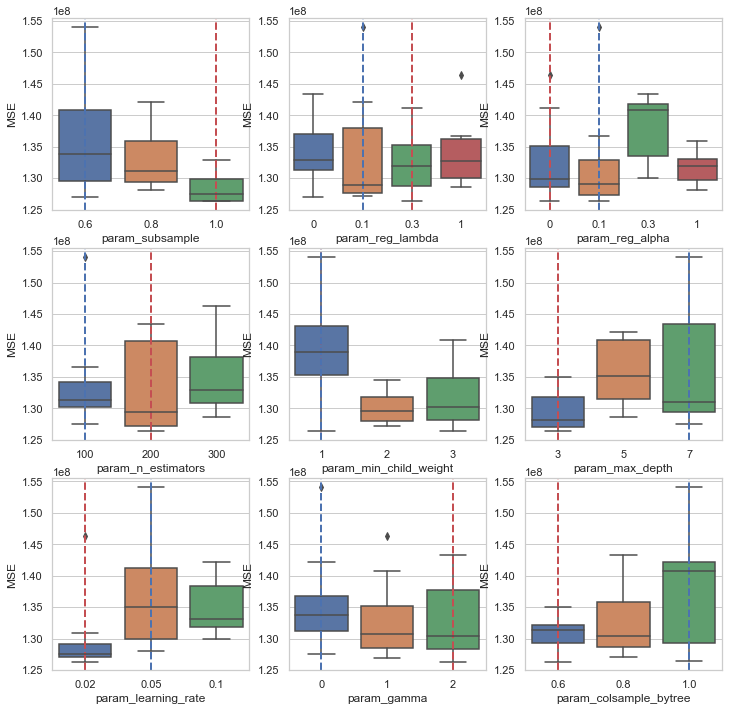

In [131]:
# get all parameter performance
random_search.cv_results_['mean_test_score']
random_search.cv_results_['params']

# transform to dataframe
df_results = pd.DataFrame(random_search.cv_results_)
# keep the columns starting with 'param_' or mean_test_score
df_results = df_results[df_results.columns[df_results.columns.str.startswith('param_') | df_results.columns.str.startswith('mean_test_score')]]
df_results['mean_test_score'] = -df_results['mean_test_score']
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
# one plot for each parameter
for i, param in enumerate(df_results.columns):
    if param == 'mean_test_score':
        continue
    # sort the parameter values
    df_results.sort_values('mean_test_score', inplace=True)
    # get the values for the best and worst models
    ## all levels of the parameter
    param_levels = df_results[param].unique()
    # sort the levels
    param_levels.sort()
    best_value = df_results.iloc[0][param]
    best_value_rank = param_levels.tolist().index(best_value)
    worst_value = df_results.iloc[-1][param]
    worst_value_rank = param_levels.tolist().index(worst_value)
    # plot the results
    ## debug
    print(param_levels, best_value, worst_value, best_value_rank, worst_value_rank)
    # plot the results
    sns.boxplot(x=param, y='mean_test_score', data=df_results, ax=ax[i // 3, i % 3])
    ax[i // 3, i % 3].set_ylabel('MSE')
    ax[i // 3, i % 3].set_xlabel(param)

    ax[i // 3, i % 3].axvline(best_value_rank, color='r', linestyle='--', linewidth=2)
    ax[i // 3, i % 3].axvline(worst_value_rank, color='b', linestyle='--', linewidth=2)
    #ax[i // 3, i % 3].set_title(param)
plt.show()


In [42]:
# compare two optimal models
import best_param

opt_param_1 = best_param.xg_boost_param
opt_param_2 = best_param.xg_boost_param_2
opt_param_3 = {'alpha': 0.012340293043913065,
 'colsample_bytree': 0.2014784460122454,
 'gamma': 0.0014879091585161574,
 'lambda': 0.0002453710647169391,
 'learning_rate': 0.0054201804563815585,
 'max_depth': 10,
 'min_child_weight': 10,
 'n_estimators': 596,
 'subsample': 0.5287916198749903}
opt_param_4 = {'alpha': 0.5307050920885151,
 'colsample_bytree': 0.22007563922753576,
 'gamma': 1.126766211492398,
 'lambda': 2.0157546919415476e-07,
 'learning_rate': 0.0034252845536845086,
 'max_depth': 9,
 'min_child_weight': 9,
 'n_estimators': 762,
 'subsample': 0.4950955449983505}
opt_param_5 = {'alpha': 0.00728968873689524,
'lambda': 0.0017409115083471692,
'colsample_bytree': 0.6060383526348607,
'subsample': 0.8433436318660781,
'min_child_weight': 69,
'gamma': 5.261041401203784,
'learning_rate': 0.9721444890817295,
'max_depth': 30,
'n_estimators': 351
 }
import xgboost as xgb
boost_reg_1 = xgb.XGBRegressor(random_state=77, n_jobs=-1, objective='reg:squarederror', **opt_param_1)
boost_reg_2 = xgb.XGBRegressor(random_state=77, n_jobs=-1, objective='reg:squarederror', **opt_param_2)
boost_reg_3 = xgb.XGBRegressor(random_state=77, n_jobs=-1, objective='reg:squarederror', **opt_param_3)
boost_reg_4 = xgb.XGBRegressor(random_state=77, n_jobs=-1, objective='reg:squarederror', **opt_param_4)
boost_reg_1.fit(x_train, y_train)
boost_reg_2.fit(x_train, y_train)
boost_reg_3.fit(x_train, y_train)
boost_reg_4.fit(x_train, y_train)

# compare the two models
print("XGBoost RMSE 1:", np.sqrt(get_MSE(y_test, boost_reg_1.predict(x_test))))
print("XGBoost RMSE 2:", np.sqrt(get_MSE(y_test, boost_reg_2.predict(x_test))))
print("XGBoost RMSE 3:", np.sqrt(get_MSE(y_test, boost_reg_3.predict(x_test))))
print("XGBoost RMSE 4:", np.sqrt(get_MSE(y_test, boost_reg_4.predict(x_test))))

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBoost RMSE 1: 12348.615945869773
XGBoost RMSE 2: 12306.128762426932
XGBoost RMSE 3: 12268.372050358628
XGBoost RMSE 4: 12263.350027875324


In [9]:
# compare two optimal models
import best_param

opt_param_1 = best_param.xg_boost_param
opt_param_2 = best_param.xg_boost_param_2
opt_param_3 = {'alpha': 0.012340293043913065,
 'colsample_bytree': 0.2014784460122454,
 'gamma': 0.0014879091585161574,
 'lambda': 0.0002453710647169391,
 'learning_rate': 0.0054201804563815585,
 'max_depth': 10,
 'min_child_weight': 10,
 'n_estimators': 596,
 'subsample': 0.5287916198749903}
opt_param_4 = {'alpha': 0.5307050920885151,
 'colsample_bytree': 0.22007563922753576,
 'gamma': 1.126766211492398,
 'lambda': 2.0157546919415476e-07,
 'learning_rate': 0.0034252845536845086,
 'max_depth': 9,
 'min_child_weight': 9,
 'n_estimators': 762,
 'subsample': 0.4950955449983505}
opt_param_5 = {'alpha': 0.00728968873689524,
'lambda': 0.0017409115083471692,
'colsample_bytree': 0.6060383526348607,
'subsample': 0.8433436318660781,
'min_child_weight': 69,
'gamma': 5.261041401203784,
'learning_rate': 0.9721444890817295,
'max_depth': 30,
'n_estimators': 351
 }
import xgboost as xgb
boost_reg_1 = xgb.XGBRegressor(random_state=77, n_jobs=-1, objective='reg:squarederror', **opt_param_5)
boost_reg_1.fit(x_train, np.log(y_train))

# compare the two models
print("XGBoost RMSE 1:", np.sqrt(get_MSE(y_test, boost_reg_1.predict(x_test))))

XGBoost RMSE 1: 12837.575060707448


In [10]:
print("XGBoost RMSE 1:", np.sqrt(get_MSE(y_test, np.exp(boost_reg_1.predict(x_test)))))

XGBoost RMSE 1: 12557.788655345936


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Test Optuna

In [16]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score

def objective(trial):
    
    param = {
        'random_state': 77,
        'objective': 'reg:squarederror',
        'tree_method': 'hist',
        #'gpu_id': 0,
        'n_jobs': -1,
        #### tune ####
        'n_estimators': trial.suggest_int("n_estimators", 40, 640),
        'max_depth': trial.suggest_int("max_depth", 2, 10, step=2),
        'learning_rate': trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        'gamma': trial.suggest_float("gamma", 1e-8, 1.0, log=True), #min split loss, larger -> more conserva.
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1.0),
        'lambda': trial.suggest_float("lambda", 1e-8, 1.0, log=True), # L1 Reg
        'alpha': trial.suggest_float("alpha", 1e-8, 1.0, log=True)
    }

    xgbr = xgb.XGBRegressor(**param)
    scores = cross_val_score(estimator=xgbr, X=x_train, y=y_train,
                    cv=5, verbose=10, n_jobs=-1, scoring='neg_mean_squared_error')
    return scores.mean()


loaded_study = optuna.load_study(storage="sqlite:///xgboost.db", study_name="xgboost")
loaded_study.optimize(objective, n_trials=10, n_jobs=10)

    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.

[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version.

[CV] END ....................... score: (test=-191989005.393) total time= 2.3min
[CV] START .....................................................................


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END ........................ score: (test=-59457215.887) total time= 2.3min
[CV] START .....................................................................
[CV] END ....................... score: (test=-152650033.700) total time= 2.3min
[CV] START .....................................................................
[CV] END ........................ score: (test=-79968869.053) total time= 2.3min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.4min
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.3min remaining:  1.5min
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical L

[CV] END ....................... score: (test=-192138120.655) total time= 2.3min
[CV] END ....................... score: (test=-141062976.510) total time= 2.3min
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ....................... score: (test=-152618201.004) total time= 2.3min
[CV] END ........................ score: (test=-59440944.364) total time= 2.3min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.3min remaining:  1.5min
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical L

[CV] END ........................ score: (test=-79990688.553) total time= 2.3min
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ....................... score: (test=-140930145.385) total time= 2.3min
[CV] START .....................................................................
[CV] END ....................... score: (test=-191928848.673) total time= 2.2min
[CV] START .....................................................................
[CV] END ....................... score: (test=-152769093.043) total time= 2.2min
[CV] END ........................ score: (test=-59621392.024) total time= 2.2min
[CV] END ........................ score: (test=-79928799.547) total time= 2.2min
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .................

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.5min remaining:  6.7min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  4.5min remaining:  3.0min
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical L

[CV] END ....................... score: (test=-141356100.816) total time= 2.2min
[CV] START .....................................................................
[CV] END ....................... score: (test=-191978811.048) total time= 2.2min
[CV] START .....................................................................


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END ....................... score: (test=-152704814.405) total time= 2.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.5min remaining:  6.8min
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END ........................ score: (test=-59477460.349) total time= 2.2min
[CV] START .....................................................................
[CV] END ........................ score: (test=-79951477.012) total time= 2.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  4.5min remaining:  3.0min
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.5min finished
/Users/fanjiaxz/Libra

[CV] END ....................... score: (test=-141120862.334) total time= 2.3min
[CV] START .....................................................................
[CV] END ....................... score: (test=-192010624.446) total time= 2.2min
[CV] START .....................................................................


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END ....................... score: (test=-192004824.285) total time= 2.2min
[CV] END ........................ score: (test=-79958345.933) total time= 2.2min
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ....................... score: (test=-152783082.787) total time= 2.2min
[CV] END ........................ score: (test=-59584798.839) total time= 2.2min


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.7min remaining: 10.1min
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  6.7min remaining:  4.5min
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical L

[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ....................... score: (test=-141305204.084) total time= 2.2min
[CV] START .....................................................................
[CV] END ....................... score: (test=-152603435.840) total time= 2.2min
[CV] START .....................................................................
[CV] END ........................ score: (test=-79977704.573) total time= 2.2min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  6.7min remaining:  4.5min
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END ....................... score: (test=-141042830.523) total time= 2.2min
[CV] START .....................................................................


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.7min finished
[I 2022-02-23 07:56:39,903] Trial 254 finished with value: -125016409.04167065 and parameters: {'n_estimators': 622, 'max_depth': 10, 'learning_rate': 0.003771696563709144, 'gamma': 0.3804170416073818, 'min_child_weight': 10, 'subsample': 0.47258227099055333, 'colsample_bytree': 0.21641329688334224, 'lambda': 3.231364420458905e-07, 'alpha': 0.030013373336642706}. Best is trial 191 with value: -124985393.25542025.


[CV] END ........................ score: (test=-59447449.827) total time= 2.2min
[CV] START .....................................................................


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END ....................... score: (test=-191959140.076) total time= 2.3min
[CV] START .....................................................................


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END ........................ score: (test=-80018068.985) total time= 2.3min
[CV] END ....................... score: (test=-152627740.339) total time= 2.3min
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ........................ score: (test=-59409940.383) total time= 2.3min
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  9.0min remaining: 13.5min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  9.0min remaining:  6.0min
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical L

[CV] END ....................... score: (test=-191940467.839) total time= 2.3min
[CV] END ....................... score: (test=-152650811.373) total time= 2.3min
[CV] END ....................... score: (test=-140977311.540) total time= 2.3min
[CV] END ........................ score: (test=-79992109.054) total time= 2.3min
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ....................... score: (test=-140925298.860) total time= 2.3min
[CV] START .....................................................................


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.1min finished
[I 2022-02-23 07:58:58,314] Trial 245 finished with value: -124990022.21070786 and parameters: {'n_estimators': 622, 'max_depth': 10, 'learning_rate': 0.0037650954765535718, 'gamma': 0.3984366242257507, 'min_child_weight': 10, 'subsample': 0.47640549594143533, 'colsample_bytree': 0.21685926088416202, 'lambda': 3.4809904190677065e-07, 'alpha': 0.028892430061918748}. Best is trial 191 with value: -124985393.25542025.


[CV] END ........................ score: (test=-59441423.927) total time= 2.3min
[CV] START .....................................................................


/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV] END ....................... score: (test=-191891126.073) total time= 2.7min
[CV] END ........................ score: (test=-79983948.602) total time= 2.7min


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 11.7min remaining: 17.6min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 11.8min remaining:  7.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.8min finished
[I 2022-02-23 08:01:40,637] Trial 253 finished with value: -125057286.6189771 and parameters: {'n_estimators': 621, 'max_depth': 10, 'learning_rate': 0.003620749531744828, 'gamma': 0.012679105322697911, 'min_child_weight': 10, 'subsample': 0.4535054062371505, 'colsample_bytree': 0.2190669683033588, 'lambda': 1.8547817204859367e-07, 'alpha': 0.03336769772891456}. Best is trial 191 with value: -124985393.25542025.


[CV] END ....................... score: (test=-152867324.521) total time= 2.7min
[CV] END ....................... score: (test=-141147463.809) total time= 2.7min
[CV] END ........................ score: (test=-59396570.090) total time= 2.7min
[CV] END ....................... score: (test=-192342975.625) total time= 2.7min
[CV] END ....................... score: (test=-153534676.182) total time= 2.7min
[CV] END ........................ score: (test=-80330414.693) total time= 2.7min


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 11.8min remaining: 17.6min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 11.8min remaining:  7.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.8min finished
[I 2022-02-23 08:01:41,250] Trial 249 finished with value: -125287943.07026 and parameters: {'n_estimators': 621, 'max_depth': 10, 'learning_rate': 0.0037602104354278725, 'gamma': 0.011002992425775841, 'min_child_weight': 4, 'subsample': 0.4760555375038111, 'colsample_bytree': 0.21523602310841825, 'lambda': 3.006916293176764e-07, 'alpha': 0.03198712257341104}. Best is trial 191 with value: -124985393.25542025.


[CV] END ........................ score: (test=-59983034.434) total time= 2.7min
[CV] END ....................... score: (test=-140248614.417) total time= 2.7min


In [ ]:
loa

/var/folders/vw/fhlnd7k958g99z5bj0yg57vh0000gn/T/ipykernel_56074/2787305596.py:11: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df_params = df_params[df_params.columns[df_params.columns.str.startswith('params_')] | df_params.columns[df_params.columns.str.startswith('value')]]


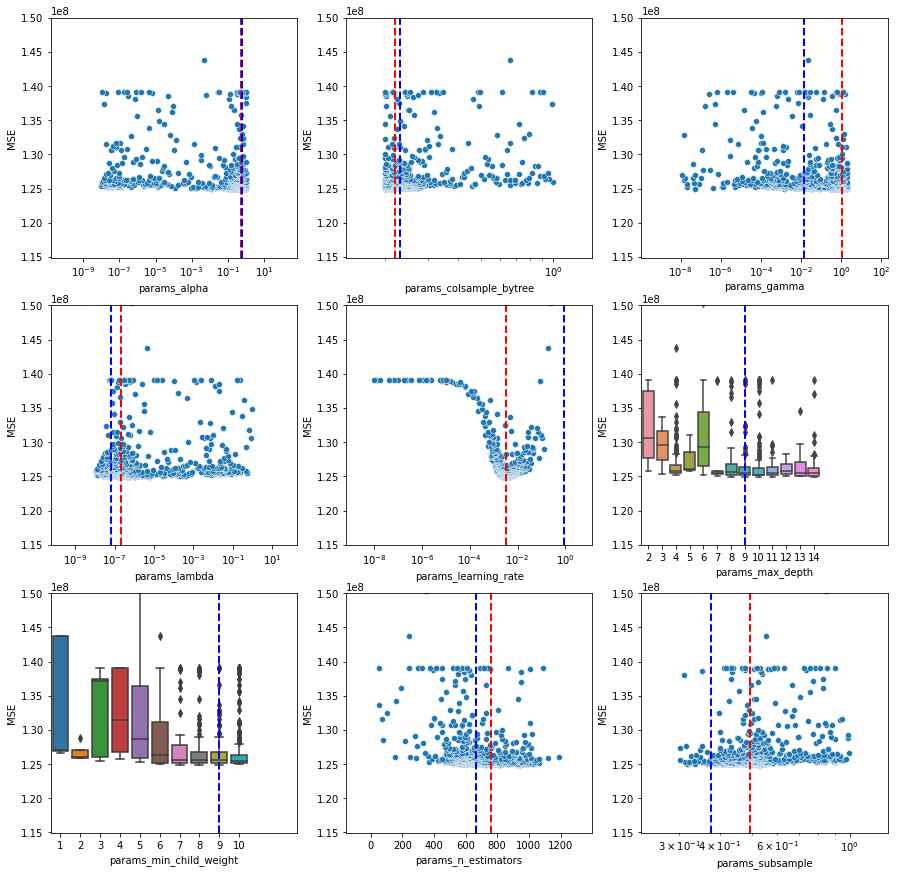

In [48]:
from matplotlib import ticker as mticker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import optuna
loaded_study = optuna.load_study(storage="sqlite:///xgboost(2).db", study_name="xgboost_cont")
df_params = loaded_study.trials_dataframe()
df_params = df_params.query('state == "COMPLETE"')
# subset params_* and value_* columns
df_params = df_params[df_params.columns[df_params.columns.str.startswith('params_')] | df_params.columns[df_params.columns.str.startswith('value')]]
df_params['mean_test_score'] = -1 * df_params['value']
df_params.drop(['value'], axis=1, inplace=True)

# 3*3 grid plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, param in enumerate(df_params.columns):
    if param == 'mean_test_score':
        continue
    # best value
    # sort df
    df_params.sort_values(by='mean_test_score', inplace=True)
    best_value = df_params.iloc[0][param]
    worst_value = df_params.iloc[-1][param]
    # check if the param's levels are categorical or continuous
    if param in ['params_max_depth', 'params_min_child_weight']:
        param_levels = df_params[param].unique()
        param_levels.sort()
        best_value_rank = param_levels.tolist().index(best_value)
        worst_value_rank = param_levels.tolist().index(worst_value)
        sns.boxplot(x=param, y='mean_test_score', data=df_params, ax=ax[i // 3, i % 3])
        ax[i // 3, i % 3].axvline(best_value_rank, color='r', linestyle='--', linewidth=2)
        ax[i // 3, i % 3].axvline(worst_value_rank, color='b', linestyle='--', linewidth=2)
    else:
        # scatter with x-axis log scale
        sns.scatterplot(x=param, y='mean_test_score', data=df_params, ax=ax[i // 3, i % 3])
        ax[i // 3, i % 3].axvline(best_value, color='r', linestyle='--', linewidth=2)
        ax[i // 3, i % 3].axvline(worst_value, color='b', linestyle='--', linewidth=2)
        if param != 'params_n_estimators':
            ax[i // 3, i % 3].set_xscale('log')

    #ax[i // 3, i % 3].set_yscale('log')

    
    ax[i // 3, i % 3].set_xlabel(param)
    ax[i // 3, i % 3].set_ylim(np.min(df_params['mean_test_score']) - 1e7, 1.5e8)
    ax[i // 3, i % 3].set_ylabel('MSE')

    # layer density plot
    #sns.kdeplot(x=df_params[param], ax=ax[i // 3, i % 3])
plt.show()
       # ax[i // 3, i % 3].scatter(df_params[param], df_params['mean_test_score'])
       # ax[i // 3, i % 3].axvline(best_value, color='r', linestyle='--', linewidth=2)
       # ax[i // 3, i % 3].axvline(worst_value, color='b', linestyle='--', linewidth=2)
    #ax[i // 3, i % 3].set_xlabel(param)
    #ax[i // 3, i % 3].set_ylabel('MSE')

In [49]:
rf_study = optuna.load_study(storage="sqlite:///xgboost.db", study_name="rf")
df_params = rf_study.trials_dataframe()
df_params = df_params.query('state == "COMPLETE"')
# subset params_* and value_* columns
df_params = df_params[df_params.columns[df_params.columns.str.startswith('params_')] | df_params.columns[df_params.columns.str.startswith('value')]]
df_params['mean_test_score'] = -1 * df_params['value']
df_params.drop(['value'], axis=1, inplace=True)

df_params

/var/folders/vw/fhlnd7k958g99z5bj0yg57vh0000gn/T/ipykernel_56074/2399439667.py:5: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df_params = df_params[df_params.columns[df_params.columns.str.startswith('params_')] | df_params.columns[df_params.columns.str.startswith('value')]]


,params_max_depth,params_max_features,params_min_samples_leaf,params_min_samples_split,params_n_estimators,mean_test_score
0,4,0.699547,37,86,272,-0.019024
1,17,0.722989,6,46,263,-0.014204
2,17,0.530088,12,74,972,-0.019413
3,2,0.158607,47,95,642,-0.015266
4,24,0.595229,12,40,521,-0.017554
...,...,...,...,...,...,...
495,186,0.138437,25,16,806,-0.025370
496,177,0.170264,22,34,857,-0.024864
497,150,0.758867,26,59,960,-0.021874
498,182,0.121784,23,29,890,-0.025143


/var/folders/vw/fhlnd7k958g99z5bj0yg57vh0000gn/T/ipykernel_56074/2552131073.py:11: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df_params = df_params[df_params.columns[df_params.columns.str.startswith('params_')] | df_params.columns[df_params.columns.str.startswith('value')]]


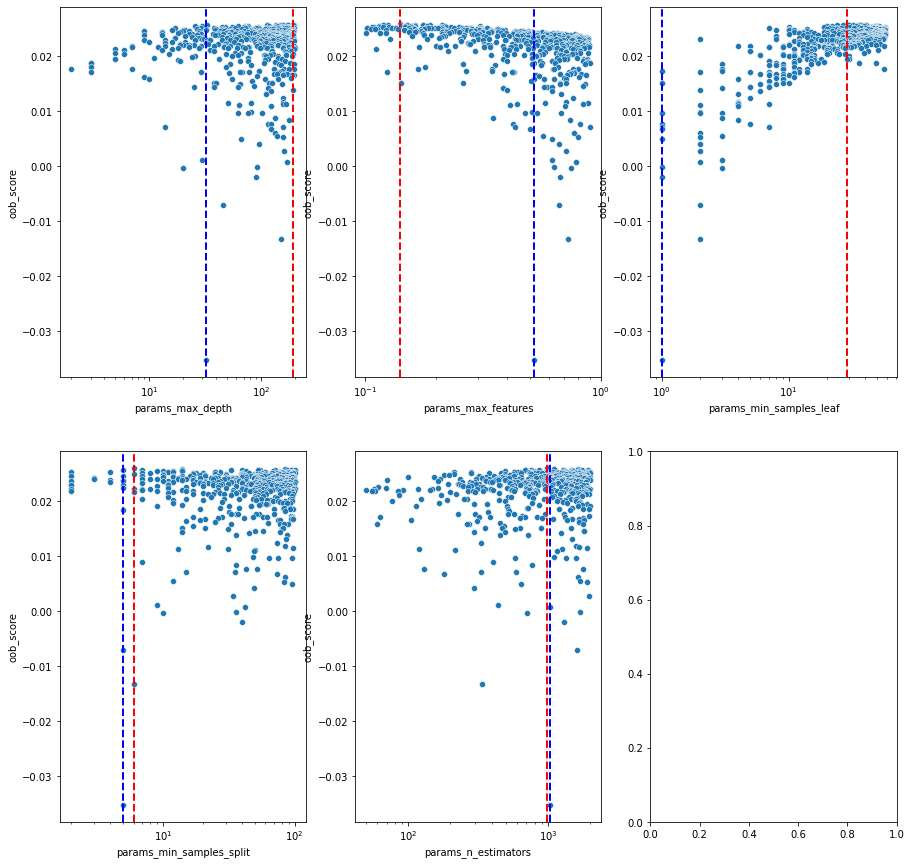

In [83]:
from matplotlib import ticker as mticker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import optuna
rf_study = optuna.load_study(storage="sqlite:///xgboost(1).db", study_name="rf_random")
df_params = rf_study.trials_dataframe()
df_params = df_params.query('state == "COMPLETE"')
# subset params_* and value_* columns
df_params = df_params[df_params.columns[df_params.columns.str.startswith('params_')] | df_params.columns[df_params.columns.str.startswith('value')]]
df_params['oob_score'] = df_params['value']
df_params.drop(['value'], axis=1, inplace=True)

# 2*3 grid plot
fig, ax = plt.subplots(2, 3, figsize=(15, 15))
for i, param in enumerate(df_params.columns):
    if param == 'oob_score':
        continue
    # best value
    # sort df
    df_params.sort_values(by='oob_score', inplace=True, ascending=False)
    best_value = df_params.iloc[0][param]
    worst_value = df_params.iloc[-1][param]

    # scatter with x-axis log scale
    sns.scatterplot(x=param, y='oob_score', data=df_params, ax=ax[i // 3, i % 3])
    ax[i // 3, i % 3].axvline(best_value, color='r', linestyle='--', linewidth=2)
    ax[i // 3, i % 3].axvline(worst_value, color='b', linestyle='--', linewidth=2)
    #if param != 'params_n_estimators':
    ax[i // 3, i % 3].set_xscale('log')

    #ax[i // 3, i % 3].set_yscale('log')

    
    ax[i // 3, i % 3].set_xlabel(param)
    #ax[i // 3, i % 3].set_ylim(np.min(df_params['mean_test_score']) - 1e7, 1.5e8)
    ax[i // 3, i % 3].set_ylabel('oob_score')

    # layer density plot
    #sns.kdeplot(x=df_params[param], ax=ax[i // 3, i % 3])
plt.show()
       # ax[i // 3, i % 3].scatter(df_params[param], df_params['mean_test_score'])
       # ax[i // 3, i % 3].axvline(best_value, color='r', linestyle='--', linewidth=2)
       # ax[i // 3, i % 3].axvline(worst_value, color='b', linestyle='--', linewidth=2)
    #ax[i // 3, i % 3].set_xlabel(param)
    #ax[i // 3, i % 3].set_ylabel('MSE')

/var/folders/vw/fhlnd7k958g99z5bj0yg57vh0000gn/T/ipykernel_56074/4270086212.py:16: UserWarning: No contour levels were found within the data range.
  ax[i // 2, i % 2].contour(xi, yi, zi, levels=np.linspace(np.min(df_params['mean_test_score']), np.max(df_params['mean_test_score']), 10))


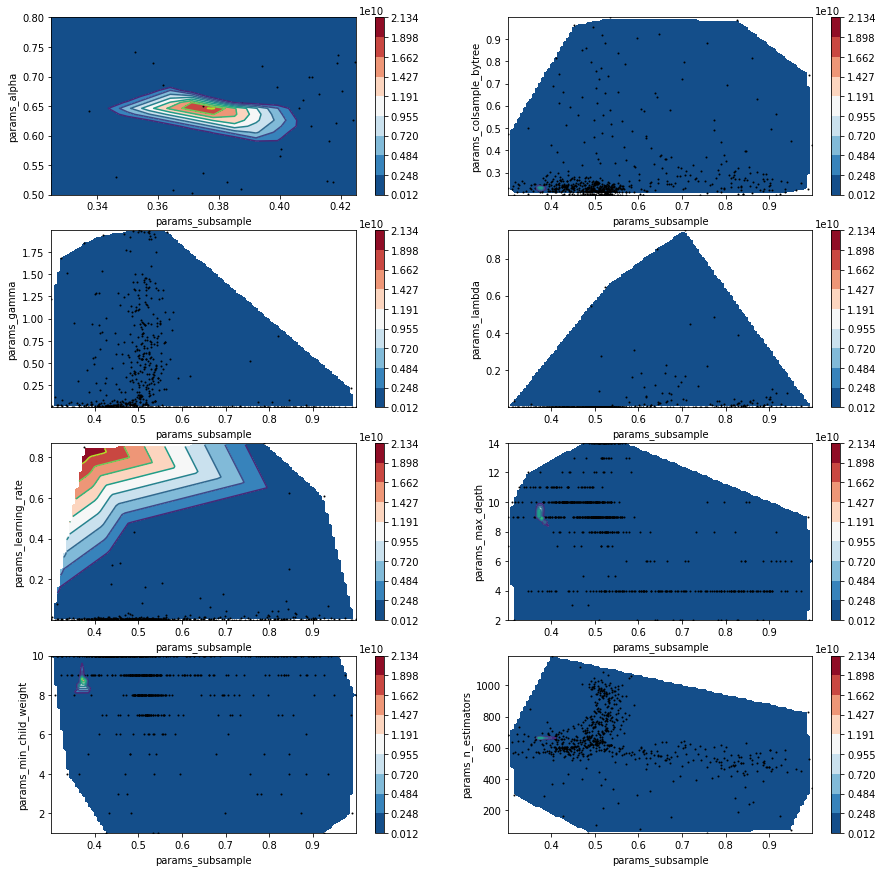

In [2]:
# Contour with params_subsample and the rest of the params
from scipy.interpolate import griddata
# from scipy.interpolate import griddata
# zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')
figure, ax = plt.subplots(4, 2, figsize=(15, 15))
for i, param in enumerate(df_params.columns):
    if param == 'mean_test_score' or param == 'params_subsample':
        continue
    # define grid
    xi = np.linspace(df_params['params_subsample'].min(), df_params['params_subsample'].max(), 100)
    yi = np.linspace(df_params[param].min(), df_params[param].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    # interpolate
    zi = griddata((df_params['params_subsample'], df_params[param]), df_params['mean_test_score'], (xi, yi), method='linear')
    # plot
    ax[i // 2, i % 2].contour(xi, yi, zi, levels=np.linspace(np.min(df_params['mean_test_score']), np.max(df_params['mean_test_score']), 10))
    contour_i = ax[i // 2, i % 2].contourf(xi, yi, zi, levels=np.linspace(np.min(df_params['mean_test_score']), np.max(df_params['mean_test_score']), 10), cmap='RdBu_r')
    figure.colorbar(contour_i, ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].scatter(df_params['params_subsample'], df_params[param], c='k', s=1)
    ax[i // 2, i % 2].set_xlabel('params_subsample')
    ax[i // 2, i % 2].set_ylabel(param)
    # define limit
    if param == 'params_alpha':
        ax[i // 2, i % 2].set_xlim(0.325, 0.425)
        ax[i // 2, i % 2].set_ylim(0.5, 0.8)


In [59]:
df_params.columns

Index(['params_max_depth', 'params_max_features', 'params_min_samples_leaf',
       'params_min_samples_split', 'params_n_estimators', 'oob_score'],
      dtype='object')

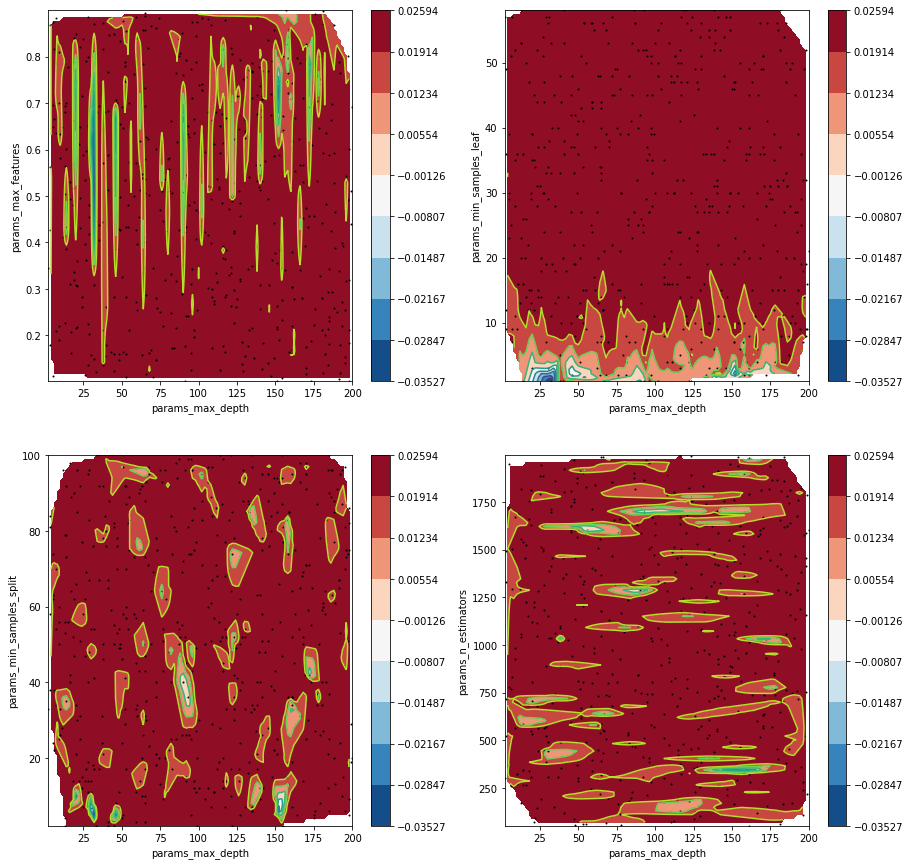

In [78]:
# Contour with params_max_depth and the rest of the params
from scipy.interpolate import griddata
# from scipy.interpolate import griddata
# zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
# reorder columns make oob_score and params_max_depth last
df_params = df_params[['params_max_features', 'params_min_samples_leaf', 'params_min_samples_split', 'params_n_estimators', 'oob_score', 'params_max_depth']]
for i, param in enumerate(df_params.columns):
    if param == 'oob_score' or param == 'params_max_depth':
        continue
    # define grid
    xi = np.linspace(df_params['params_max_depth'].min(), df_params['params_max_depth'].max(), 100)
    yi = np.linspace(df_params[param].min(), df_params[param].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    # interpolate
    zi = griddata((df_params['params_max_depth'], df_params[param]), df_params['oob_score'], (xi, yi), method='linear')
    # plot
    axs[i // 2, i % 2].contour(xi, yi, zi, levels=np.linspace(np.min(df_params['oob_score']), np.max(df_params['oob_score']), 10))
    contour_i = axs[i // 2, i % 2].contourf(xi, yi, zi, levels=np.linspace(np.min(df_params['oob_score']), np.max(df_params['oob_score']), 10), cmap='RdBu_r')
    fig.colorbar(contour_i, ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].scatter(df_params['params_max_depth'], df_params[param], c='k', s=1)
    axs[i // 2, i % 2].set_xlabel('params_max_depth')
    axs[i // 2, i % 2].set_ylabel(param)
    # define limit

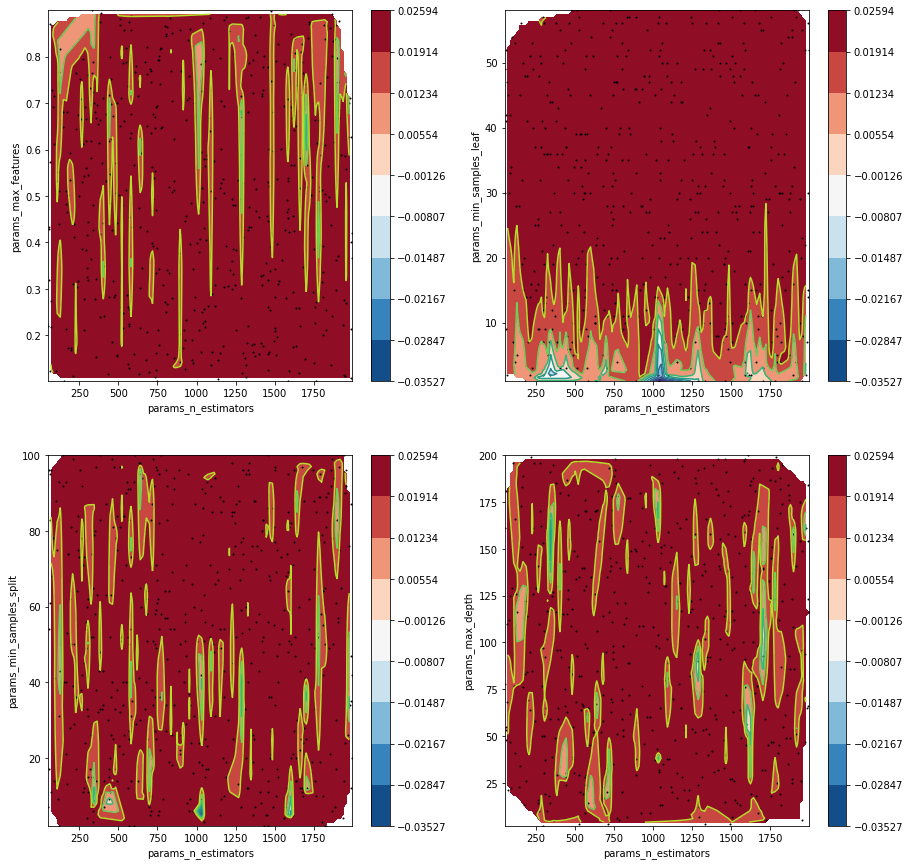

In [84]:
# Contour with params_n_estimators and the rest of the params
from scipy.interpolate import griddata
# from scipy.interpolate import griddata
# zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
# reorder columns make oob_score and params_max_depth last
df_params = df_params[['params_max_features', 'params_min_samples_leaf', 'params_min_samples_split', 'params_max_depth', 'oob_score', 'params_n_estimators']]
for i, param in enumerate(df_params.columns):
    if param == 'oob_score' or param == 'params_n_estimators':
        continue
    # define grid
    xi = np.linspace(df_params['params_n_estimators'].min(), df_params['params_n_estimators'].max(), 100)
    yi = np.linspace(df_params[param].min(), df_params[param].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    # interpolate
    zi = griddata((df_params['params_n_estimators'], df_params[param]), df_params['oob_score'], (xi, yi), method='linear')
    # plot
    axs[i // 2, i % 2].contour(xi, yi, zi, levels=np.linspace(np.min(df_params['oob_score']), np.max(df_params['oob_score']), 10))
    contour_i = axs[i // 2, i % 2].contourf(xi, yi, zi, levels=np.linspace(np.min(df_params['oob_score']), np.max(df_params['oob_score']), 10), cmap='RdBu_r')
    fig.colorbar(contour_i, ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].scatter(df_params['params_n_estimators'], df_params[param], c='k', s=1)
    axs[i // 2, i % 2].set_xlabel('params_n_estimators')
    axs[i // 2, i % 2].set_ylabel(param)

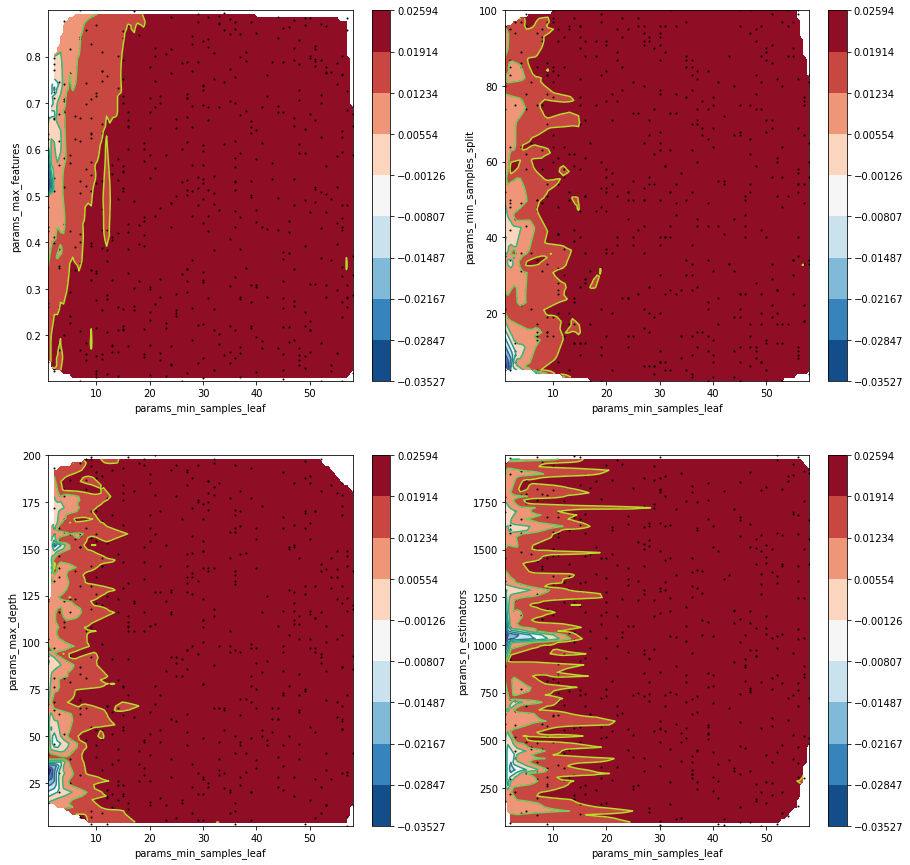

In [85]:
# Contour with params_min_samples_leaf and the rest of the params
from scipy.interpolate import griddata
# from scipy.interpolate import griddata
# zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
# reorder columns make oob_score and params_max_depth last
df_params = df_params[['params_max_features', 'params_min_samples_split', 'params_max_depth', 'params_n_estimators', 'oob_score', 'params_min_samples_leaf']]
for i, param in enumerate(df_params.columns):
    if param == 'oob_score' or param == 'params_min_samples_leaf':
        continue
    # define grid
    xi = np.linspace(df_params['params_min_samples_leaf'].min(), df_params['params_min_samples_leaf'].max(), 100)
    yi = np.linspace(df_params[param].min(), df_params[param].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    # interpolate
    zi = griddata((df_params['params_min_samples_leaf'], df_params[param]), df_params['oob_score'], (xi, yi), method='linear')
    # plot
    axs[i // 2, i % 2].contour(xi, yi, zi, levels=np.linspace(np.min(df_params['oob_score']), np.max(df_params['oob_score']), 10))
    contour_i = axs[i // 2, i % 2].contourf(xi, yi, zi, levels=np.linspace(np.min(df_params['oob_score']), np.max(df_params['oob_score']), 10), cmap='RdBu_r')
    fig.colorbar(contour_i, ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].scatter(df_params['params_min_samples_leaf'], df_params[param], c='k', s=1)
    axs[i // 2, i % 2].set_xlabel('params_min_samples_leaf')
    axs[i // 2, i % 2].set_ylabel(param)
    

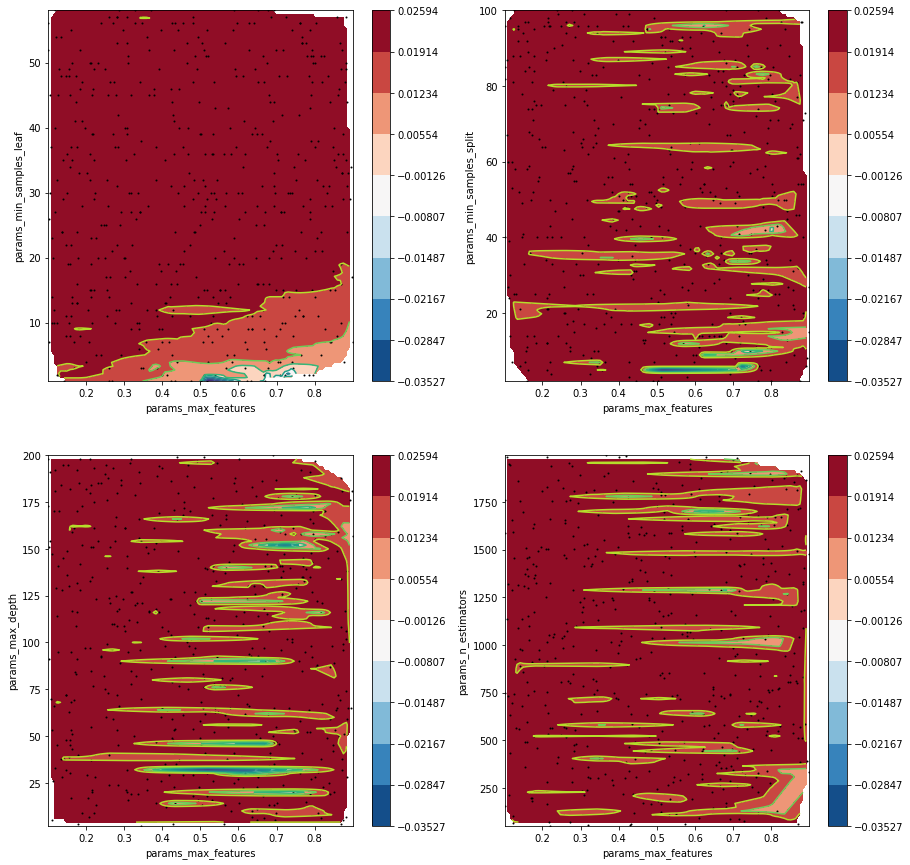

In [86]:
# Contour with params_max_features and the rest of the params
from scipy.interpolate import griddata
# from scipy.interpolate import griddata
# zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
# reorder columns make oob_score and params_max_depth last
df_params = df_params[['params_min_samples_leaf', 'params_min_samples_split', 'params_max_depth', 'params_n_estimators', 'oob_score', 'params_max_features']]
for i, param in enumerate(df_params.columns):
    if param == 'oob_score' or param == 'params_max_features':
        continue
    # define grid
    xi = np.linspace(df_params['params_max_features'].min(), df_params['params_max_features'].max(), 100)
    yi = np.linspace(df_params[param].min(), df_params[param].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    # interpolate
    zi = griddata((df_params['params_max_features'], df_params[param]), df_params['oob_score'], (xi, yi), method='linear')
    # plot
    axs[i // 2, i % 2].contour(xi, yi, zi, levels=np.linspace(np.min(df_params['oob_score']), np.max(df_params['oob_score']), 10))
    contour_i = axs[i // 2, i % 2].contourf(xi, yi, zi, levels=np.linspace(np.min(df_params['oob_score']), np.max(df_params['oob_score']), 10), cmap='RdBu_r')
    fig.colorbar(contour_i, ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].scatter(df_params['params_max_features'], df_params[param], c='k', s=1)
    axs[i // 2, i % 2].set_xlabel('params_max_features')
    axs[i // 2, i % 2].set_ylabel(param)
    

## Second Try: Random Forest

In [37]:
x_train.shape

(28000, 58)

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#
# rf_reg = RandomForestRegressor(n_estimators=500, random_state=77, oob_score=True, n_jobs=8, verbose=1)
#rf_reg.fit(x_train, y_train)
#rf_reg

def rf_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 32),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1,58),
        'min_samples_split': trial.suggest_int('min_samples_split', 1, 100),
        'max_features': trial.suggest_uniform('max_features', 0.1, 0.9),
        # non-tunable params
        'oob_score': True,
        'n_jobs': 8,
        'verbose': 1,
    }
    rf_reg = RandomForestRegressor(**params)
    rf_reg.fit(x_train, y_train)

    return rf_reg.oob_score_

rf_study = optuna.load_study(storage="sqlite:///rf.db", study_name="rf")
rf_study.optimize(rf_objective, n_trials=10, show_progress_bar=True)

        

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()
  0%|          | 0/10 [00:00<?, ?it/s][Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 341 out of 341 | elapsed:    4.3s finished
 10%|█         | 1/10 [00:04<00:44,  4.95s/it][Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[I 2022-02-24 16:46:46,280] Trial 1 finished with value: 0.022713427907823935 and parameters: {'n_estimators': 341, 'max_depth': 31, 'min_samples_leaf': 11, 'min_samples_split': 73, 'max_features': 0.1881551573163221}. Best is trial 1 with value: 0.022713427907823935.


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done  56 out of  56 | elapsed:    1.0s finished
 20%|██        | 2/10 [00:06<00:21,  2.71s/it][Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[I 2022-02-24 16:46:47,426] Trial 2 finished with value: 0.014664101051909406 and parameters: {'n_estimators': 56, 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 68, 'max_features': 0.6326652530599653}. Best is trial 1 with value: 0.022713427907823935.


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 184 out of 184 | elapsed:    5.3s finished
 30%|███       | 3/10 [00:11<00:28,  4.02s/it][Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[I 2022-02-24 16:46:53,011] Trial 3 finished with value: 0.02008023096872824 and parameters: {'n_estimators': 184, 'max_depth': 7, 'min_samples_leaf': 41, 'min_samples_split': 93, 'max_features': 0.8811755821791095}. Best is trial 1 with value: 0.022713427907823935.


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    8.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   17.9s
[Parallel(n_jobs=8)]: Done 483 out of 483 | elapsed:   19.8s finished
 40%|████      | 4/10 [00:32<01:03, 10.60s/it][Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[I 2022-02-24 16:47:13,691] Trial 4 finished with value: 0.02343926959286957 and parameters: {'n_estimators': 483, 'max_depth': 22, 'min_samples_leaf': 50, 'min_samples_split': 66, 'max_features': 0.8215835033331608}. Best is trial 4 with value: 0.02343926959286957.


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    4.2s
[Parallel(n_jobs=8)]: Done 232 out of 232 | elapsed:    5.2s finished
 50%|█████     | 5/10 [00:37<00:43,  8.79s/it][Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[I 2022-02-24 16:47:19,260] Trial 5 finished with value: 0.022262481233278564 and parameters: {'n_estimators': 232, 'max_depth': 11, 'min_samples_leaf': 20, 'min_samples_split': 91, 'max_features': 0.45735802914013235}. Best is trial 4 with value: 0.02343926959286957.


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    5.6s
[Parallel(n_jobs=8)]: Done 852 out of 852 | elapsed:    6.1s finished
 60%|██████    | 6/10 [00:45<00:33,  8.45s/it][Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[I 2022-02-24 16:47:27,046] Trial 6 finished with value: 0.024650908623374268 and parameters: {'n_estimators': 852, 'max_depth': 25, 'min_samples_leaf': 9, 'min_samples_split': 33, 'max_features': 0.10467079602123741}. Best is trial 6 with value: 0.024650908623374268.


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    7.3s
[Parallel(n_jobs=8)]: Done 588 out of 588 | elapsed:    9.7s finished
 70%|███████   | 7/10 [00:56<00:27,  9.16s/it][Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[I 2022-02-24 16:47:37,674] Trial 7 finished with value: 0.015736754488613003 and parameters: {'n_estimators': 588, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 19, 'max_features': 0.3622183014277113}. Best is trial 6 with value: 0.024650908623374268.


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   12.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   29.4s
[Parallel(n_jobs=8)]: Done 631 out of 631 | elapsed:   42.4s finished
 80%|████████  | 8/10 [01:40<00:40, 20.17s/it][Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[I 2022-02-24 16:48:21,408] Trial 8 finished with value: 0.010327903360050295 and parameters: {'n_estimators': 631, 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 49, 'max_features': 0.8687079818843851}. Best is trial 6 with value: 0.024650908623374268.


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 751 out of 751 | elapsed:    4.9s finished
 90%|█████████ | 9/10 [01:46<00:15, 15.73s/it][Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[I 2022-02-24 16:48:27,387] Trial 9 finished with value: 0.02331399941291523 and parameters: {'n_estimators': 751, 'max_depth': 7, 'min_samples_leaf': 39, 'min_samples_split': 34, 'max_features': 0.19912741713357607}. Best is trial 6 with value: 0.024650908623374268.


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    6.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   13.9s
[Parallel(n_jobs=8)]: Done 711 out of 711 | elapsed:   22.3s finished
100%|██████████| 10/10 [02:09<00:00, 12.95s/it]

[I 2022-02-24 16:48:50,873] Trial 10 finished with value: 0.022311416103176884 and parameters: {'n_estimators': 711, 'max_depth': 12, 'min_samples_leaf': 32, 'min_samples_split': 49, 'max_features': 0.6582927650762644}. Best is trial 6 with value: 0.024650908623374268.


In [75]:
rf_study = optuna.load_study(storage="sqlite:///xgboost(1).db", study_name="rf")
reg_compare = RandomForestRegressor(n_jobs=8, verbose=1, oob_score=True, **rf_study.best_params)
reg_compare.fit(x_test, y_test)
# get MSE
mse_compare = get_MSE(y_test, reg_compare.predict(x_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 897 out of 897 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 897 out of 897 | elapsed:    0.1s finished


In [76]:
mse_compare ** 0.5

11706.283526923973

In [23]:
np.sqrt(get_MSE(rf_reg.predict(x_test), y_test))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 125 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 201 tasks      | elaps

12562.239194213835

In [33]:
rf_reg = RandomForestRegressor(n_estimators=500, random_state=77, oob_score=True, n_jobs=8, verbose=1)
rf_reg.fit(x_train, y_train)
rf_reg

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   20.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   48.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:   55.3s finished


RandomForestRegressor(n_estimators=500, n_jobs=8, oob_score=True,
                      random_state=77, verbose=1)

In [35]:
rf_reg.oob_score_

-0.07942912803459423

## Random Forest with Randomized Search

In [63]:
import optuna
optuna.create_study(direction='maximize', storage='sqlite:///rf.db', study_name='rf_random', sampler=optuna.samplers.RandomSampler())

[I 2022-02-25 14:28:23,448] A new study created in RDB with name: rf_random


In [65]:
def rf_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 2000),
        'max_depth': trial.suggest_int('max_depth', 2, 200),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1,58),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
        'max_features': trial.suggest_uniform('max_features', 0.1, 0.9),
        # non-tunable params, no seed provided b/c it controls bootstrapping sampling
        'oob_score': True,
        'n_jobs': -1,
        'verbose': 1,
    }
    rf_reg = RandomForestRegressor(**params)
    rf_reg.fit(x_train, y_train)

    return rf_reg.oob_score_

rf_random_study = optuna.load_study(storage="sqlite:///rf.db", study_name="rf_random")
rf_random_study.optimize(rf_objective, n_trials=500, show_progress_bar=True)

/Users/fanjiaxz/Library/Mobile Documents/com~apple~CloudDocs/Emory/Spring 2022/Statistical Learning/venv/lib/python3.10/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()
  0%|          | 0/500 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   26.2s finished
  0%|          | 1/500 [00:27<3:48:26, 27.47s/it][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.


[I 2022-02-25 16:00:50,345] Trial 8 finished with value: 0.023030999409781816 and parameters: {'n_estimators': 750, 'max_depth': 98, 'min_samples_leaf': 56, 'min_samples_split': 68, 'max_features': 0.779967458179776}. Best is trial 0 with value: 0.025262686101319987.


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:   11.3s finished
  0%|          | 2/500 [00:40<2:35:25, 18.73s/it]

[I 2022-02-25 16:01:02,951] Trial 9 finished with value: 0.024691963924116656 and parameters: {'n_estimators': 729, 'max_depth': 60, 'min_samples_leaf': 49, 'min_samples_split': 48, 'max_features': 0.3347735140680411}. Best is trial 0 with value: 0.025262686101319987.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 1636 out of 1636 | elapsed:  1.1min finished
  1%|          | 3/500 [01:48<5:42:08, 41.31s/it][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.


[I 2022-02-25 16:02:11,127] Trial 10 finished with value: 0.023400555027746628 and parameters: {'n_estimators': 1636, 'max_depth': 171, 'min_samples_leaf': 44, 'min_samples_split': 72, 'max_features': 0.857008701692524}. Best is trial 0 with value: 0.025262686101319987.


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    1.3s finished
  1%|          | 4/500 [01:49<3:32:15, 25.68s/it][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.


[I 2022-02-25 16:02:12,841] Trial 11 finished with value: 0.025546780790102752 and parameters: {'n_estimators': 202, 'max_depth': 13, 'min_samples_leaf': 35, 'min_samples_split': 2, 'max_features': 0.11214990617408034}. Best is trial 11 with value: 0.025546780790102752.


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    0.5s finished
  1%|          | 5/500 [01:50<2:17:27, 16.66s/it]

[I 2022-02-25 16:02:13,521] Trial 12 finished with value: 0.022588522986377035 and parameters: {'n_estimators': 68, 'max_depth': 11, 'min_samples_leaf': 34, 'min_samples_split': 3, 'max_features': 0.1412929250019848}. Best is trial 11 with value: 0.025546780790102752.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:    3.3s
  1%|          | 5/500 [01:54<3:09:15, 22.94s/it]


KeyboardInterrupt: 

In [67]:
rf_random_imported = optuna.load_study(storage="sqlite:///xgboost(1).db", study_name="rf_random")
df_params = rf_random_imported.trials_dataframe()

<AxesSubplot:xlabel='params_max_features', ylabel='Density'>

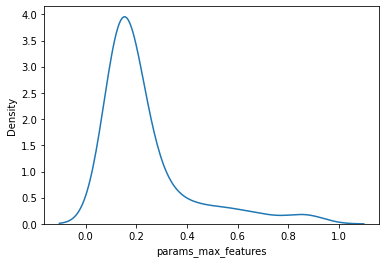

In [74]:
# kde plot
sns.kdeplot(df_params['params_max_features'])

In [8]:
import optuna
df_params_opt = optuna.load_study(storage="sqlite:///xgboost(1).db", study_name="rf").trials_dataframe()
df_params_opt = df_params_opt.query('state == "COMPLETE"')
# subset params_* and value_* columns
df_params_opt = df_params_opt[df_params_opt.columns[df_params_opt.columns.str.startswith('params_')] | df_params_opt.columns[df_params_opt.columns.str.startswith('value')]]
df_params_opt['oob_score'] = df_params_opt['value']
df_params_opt.drop(['value'], axis=1, inplace=True)
df_params_opt.sort_values(by='oob_score', ascending=False).head(50)#.describe() # top 50 trials, max_depth and max_features are in the range specified above


/var/folders/vw/fhlnd7k958g99z5bj0yg57vh0000gn/T/ipykernel_99968/3179344777.py:5: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df_params_opt = df_params_opt[df_params_opt.columns[df_params_opt.columns.str.startswith('params_')] | df_params_opt.columns[df_params_opt.columns.str.startswith('value')]]


,params_max_depth,params_max_features,params_min_samples_leaf,params_min_samples_split,params_n_estimators,oob_score
441,181,0.100746,19,45,897,0.026310
463,182,0.112871,24,56,884,0.026124
488,178,0.166391,23,35,894,0.026099
187,178,0.100221,30,48,791,0.026026
262,116,0.130596,32,59,921,0.026020
412,193,0.137203,18,54,863,0.026020
17,32,0.117337,24,3,855,0.026017
372,33,0.189245,40,55,863,0.026010
290,172,0.130766,25,57,749,0.026009
198,120,0.127089,31,57,841,0.025981


In [34]:
param = df_params_opt.sort_values(by='oob_score', ascending=False).iloc[10,:].to_frame().T.drop(['oob_score'], axis=1).rename(columns={col: col[7:] for col in df_params_opt.columns}).iloc[0].to_dict()
param['max_depth'] = int(param['max_depth'])
param['min_samples_leaf'] = int(param['min_samples_leaf'])
param['min_samples_split'] = int(param['min_samples_split'])
param['n_estimators'] = int(param['n_estimators'])
param

{'max_depth': 16,
 'max_features': 0.11547138613488223,
 'min_samples_leaf': 31,
 'min_samples_split': 63,
 'n_estimators': 1164}

In [3]:
import pandas as pd
import numpy as np
# test
prob_best = 0.0013 * 0.01
prob_sub_best = 0.085

print(f"100 trials, {prob_best * 100:.2f}% chance of getting the best score")
print(f"100 trials, {prob_sub_best * 100:.2f}% chance of getting the sub-best score")

100 trials, 0.00% chance of getting the best score
100 trials, 8.50% chance of getting the sub-best score
